# KERAS

- 손실함수(loss function)

- 모델 저장하기. : 확장자 이름이 .h5 

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

a = Input(shape = (32,))
b = Dense(32)(a)

C:\Users\COM\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\COM\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\COM\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\COM\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\COM\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\COM\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\COM\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\COM\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: 

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() 
x_train , x_test = x_train / 255.0, x_test/ 255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(360, activation="relu"),
    tf.keras.layers.Dropout(0,1),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [6]:
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [7]:
model.fit(x_train, y_train, batch_size = 100, epochs=5, verbose =0)

In [8]:
model.save("mnist_keras_model.h5")

In [9]:
from tensorflow.keras.models import load_model

In [10]:
mode = load_model("mnist_keras_model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 0s 20us/sample - loss: 0.2543 - acc: 0.9289
[0.2543022977828979, 0.9289]


In [12]:
import numpy as np
pred = model.predict(x_test)
print(np.argmax(pred, axis =1))

[7 2 1 ... 4 5 6]


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

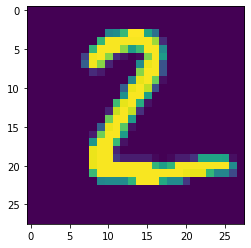

In [14]:
plt.imshow(x_test[1])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 360)               282600    
_________________________________________________________________
dropout (Dropout)            (None, 360)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               46208     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 330,098
Trainable params: 330,098
Non-trainable params: 0
__________________________________________________

### Callback

- 학습시 특정 조건이 되면 실행되는 객체
- fit() 함수의 callbacks 파라민터를 통해 학습 할 때 지정함. 

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(360, activation="relu"),
    tf.keras.layers.Dropout(0,1),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
path = "{epoch:02d}-{val_acc:.4f}.hdf5"

# val = validattion .3가지를 쓸수있음. 

checkpoint = ModelCheckpoint(filepath= path,
                            monitor = "val_acc",
                            save_vest_only =True,
                            verbose = 1)


# 콜백은 여러가지 종류가 있음. 
# 그중 checkpoint 콜백은 세이브한 것을 의미함.

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_acc", patience=3)

In [18]:
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [19]:
# fit 을 할때, chcekpint 가 호출이 됨. 

model.fit(x_train, y_train, 
          validation_split = 0.2, # call back 쓰려면 무조건 써줘야함.
                                  # 손실시킨것을 확인할 데이터. 
          batch_size = 100, epochs=5, 
          callbacks = [checkpoint], verbose =1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
47300/48000 [============================>.] - ETA: 0s - loss: 1.1914 - acc: 0.6738
Epoch 00001: saving model to 01-0.8762.hdf5
48000/48000 [==============================] - 2s 33us/sample - loss: 1.1828 - acc: 0.6762 - val_loss: 0.5448 - val_acc: 0.8762
Epoch 2/5
47900/48000 [============================>.] - ETA: 0s - loss: 0.5306 - acc: 0.8540
Epoch 00002: saving model to 02-0.9001.hdf5
48000/48000 [==============================] - 1s 31us/sample - loss: 0.5302 - acc: 0.8541 - val_loss: 0.3756 - val_acc: 0.9001
Epoch 3/5
46600/48000 [============================>.] - ETA: 0s - loss: 0.4185 - acc: 0.8819
Epoch 00003: saving model to 03-0.9082.hdf5
48000/48000 [==============================] - 1s 31us/sample - loss: 0.4188 - acc: 0.8817 - val_loss: 0.3204 - val_acc: 0.9082
Epoch 4/5
46600/48000 [============================>.] - ETA: 0s - loss: 0.3693 - acc: 0.8948
Epoch 00004: saving model to 04-0.9185.hdf5
48000/48000 [=

In [20]:
model.evaluate

<bound method Model.evaluate of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000000002DA9E848>>

## 와인데이터로 실습

In [21]:
import pandas as pd
redwine = pd.read_csv("winequality-red.csv", sep=";")

redwine_x = redwine.iloc[:, :-1]
redwine_y = redwine.iloc[:, -1]

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(redwine_y.to_numpy().reshape(-1,1))

y_onehot = enc.transform(redwine_y.to_numpy().reshape(-1,1))

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(redwine_x, y_onehot, test_size =0.3)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(360, activation="relu"),
    tf.keras.layers.Dropout(0,1),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(6, activation="softmax"))


In [24]:
from tensorflow.keras.losses import categorical_crossentropy
model.compile(loss= categorical_crossentropy,
             optimizer="nadam",metrics=["accuracy"])

In [25]:
train_y.toarray()

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]])

In [26]:
train_x.to_numpy()

array([[ 9.1 ,  0.28,  0.46, ...,  3.18,  0.6 , 10.9 ],
       [ 6.4 ,  0.42,  0.09, ...,  3.41,  0.68, 10.4 ],
       [ 9.1 ,  0.68,  0.11, ...,  3.31,  0.55,  9.5 ],
       ...,
       [ 8.8 ,  0.59,  0.18, ...,  3.14,  0.54,  9.4 ],
       [ 7.4 ,  0.36,  0.3 , ...,  3.24,  0.7 , 11.4 ],
       [ 9.  ,  0.45,  0.49, ...,  3.35,  0.57,  9.7 ]])

In [27]:
train_y.toarray()

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]])

In [28]:
history = model.fit(train_x.to_numpy(), train_y.toarray(),
                   validation_split=0.5, batch_size= 100, epochs =10000, verbose=1)

Train on 559 samples, validate on 560 samples
Epoch 1/10000
559/559 [==============================] - 0s 268us/sample - loss: 2.9936 - acc: 0.2755 - val_loss: 1.3520 - val_acc: 0.4411
Epoch 2/10000
559/559 [==============================] - 0s 23us/sample - loss: 1.2570 - acc: 0.4902 - val_loss: 1.2405 - val_acc: 0.4679
Epoch 3/10000
559/559 [==============================] - 0s 27us/sample - loss: 1.4280 - acc: 0.4240 - val_loss: 1.1716 - val_acc: 0.4982
Epoch 4/10000
559/559 [==============================] - 0s 27us/sample - loss: 1.1594 - acc: 0.4973 - val_loss: 1.1368 - val_acc: 0.4893
Epoch 5/10000
559/559 [==============================] - 0s 27us/sample - loss: 1.2435 - acc: 0.4955 - val_loss: 1.1626 - val_acc: 0.4964
Epoch 6/10000
559/559 [==============================] - 0s 29us/sample - loss: 1.2813 - acc: 0.4472 - val_loss: 1.2095 - val_acc: 0.4857
Epoch 7/10000
559/559 [==============================] - 0s 25us/sample - loss: 1.2238 - acc: 0.4866 - val_loss: 1.5984 - val

559/559 [==============================] - 0s 23us/sample - loss: 1.0381 - acc: 0.5689 - val_loss: 1.0887 - val_acc: 0.5339
Epoch 60/10000
559/559 [==============================] - 0s 23us/sample - loss: 1.1412 - acc: 0.5420 - val_loss: 1.1775 - val_acc: 0.5357
Epoch 61/10000
559/559 [==============================] - 0s 23us/sample - loss: 1.1780 - acc: 0.5045 - val_loss: 1.3009 - val_acc: 0.5464
Epoch 62/10000
559/559 [==============================] - 0s 23us/sample - loss: 1.0744 - acc: 0.5850 - val_loss: 1.2459 - val_acc: 0.5411
Epoch 63/10000
559/559 [==============================] - 0s 21us/sample - loss: 1.0362 - acc: 0.5868 - val_loss: 1.1336 - val_acc: 0.4643
Epoch 64/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.9943 - acc: 0.5850 - val_loss: 1.1467 - val_acc: 0.5375
Epoch 65/10000
559/559 [==============================] - 0s 21us/sample - loss: 1.0347 - acc: 0.5438 - val_loss: 1.0844 - val_acc: 0.5429
Epoch 66/10000
559/559 [==================

Epoch 118/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.8938 - acc: 0.6172 - val_loss: 1.2753 - val_acc: 0.5232
Epoch 119/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.8992 - acc: 0.6225 - val_loss: 1.0413 - val_acc: 0.5518
Epoch 120/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.8556 - acc: 0.6386 - val_loss: 1.1162 - val_acc: 0.5554
Epoch 121/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.9104 - acc: 0.6172 - val_loss: 1.0963 - val_acc: 0.5589
Epoch 122/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.8534 - acc: 0.6208 - val_loss: 1.0759 - val_acc: 0.5357
Epoch 123/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.8466 - acc: 0.6297 - val_loss: 1.1366 - val_acc: 0.5411
Epoch 124/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.9132 - acc: 0.6064 - val_loss: 1.0256 - val_acc: 0.5643
Epoch 125/10000
559/

559/559 [==============================] - 0s 23us/sample - loss: 0.7665 - acc: 0.6816 - val_loss: 1.0872 - val_acc: 0.5589
Epoch 177/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.7885 - acc: 0.6565 - val_loss: 1.0688 - val_acc: 0.5804
Epoch 178/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.8756 - acc: 0.6333 - val_loss: 1.1795 - val_acc: 0.5500
Epoch 179/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.8061 - acc: 0.6565 - val_loss: 1.0914 - val_acc: 0.5750
Epoch 180/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.8185 - acc: 0.6547 - val_loss: 1.2405 - val_acc: 0.5393
Epoch 181/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.7771 - acc: 0.6673 - val_loss: 1.0579 - val_acc: 0.5643
Epoch 182/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.7569 - acc: 0.6798 - val_loss: 1.1475 - val_acc: 0.5500
Epoch 183/10000
559/559 [===========

559/559 [==============================] - 0s 21us/sample - loss: 0.7561 - acc: 0.6780 - val_loss: 1.1311 - val_acc: 0.5750
Epoch 235/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.6931 - acc: 0.7066 - val_loss: 1.1786 - val_acc: 0.5571
Epoch 236/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.7001 - acc: 0.7048 - val_loss: 1.2312 - val_acc: 0.5375
Epoch 237/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.7559 - acc: 0.6637 - val_loss: 1.2757 - val_acc: 0.5411
Epoch 238/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.7457 - acc: 0.6923 - val_loss: 1.1505 - val_acc: 0.5554
Epoch 239/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.6879 - acc: 0.7138 - val_loss: 1.2537 - val_acc: 0.5357
Epoch 240/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.7296 - acc: 0.6887 - val_loss: 1.1672 - val_acc: 0.5321
Epoch 241/10000
559/559 [===========

559/559 [==============================] - 0s 21us/sample - loss: 0.6330 - acc: 0.7549 - val_loss: 1.2168 - val_acc: 0.5714
Epoch 293/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.6300 - acc: 0.7352 - val_loss: 1.3655 - val_acc: 0.5393
Epoch 294/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.6609 - acc: 0.7352 - val_loss: 1.1712 - val_acc: 0.5786
Epoch 295/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.6363 - acc: 0.7388 - val_loss: 1.2876 - val_acc: 0.5446
Epoch 296/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.6473 - acc: 0.7299 - val_loss: 1.4353 - val_acc: 0.5268
Epoch 297/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.6891 - acc: 0.7120 - val_loss: 1.2351 - val_acc: 0.5661
Epoch 298/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.6247 - acc: 0.7478 - val_loss: 1.2015 - val_acc: 0.5464
Epoch 299/10000
559/559 [===========

559/559 [==============================] - 0s 23us/sample - loss: 0.5823 - acc: 0.7567 - val_loss: 1.3035 - val_acc: 0.5679
Epoch 351/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.5869 - acc: 0.7549 - val_loss: 1.3257 - val_acc: 0.5607
Epoch 352/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.5774 - acc: 0.7674 - val_loss: 1.2572 - val_acc: 0.5393
Epoch 353/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.5822 - acc: 0.7549 - val_loss: 1.2616 - val_acc: 0.5714
Epoch 354/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.6072 - acc: 0.7424 - val_loss: 1.3382 - val_acc: 0.5446
Epoch 355/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.5892 - acc: 0.7513 - val_loss: 1.2529 - val_acc: 0.5500
Epoch 356/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.6218 - acc: 0.7317 - val_loss: 1.3538 - val_acc: 0.5500
Epoch 357/10000
559/559 [===========

559/559 [==============================] - 0s 21us/sample - loss: 0.5583 - acc: 0.7728 - val_loss: 1.4318 - val_acc: 0.5375
Epoch 409/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.5524 - acc: 0.7764 - val_loss: 1.3257 - val_acc: 0.5643
Epoch 410/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.5416 - acc: 0.7818 - val_loss: 1.3817 - val_acc: 0.5518
Epoch 411/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.5565 - acc: 0.7692 - val_loss: 1.3213 - val_acc: 0.5821
Epoch 412/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.5319 - acc: 0.7710 - val_loss: 1.3732 - val_acc: 0.5589
Epoch 413/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.5325 - acc: 0.7871 - val_loss: 1.5389 - val_acc: 0.5339
Epoch 414/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.5669 - acc: 0.7621 - val_loss: 1.4597 - val_acc: 0.5500
Epoch 415/10000
559/559 [===========

559/559 [==============================] - 0s 23us/sample - loss: 0.5090 - acc: 0.7907 - val_loss: 1.4636 - val_acc: 0.5571
Epoch 467/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.5038 - acc: 0.8014 - val_loss: 1.4338 - val_acc: 0.5607
Epoch 468/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.5015 - acc: 0.7979 - val_loss: 1.4457 - val_acc: 0.5464
Epoch 469/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.4908 - acc: 0.8014 - val_loss: 1.4311 - val_acc: 0.5446
Epoch 470/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.5027 - acc: 0.7925 - val_loss: 1.4361 - val_acc: 0.5679
Epoch 471/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.4971 - acc: 0.8086 - val_loss: 1.4805 - val_acc: 0.5661
Epoch 472/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.5184 - acc: 0.7818 - val_loss: 1.4258 - val_acc: 0.5607
Epoch 473/10000
559/559 [===========

559/559 [==============================] - 0s 23us/sample - loss: 0.4664 - acc: 0.8175 - val_loss: 1.5362 - val_acc: 0.5589
Epoch 525/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.4458 - acc: 0.8229 - val_loss: 1.6805 - val_acc: 0.5304
Epoch 526/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.4781 - acc: 0.8247 - val_loss: 1.6120 - val_acc: 0.5339
Epoch 527/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.4510 - acc: 0.8140 - val_loss: 1.5900 - val_acc: 0.5375
Epoch 528/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.4583 - acc: 0.8068 - val_loss: 1.6957 - val_acc: 0.5411
Epoch 529/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.4894 - acc: 0.7961 - val_loss: 1.5802 - val_acc: 0.5393
Epoch 530/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.4647 - acc: 0.8086 - val_loss: 1.5589 - val_acc: 0.5446
Epoch 531/10000
559/559 [===========

559/559 [==============================] - 0s 23us/sample - loss: 0.4277 - acc: 0.8301 - val_loss: 1.7589 - val_acc: 0.5268
Epoch 583/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.4307 - acc: 0.8390 - val_loss: 1.6775 - val_acc: 0.5339
Epoch 584/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.4118 - acc: 0.8390 - val_loss: 1.6943 - val_acc: 0.5446
Epoch 585/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.4704 - acc: 0.7943 - val_loss: 1.6744 - val_acc: 0.5536
Epoch 586/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.4280 - acc: 0.8229 - val_loss: 1.6963 - val_acc: 0.5518
Epoch 587/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.4322 - acc: 0.8301 - val_loss: 1.6801 - val_acc: 0.5518
Epoch 588/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.4087 - acc: 0.8462 - val_loss: 1.7171 - val_acc: 0.5446
Epoch 589/10000
559/559 [===========

559/559 [==============================] - 0s 21us/sample - loss: 0.3732 - acc: 0.8676 - val_loss: 1.8324 - val_acc: 0.5286
Epoch 641/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3859 - acc: 0.8515 - val_loss: 1.9438 - val_acc: 0.5304
Epoch 642/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.4022 - acc: 0.8318 - val_loss: 1.7676 - val_acc: 0.5357
Epoch 643/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3778 - acc: 0.8623 - val_loss: 1.7969 - val_acc: 0.5357
Epoch 644/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3759 - acc: 0.8640 - val_loss: 1.7809 - val_acc: 0.5500
Epoch 645/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3838 - acc: 0.8462 - val_loss: 1.8125 - val_acc: 0.5446
Epoch 646/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.3775 - acc: 0.8479 - val_loss: 1.8067 - val_acc: 0.5464
Epoch 647/10000
559/559 [===========

559/559 [==============================] - 0s 21us/sample - loss: 0.3514 - acc: 0.8605 - val_loss: 1.9579 - val_acc: 0.5375
Epoch 699/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3587 - acc: 0.8587 - val_loss: 1.9492 - val_acc: 0.5429
Epoch 700/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3576 - acc: 0.8587 - val_loss: 1.9664 - val_acc: 0.5429
Epoch 701/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3452 - acc: 0.8658 - val_loss: 1.8863 - val_acc: 0.5482
Epoch 702/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3488 - acc: 0.8569 - val_loss: 1.8490 - val_acc: 0.5464
Epoch 703/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3379 - acc: 0.8748 - val_loss: 1.9447 - val_acc: 0.5286
Epoch 704/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3504 - acc: 0.8676 - val_loss: 1.9517 - val_acc: 0.5304
Epoch 705/10000
559/559 [===========

559/559 [==============================] - 0s 23us/sample - loss: 0.3925 - acc: 0.8372 - val_loss: 2.0326 - val_acc: 0.5125
Epoch 757/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3619 - acc: 0.8569 - val_loss: 2.0464 - val_acc: 0.5357
Epoch 758/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3268 - acc: 0.8801 - val_loss: 2.0003 - val_acc: 0.5446
Epoch 759/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3148 - acc: 0.8855 - val_loss: 2.0657 - val_acc: 0.5196
Epoch 760/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3301 - acc: 0.8748 - val_loss: 2.0948 - val_acc: 0.5232
Epoch 761/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3343 - acc: 0.8587 - val_loss: 2.1099 - val_acc: 0.5321
Epoch 762/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3206 - acc: 0.8837 - val_loss: 1.9906 - val_acc: 0.5357
Epoch 763/10000
559/559 [===========

559/559 [==============================] - 0s 21us/sample - loss: 0.3020 - acc: 0.8873 - val_loss: 2.3015 - val_acc: 0.5143
Epoch 815/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3029 - acc: 0.8801 - val_loss: 2.1273 - val_acc: 0.5411
Epoch 816/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.2932 - acc: 0.8945 - val_loss: 2.1159 - val_acc: 0.5304
Epoch 817/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.3110 - acc: 0.8801 - val_loss: 2.1305 - val_acc: 0.5411
Epoch 818/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3008 - acc: 0.8927 - val_loss: 2.1146 - val_acc: 0.5250
Epoch 819/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.2817 - acc: 0.8909 - val_loss: 2.1989 - val_acc: 0.5232
Epoch 820/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.3150 - acc: 0.8748 - val_loss: 2.2158 - val_acc: 0.5375
Epoch 821/10000
559/559 [===========

559/559 [==============================] - 0s 21us/sample - loss: 0.2785 - acc: 0.8980 - val_loss: 2.2478 - val_acc: 0.5304
Epoch 873/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.2659 - acc: 0.8980 - val_loss: 2.2497 - val_acc: 0.5464
Epoch 874/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2727 - acc: 0.8980 - val_loss: 2.2775 - val_acc: 0.5339
Epoch 875/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.2853 - acc: 0.8855 - val_loss: 2.3399 - val_acc: 0.5196
Epoch 876/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.2999 - acc: 0.8819 - val_loss: 2.2563 - val_acc: 0.5339
Epoch 877/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2713 - acc: 0.9034 - val_loss: 2.3287 - val_acc: 0.5321
Epoch 878/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2790 - acc: 0.8784 - val_loss: 2.4307 - val_acc: 0.5268
Epoch 879/10000
559/559 [===========

559/559 [==============================] - 0s 23us/sample - loss: 0.2876 - acc: 0.8962 - val_loss: 2.3374 - val_acc: 0.5339
Epoch 931/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2503 - acc: 0.9195 - val_loss: 2.3833 - val_acc: 0.5321
Epoch 932/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2580 - acc: 0.8962 - val_loss: 2.4068 - val_acc: 0.4982
Epoch 933/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2861 - acc: 0.8945 - val_loss: 2.3669 - val_acc: 0.5339
Epoch 934/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2547 - acc: 0.9016 - val_loss: 2.3233 - val_acc: 0.5375
Epoch 935/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.2490 - acc: 0.9177 - val_loss: 2.3727 - val_acc: 0.5339
Epoch 936/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.2790 - acc: 0.8801 - val_loss: 2.3959 - val_acc: 0.5250
Epoch 937/10000
559/559 [===========

559/559 [==============================] - 0s 21us/sample - loss: 0.2347 - acc: 0.9052 - val_loss: 2.4745 - val_acc: 0.5429
Epoch 989/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.2246 - acc: 0.9088 - val_loss: 2.4622 - val_acc: 0.5321
Epoch 990/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2205 - acc: 0.9320 - val_loss: 2.5004 - val_acc: 0.5375
Epoch 991/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.2262 - acc: 0.9159 - val_loss: 2.4729 - val_acc: 0.5375
Epoch 992/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2209 - acc: 0.9284 - val_loss: 2.4625 - val_acc: 0.5304
Epoch 993/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.2358 - acc: 0.9052 - val_loss: 2.4916 - val_acc: 0.5286
Epoch 994/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.2302 - acc: 0.9123 - val_loss: 2.5410 - val_acc: 0.5214
Epoch 995/10000
559/559 [===========

559/559 [==============================] - 0s 23us/sample - loss: 0.2066 - acc: 0.9284 - val_loss: 2.6524 - val_acc: 0.5268
Epoch 1047/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2118 - acc: 0.9231 - val_loss: 2.5583 - val_acc: 0.5429
Epoch 1048/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2202 - acc: 0.9141 - val_loss: 2.6994 - val_acc: 0.5268
Epoch 1049/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.2500 - acc: 0.9034 - val_loss: 2.6197 - val_acc: 0.5286
Epoch 1050/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2112 - acc: 0.9213 - val_loss: 2.6200 - val_acc: 0.5411
Epoch 1051/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2050 - acc: 0.9213 - val_loss: 2.5950 - val_acc: 0.5304
Epoch 1052/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.2071 - acc: 0.9177 - val_loss: 2.6319 - val_acc: 0.5393
Epoch 1053/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.1920 - acc: 0.9213 - val_loss: 2.8094 - val_acc: 0.5250
Epoch 1105/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.1957 - acc: 0.9320 - val_loss: 2.7000 - val_acc: 0.5357
Epoch 1106/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.1866 - acc: 0.9302 - val_loss: 2.7190 - val_acc: 0.5464
Epoch 1107/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1854 - acc: 0.9320 - val_loss: 2.7105 - val_acc: 0.5411
Epoch 1108/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1869 - acc: 0.9267 - val_loss: 2.7412 - val_acc: 0.5250
Epoch 1109/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1908 - acc: 0.9356 - val_loss: 2.7391 - val_acc: 0.5304
Epoch 1110/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1963 - acc: 0.9267 - val_loss: 2.7527 - val_acc: 0.5339
Epoch 1111/10000
559/559 [====

559/559 [==============================] - 0s 25us/sample - loss: 0.1726 - acc: 0.9481 - val_loss: 2.8415 - val_acc: 0.5393
Epoch 1163/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1912 - acc: 0.9302 - val_loss: 2.8548 - val_acc: 0.5375
Epoch 1164/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1832 - acc: 0.9410 - val_loss: 2.8762 - val_acc: 0.5304
Epoch 1165/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1850 - acc: 0.9410 - val_loss: 2.8550 - val_acc: 0.5339
Epoch 1166/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1924 - acc: 0.9213 - val_loss: 2.9250 - val_acc: 0.5393
Epoch 1167/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1810 - acc: 0.9356 - val_loss: 2.9433 - val_acc: 0.5107
Epoch 1168/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1993 - acc: 0.9267 - val_loss: 3.0108 - val_acc: 0.5214
Epoch 1169/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.1642 - acc: 0.9428 - val_loss: 2.9809 - val_acc: 0.5321
Epoch 1221/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1684 - acc: 0.9410 - val_loss: 2.9878 - val_acc: 0.5286
Epoch 1222/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1771 - acc: 0.9267 - val_loss: 3.0237 - val_acc: 0.5357
Epoch 1223/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1862 - acc: 0.9231 - val_loss: 3.0225 - val_acc: 0.5268
Epoch 1224/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1710 - acc: 0.9338 - val_loss: 2.9575 - val_acc: 0.5393
Epoch 1225/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.1679 - acc: 0.9428 - val_loss: 3.0056 - val_acc: 0.5357
Epoch 1226/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1703 - acc: 0.9374 - val_loss: 3.0724 - val_acc: 0.5286
Epoch 1227/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.1738 - acc: 0.9284 - val_loss: 3.1485 - val_acc: 0.5500
Epoch 1279/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1694 - acc: 0.9374 - val_loss: 3.0956 - val_acc: 0.5429
Epoch 1280/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.1492 - acc: 0.9499 - val_loss: 3.1473 - val_acc: 0.5339
Epoch 1281/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.1504 - acc: 0.9481 - val_loss: 3.1201 - val_acc: 0.5304
Epoch 1282/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1588 - acc: 0.9392 - val_loss: 3.1141 - val_acc: 0.5500
Epoch 1283/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1504 - acc: 0.9517 - val_loss: 3.1057 - val_acc: 0.5393
Epoch 1284/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1633 - acc: 0.9267 - val_loss: 3.1889 - val_acc: 0.5339
Epoch 1285/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.1358 - acc: 0.9553 - val_loss: 3.2307 - val_acc: 0.5446
Epoch 1337/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1464 - acc: 0.9445 - val_loss: 3.2640 - val_acc: 0.5357
Epoch 1338/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1420 - acc: 0.9517 - val_loss: 3.3425 - val_acc: 0.5429
Epoch 1339/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1362 - acc: 0.9606 - val_loss: 3.2382 - val_acc: 0.5268
Epoch 1340/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1465 - acc: 0.9410 - val_loss: 3.2159 - val_acc: 0.5482
Epoch 1341/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1376 - acc: 0.9571 - val_loss: 3.2238 - val_acc: 0.5339
Epoch 1342/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1352 - acc: 0.9481 - val_loss: 3.2442 - val_acc: 0.5393
Epoch 1343/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.1253 - acc: 0.9535 - val_loss: 3.3578 - val_acc: 0.5321
Epoch 1395/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1201 - acc: 0.9678 - val_loss: 3.3957 - val_acc: 0.5357
Epoch 1396/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1223 - acc: 0.9696 - val_loss: 3.4436 - val_acc: 0.5250
Epoch 1397/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1242 - acc: 0.9535 - val_loss: 3.3470 - val_acc: 0.5339
Epoch 1398/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1288 - acc: 0.9517 - val_loss: 3.3832 - val_acc: 0.5375
Epoch 1399/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1267 - acc: 0.9624 - val_loss: 3.4671 - val_acc: 0.5286
Epoch 1400/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1266 - acc: 0.9535 - val_loss: 3.3955 - val_acc: 0.5464
Epoch 1401/10000
559/559 [====

Epoch 1452/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1144 - acc: 0.9642 - val_loss: 3.5229 - val_acc: 0.5446
Epoch 1453/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1216 - acc: 0.9571 - val_loss: 3.5328 - val_acc: 0.5375
Epoch 1454/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1181 - acc: 0.9606 - val_loss: 3.5484 - val_acc: 0.5393
Epoch 1455/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1244 - acc: 0.9571 - val_loss: 3.5609 - val_acc: 0.5339
Epoch 1456/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1167 - acc: 0.9624 - val_loss: 3.7970 - val_acc: 0.5161
Epoch 1457/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1605 - acc: 0.9320 - val_loss: 3.5606 - val_acc: 0.5232
Epoch 1458/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1222 - acc: 0.9571 - val_loss: 3.5386 - val_acc: 0.5339
Epoch 1459/10

559/559 [==============================] - 0s 23us/sample - loss: 0.1120 - acc: 0.9606 - val_loss: 3.7345 - val_acc: 0.5304
Epoch 1511/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1065 - acc: 0.9606 - val_loss: 3.6231 - val_acc: 0.5464
Epoch 1512/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1130 - acc: 0.9571 - val_loss: 3.6053 - val_acc: 0.5482
Epoch 1513/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1121 - acc: 0.9624 - val_loss: 3.6236 - val_acc: 0.5411
Epoch 1514/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1059 - acc: 0.9678 - val_loss: 3.6612 - val_acc: 0.5429
Epoch 1515/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1023 - acc: 0.9642 - val_loss: 3.7068 - val_acc: 0.5375
Epoch 1516/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.1065 - acc: 0.9678 - val_loss: 3.8532 - val_acc: 0.5179
Epoch 1517/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.1055 - acc: 0.9624 - val_loss: 3.7582 - val_acc: 0.5446
Epoch 1569/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0946 - acc: 0.9750 - val_loss: 3.9305 - val_acc: 0.5411
Epoch 1570/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0972 - acc: 0.9624 - val_loss: 3.7847 - val_acc: 0.5268
Epoch 1571/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0937 - acc: 0.9750 - val_loss: 3.7826 - val_acc: 0.5250
Epoch 1572/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.1064 - acc: 0.9660 - val_loss: 3.7850 - val_acc: 0.5411
Epoch 1573/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0927 - acc: 0.9750 - val_loss: 3.7811 - val_acc: 0.5411
Epoch 1574/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0960 - acc: 0.9750 - val_loss: 3.7568 - val_acc: 0.5482
Epoch 1575/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0814 - acc: 0.9785 - val_loss: 3.8881 - val_acc: 0.5482
Epoch 1627/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0863 - acc: 0.9714 - val_loss: 3.8730 - val_acc: 0.5429
Epoch 1628/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0963 - acc: 0.9624 - val_loss: 3.8996 - val_acc: 0.5446
Epoch 1629/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0889 - acc: 0.9660 - val_loss: 3.8785 - val_acc: 0.5536
Epoch 1630/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0913 - acc: 0.9803 - val_loss: 3.8768 - val_acc: 0.5482
Epoch 1631/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0897 - acc: 0.9732 - val_loss: 3.8863 - val_acc: 0.5464
Epoch 1632/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0914 - acc: 0.9642 - val_loss: 3.8838 - val_acc: 0.5464
Epoch 1633/10000
559/559 [====

559/559 [==============================] - 0s 25us/sample - loss: 0.0726 - acc: 0.9857 - val_loss: 4.0415 - val_acc: 0.5393
Epoch 1685/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0767 - acc: 0.9839 - val_loss: 4.0618 - val_acc: 0.5518
Epoch 1686/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0990 - acc: 0.9660 - val_loss: 4.0882 - val_acc: 0.5393
Epoch 1687/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0810 - acc: 0.9714 - val_loss: 4.0824 - val_acc: 0.5375
Epoch 1688/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0726 - acc: 0.9821 - val_loss: 4.0623 - val_acc: 0.5482
Epoch 1689/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0837 - acc: 0.9750 - val_loss: 4.0901 - val_acc: 0.5411
Epoch 1690/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0754 - acc: 0.9857 - val_loss: 4.0359 - val_acc: 0.5375
Epoch 1691/10000
559/559 [====

559/559 [==============================] - 0s 25us/sample - loss: 0.0777 - acc: 0.9803 - val_loss: 4.1470 - val_acc: 0.5339
Epoch 1743/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0712 - acc: 0.9839 - val_loss: 4.1352 - val_acc: 0.5375
Epoch 1744/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0716 - acc: 0.9839 - val_loss: 4.1672 - val_acc: 0.5411
Epoch 1745/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0714 - acc: 0.9839 - val_loss: 4.2556 - val_acc: 0.5464
Epoch 1746/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0825 - acc: 0.9714 - val_loss: 4.2128 - val_acc: 0.5482
Epoch 1747/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0747 - acc: 0.9839 - val_loss: 4.1735 - val_acc: 0.5518
Epoch 1748/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0754 - acc: 0.9785 - val_loss: 4.2057 - val_acc: 0.5482
Epoch 1749/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0632 - acc: 0.9785 - val_loss: 4.3117 - val_acc: 0.5375
Epoch 1801/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0654 - acc: 0.9893 - val_loss: 4.3200 - val_acc: 0.5411
Epoch 1802/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0735 - acc: 0.9803 - val_loss: 4.3025 - val_acc: 0.5571
Epoch 1803/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0657 - acc: 0.9732 - val_loss: 4.2723 - val_acc: 0.5464
Epoch 1804/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0717 - acc: 0.9803 - val_loss: 4.3211 - val_acc: 0.5429
Epoch 1805/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0627 - acc: 0.9839 - val_loss: 4.2838 - val_acc: 0.5536
Epoch 1806/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0765 - acc: 0.9678 - val_loss: 4.3534 - val_acc: 0.5304
Epoch 1807/10000
559/559 [====

559/559 [==============================] - 0s 25us/sample - loss: 0.0602 - acc: 0.9893 - val_loss: 4.2946 - val_acc: 0.5411
Epoch 1859/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0682 - acc: 0.9803 - val_loss: 4.2670 - val_acc: 0.5536
Epoch 1860/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0627 - acc: 0.9857 - val_loss: 4.2996 - val_acc: 0.5518
Epoch 1861/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0593 - acc: 0.9893 - val_loss: 4.2860 - val_acc: 0.5518
Epoch 1862/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0619 - acc: 0.9821 - val_loss: 4.2475 - val_acc: 0.5464
Epoch 1863/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0607 - acc: 0.9875 - val_loss: 4.2779 - val_acc: 0.5536
Epoch 1864/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0579 - acc: 0.9893 - val_loss: 4.2859 - val_acc: 0.5411
Epoch 1865/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0597 - acc: 0.9893 - val_loss: 4.3776 - val_acc: 0.5393
Epoch 1917/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0711 - acc: 0.9875 - val_loss: 4.3893 - val_acc: 0.5500
Epoch 1918/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0717 - acc: 0.9821 - val_loss: 4.3419 - val_acc: 0.5589
Epoch 1919/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0577 - acc: 0.9928 - val_loss: 4.3940 - val_acc: 0.5482
Epoch 1920/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0543 - acc: 0.9875 - val_loss: 4.3924 - val_acc: 0.5500
Epoch 1921/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0505 - acc: 0.9946 - val_loss: 4.3632 - val_acc: 0.5500
Epoch 1922/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0573 - acc: 0.9893 - val_loss: 4.4219 - val_acc: 0.5464
Epoch 1923/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0478 - acc: 0.9964 - val_loss: 4.4581 - val_acc: 0.5589
Epoch 1975/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0467 - acc: 0.9946 - val_loss: 4.4519 - val_acc: 0.5571
Epoch 1976/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0503 - acc: 0.9928 - val_loss: 4.5373 - val_acc: 0.5500
Epoch 1977/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0550 - acc: 0.9893 - val_loss: 4.4874 - val_acc: 0.5536
Epoch 1978/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0492 - acc: 0.9928 - val_loss: 4.4693 - val_acc: 0.5518
Epoch 1979/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0473 - acc: 0.9911 - val_loss: 4.4755 - val_acc: 0.5482
Epoch 1980/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0489 - acc: 0.9946 - val_loss: 4.4690 - val_acc: 0.5429
Epoch 1981/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0446 - acc: 0.9946 - val_loss: 4.5717 - val_acc: 0.5500
Epoch 2033/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0429 - acc: 0.9911 - val_loss: 4.5474 - val_acc: 0.5500
Epoch 2034/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0477 - acc: 0.9911 - val_loss: 4.5830 - val_acc: 0.5536
Epoch 2035/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0484 - acc: 0.9875 - val_loss: 4.5762 - val_acc: 0.5393
Epoch 2036/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0451 - acc: 0.9893 - val_loss: 4.5658 - val_acc: 0.5446
Epoch 2037/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0481 - acc: 0.9928 - val_loss: 4.5583 - val_acc: 0.5554
Epoch 2038/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0481 - acc: 0.9928 - val_loss: 4.6505 - val_acc: 0.5464
Epoch 2039/10000
559/559 [====

559/559 [==============================] - 0s 25us/sample - loss: 0.0449 - acc: 0.9946 - val_loss: 4.6484 - val_acc: 0.5429
Epoch 2091/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0410 - acc: 0.9928 - val_loss: 4.6528 - val_acc: 0.5500
Epoch 2092/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0416 - acc: 0.9911 - val_loss: 4.6883 - val_acc: 0.5357
Epoch 2093/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0447 - acc: 0.9911 - val_loss: 4.6642 - val_acc: 0.5482
Epoch 2094/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0405 - acc: 0.9928 - val_loss: 4.6905 - val_acc: 0.5393
Epoch 2095/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0439 - acc: 0.9928 - val_loss: 4.7053 - val_acc: 0.5464
Epoch 2096/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0428 - acc: 0.9911 - val_loss: 4.6802 - val_acc: 0.5518
Epoch 2097/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0603 - acc: 0.9857 - val_loss: 4.7810 - val_acc: 0.5250
Epoch 2149/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0480 - acc: 0.9839 - val_loss: 4.7324 - val_acc: 0.5518
Epoch 2150/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0374 - acc: 0.9946 - val_loss: 4.7553 - val_acc: 0.5571
Epoch 2151/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0354 - acc: 0.9928 - val_loss: 4.7567 - val_acc: 0.5411
Epoch 2152/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0363 - acc: 0.9964 - val_loss: 4.7314 - val_acc: 0.5500
Epoch 2153/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0400 - acc: 0.9928 - val_loss: 4.7222 - val_acc: 0.5393
Epoch 2154/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0363 - acc: 0.9946 - val_loss: 4.7657 - val_acc: 0.5464
Epoch 2155/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0431 - acc: 0.9911 - val_loss: 4.8842 - val_acc: 0.5375
Epoch 2207/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0358 - acc: 0.9946 - val_loss: 4.8565 - val_acc: 0.5518
Epoch 2208/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0323 - acc: 0.9946 - val_loss: 4.8904 - val_acc: 0.5411
Epoch 2209/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0342 - acc: 0.9946 - val_loss: 4.9205 - val_acc: 0.5536
Epoch 2210/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0404 - acc: 0.9911 - val_loss: 4.9365 - val_acc: 0.5500
Epoch 2211/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0395 - acc: 0.9928 - val_loss: 4.8565 - val_acc: 0.5446
Epoch 2212/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0360 - acc: 0.9928 - val_loss: 4.8300 - val_acc: 0.5446
Epoch 2213/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0319 - acc: 0.9911 - val_loss: 5.0867 - val_acc: 0.5375
Epoch 2265/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0364 - acc: 0.9893 - val_loss: 5.0458 - val_acc: 0.5357
Epoch 2266/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0339 - acc: 0.9911 - val_loss: 4.9612 - val_acc: 0.5554
Epoch 2267/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0342 - acc: 0.9946 - val_loss: 5.0858 - val_acc: 0.5339
Epoch 2268/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0348 - acc: 0.9928 - val_loss: 4.9975 - val_acc: 0.5339
Epoch 2269/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0404 - acc: 0.9911 - val_loss: 4.9702 - val_acc: 0.5500
Epoch 2270/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0375 - acc: 0.9875 - val_loss: 5.0049 - val_acc: 0.5411
Epoch 2271/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0293 - acc: 0.9928 - val_loss: 5.0643 - val_acc: 0.5375
Epoch 2323/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0299 - acc: 0.9928 - val_loss: 5.0784 - val_acc: 0.5286
Epoch 2324/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0279 - acc: 0.9964 - val_loss: 5.0690 - val_acc: 0.5446
Epoch 2325/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0280 - acc: 0.9946 - val_loss: 5.1001 - val_acc: 0.5518
Epoch 2326/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0266 - acc: 0.9964 - val_loss: 5.0607 - val_acc: 0.5482
Epoch 2327/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0277 - acc: 0.9946 - val_loss: 5.0855 - val_acc: 0.5482
Epoch 2328/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0269 - acc: 0.9928 - val_loss: 5.0720 - val_acc: 0.5411
Epoch 2329/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0287 - acc: 0.9982 - val_loss: 4.9899 - val_acc: 0.5571
Epoch 2381/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0308 - acc: 0.9964 - val_loss: 5.0110 - val_acc: 0.5464
Epoch 2382/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0285 - acc: 0.9982 - val_loss: 4.9879 - val_acc: 0.5518
Epoch 2383/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0294 - acc: 0.9964 - val_loss: 5.0296 - val_acc: 0.5554
Epoch 2384/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0329 - acc: 0.9964 - val_loss: 5.0078 - val_acc: 0.5518
Epoch 2385/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0334 - acc: 0.9928 - val_loss: 5.0330 - val_acc: 0.5536
Epoch 2386/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0300 - acc: 0.9964 - val_loss: 5.0165 - val_acc: 0.5482
Epoch 2387/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0273 - acc: 0.9964 - val_loss: 5.0832 - val_acc: 0.5518
Epoch 2439/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0292 - acc: 0.9946 - val_loss: 5.0946 - val_acc: 0.5482
Epoch 2440/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0249 - acc: 0.9964 - val_loss: 5.1229 - val_acc: 0.5446
Epoch 2441/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0323 - acc: 0.9911 - val_loss: 5.1053 - val_acc: 0.5464
Epoch 2442/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0351 - acc: 0.9928 - val_loss: 5.0671 - val_acc: 0.5536
Epoch 2443/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0283 - acc: 0.9964 - val_loss: 5.1029 - val_acc: 0.5482
Epoch 2444/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0278 - acc: 0.9928 - val_loss: 5.0933 - val_acc: 0.5446
Epoch 2445/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0247 - acc: 0.9964 - val_loss: 5.2227 - val_acc: 0.5393
Epoch 2497/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0267 - acc: 0.9964 - val_loss: 5.1414 - val_acc: 0.5554
Epoch 2498/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0235 - acc: 0.9964 - val_loss: 5.1861 - val_acc: 0.5446
Epoch 2499/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0232 - acc: 0.9964 - val_loss: 5.1417 - val_acc: 0.5571
Epoch 2500/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0231 - acc: 0.9964 - val_loss: 5.1542 - val_acc: 0.5571
Epoch 2501/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0255 - acc: 0.9946 - val_loss: 5.1484 - val_acc: 0.5500
Epoch 2502/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0288 - acc: 0.9964 - val_loss: 5.1593 - val_acc: 0.5500
Epoch 2503/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0253 - acc: 0.9964 - val_loss: 5.1986 - val_acc: 0.5464
Epoch 2555/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0238 - acc: 0.9964 - val_loss: 5.2154 - val_acc: 0.5411
Epoch 2556/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0221 - acc: 0.9964 - val_loss: 5.2080 - val_acc: 0.5518
Epoch 2557/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0265 - acc: 0.9982 - val_loss: 5.2480 - val_acc: 0.5464
Epoch 2558/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0252 - acc: 0.9928 - val_loss: 5.2029 - val_acc: 0.5518
Epoch 2559/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0234 - acc: 0.9964 - val_loss: 5.2223 - val_acc: 0.5500
Epoch 2560/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0296 - acc: 0.9928 - val_loss: 5.2496 - val_acc: 0.5411
Epoch 2561/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0220 - acc: 0.9964 - val_loss: 5.2661 - val_acc: 0.5500
Epoch 2613/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0209 - acc: 0.9964 - val_loss: 5.2772 - val_acc: 0.5500
Epoch 2614/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0210 - acc: 0.9964 - val_loss: 5.2786 - val_acc: 0.5464
Epoch 2615/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0236 - acc: 0.9964 - val_loss: 5.2874 - val_acc: 0.5393
Epoch 2616/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0205 - acc: 0.9964 - val_loss: 5.2698 - val_acc: 0.5518
Epoch 2617/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0214 - acc: 0.9946 - val_loss: 5.3016 - val_acc: 0.5411
Epoch 2618/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0265 - acc: 0.9928 - val_loss: 5.2641 - val_acc: 0.5482
Epoch 2619/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0401 - acc: 0.9875 - val_loss: 5.2991 - val_acc: 0.5411
Epoch 2671/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0241 - acc: 0.9964 - val_loss: 5.3029 - val_acc: 0.5464
Epoch 2672/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0253 - acc: 0.9964 - val_loss: 5.3481 - val_acc: 0.5482
Epoch 2673/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0247 - acc: 0.9964 - val_loss: 5.3439 - val_acc: 0.5464
Epoch 2674/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0207 - acc: 0.9964 - val_loss: 5.3279 - val_acc: 0.5411
Epoch 2675/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0212 - acc: 0.9946 - val_loss: 5.3746 - val_acc: 0.5411
Epoch 2676/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0189 - acc: 0.9982 - val_loss: 5.4112 - val_acc: 0.5464
Epoch 2677/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0179 - acc: 0.9964 - val_loss: 5.4378 - val_acc: 0.5411
Epoch 2729/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0179 - acc: 0.9982 - val_loss: 5.4758 - val_acc: 0.5536
Epoch 2730/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0233 - acc: 0.9946 - val_loss: 5.4537 - val_acc: 0.5375
Epoch 2731/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0246 - acc: 0.9946 - val_loss: 5.4285 - val_acc: 0.5429
Epoch 2732/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0176 - acc: 0.9982 - val_loss: 5.4357 - val_acc: 0.5518
Epoch 2733/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0176 - acc: 0.9982 - val_loss: 5.4445 - val_acc: 0.5357
Epoch 2734/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0211 - acc: 0.9928 - val_loss: 5.4398 - val_acc: 0.5500
Epoch 2735/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0340 - acc: 0.9911 - val_loss: 5.0538 - val_acc: 0.5679
Epoch 2787/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0291 - acc: 0.9964 - val_loss: 5.1933 - val_acc: 0.5536
Epoch 2788/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0271 - acc: 0.9964 - val_loss: 5.1884 - val_acc: 0.5589
Epoch 2789/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0228 - acc: 0.9982 - val_loss: 5.1983 - val_acc: 0.5607
Epoch 2790/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0215 - acc: 0.9982 - val_loss: 5.1967 - val_acc: 0.5571
Epoch 2791/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0211 - acc: 0.9982 - val_loss: 5.1854 - val_acc: 0.5589
Epoch 2792/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0202 - acc: 0.9964 - val_loss: 5.2258 - val_acc: 0.5536
Epoch 2793/10000
559/559 [====

559/559 [==============================] - 0s 25us/sample - loss: 0.0158 - acc: 0.9982 - val_loss: 5.3540 - val_acc: 0.5607
Epoch 2845/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0143 - acc: 1.0000 - val_loss: 5.3693 - val_acc: 0.5661
Epoch 2846/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0168 - acc: 0.9964 - val_loss: 5.3646 - val_acc: 0.5643
Epoch 2847/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0151 - acc: 0.9982 - val_loss: 5.3470 - val_acc: 0.5625
Epoch 2848/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0173 - acc: 0.9982 - val_loss: 5.3700 - val_acc: 0.5589
Epoch 2849/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 5.3797 - val_acc: 0.5589
Epoch 2850/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0139 - acc: 1.0000 - val_loss: 5.3908 - val_acc: 0.5589
Epoch 2851/10000
559/559 [====

Epoch 2902/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0135 - acc: 0.9982 - val_loss: 5.4251 - val_acc: 0.5589
Epoch 2903/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0151 - acc: 0.9982 - val_loss: 5.4230 - val_acc: 0.5643
Epoch 2904/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0142 - acc: 0.9982 - val_loss: 5.4190 - val_acc: 0.5536
Epoch 2905/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0139 - acc: 0.9982 - val_loss: 5.4188 - val_acc: 0.5554
Epoch 2906/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 5.4401 - val_acc: 0.5571
Epoch 2907/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0148 - acc: 0.9964 - val_loss: 5.4800 - val_acc: 0.5589
Epoch 2908/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0182 - acc: 0.9964 - val_loss: 5.4272 - val_acc: 0.5554
Epoch 2909/10

559/559 [==============================] - 0s 21us/sample - loss: 0.0134 - acc: 0.9982 - val_loss: 5.4827 - val_acc: 0.5589
Epoch 2961/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0130 - acc: 0.9982 - val_loss: 5.4682 - val_acc: 0.5589
Epoch 2962/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0118 - acc: 1.0000 - val_loss: 5.4882 - val_acc: 0.5643
Epoch 2963/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0127 - acc: 0.9982 - val_loss: 5.4752 - val_acc: 0.5571
Epoch 2964/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0132 - acc: 0.9982 - val_loss: 5.4713 - val_acc: 0.5589
Epoch 2965/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0113 - acc: 1.0000 - val_loss: 5.5077 - val_acc: 0.5625
Epoch 2966/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0131 - acc: 1.0000 - val_loss: 5.4663 - val_acc: 0.5500
Epoch 2967/10000
559/559 [====

559/559 [==============================] - 0s 25us/sample - loss: 0.0134 - acc: 0.9982 - val_loss: 5.5654 - val_acc: 0.5571
Epoch 3019/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0113 - acc: 1.0000 - val_loss: 5.5945 - val_acc: 0.5625
Epoch 3020/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0126 - acc: 0.9982 - val_loss: 5.5595 - val_acc: 0.5554
Epoch 3021/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0136 - acc: 0.9982 - val_loss: 5.5597 - val_acc: 0.5500
Epoch 3022/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0147 - acc: 0.9964 - val_loss: 5.6186 - val_acc: 0.5536
Epoch 3023/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0155 - acc: 0.9982 - val_loss: 5.5630 - val_acc: 0.5589
Epoch 3024/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0123 - acc: 0.9982 - val_loss: 5.5630 - val_acc: 0.5607
Epoch 3025/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0099 - acc: 1.0000 - val_loss: 5.6445 - val_acc: 0.5500
Epoch 3077/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0115 - acc: 1.0000 - val_loss: 5.6417 - val_acc: 0.5589
Epoch 3078/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0110 - acc: 0.9982 - val_loss: 5.6202 - val_acc: 0.5589
Epoch 3079/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0121 - acc: 1.0000 - val_loss: 5.6259 - val_acc: 0.5482
Epoch 3080/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0152 - acc: 0.9982 - val_loss: 5.6020 - val_acc: 0.5571
Epoch 3081/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0120 - acc: 0.9982 - val_loss: 5.6310 - val_acc: 0.5589
Epoch 3082/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0115 - acc: 1.0000 - val_loss: 5.6086 - val_acc: 0.5571
Epoch 3083/10000
559/559 [====

559/559 [==============================] - 0s 25us/sample - loss: 0.0132 - acc: 0.9982 - val_loss: 5.7405 - val_acc: 0.5429
Epoch 3135/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0132 - acc: 0.9982 - val_loss: 5.7157 - val_acc: 0.5643
Epoch 3136/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0125 - acc: 0.9982 - val_loss: 5.7578 - val_acc: 0.5625
Epoch 3137/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0164 - acc: 0.9964 - val_loss: 5.7179 - val_acc: 0.5464
Epoch 3138/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0129 - acc: 0.9982 - val_loss: 5.7055 - val_acc: 0.5571
Epoch 3139/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0106 - acc: 1.0000 - val_loss: 5.7349 - val_acc: 0.5607
Epoch 3140/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0100 - acc: 1.0000 - val_loss: 5.7296 - val_acc: 0.5625
Epoch 3141/10000
559/559 [====

559/559 [==============================] - 0s 25us/sample - loss: 0.0128 - acc: 0.9982 - val_loss: 5.8273 - val_acc: 0.5429
Epoch 3193/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0413 - acc: 0.9893 - val_loss: 5.6287 - val_acc: 0.5643
Epoch 3194/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0146 - acc: 1.0000 - val_loss: 5.7263 - val_acc: 0.5482
Epoch 3195/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0110 - acc: 0.9982 - val_loss: 5.7097 - val_acc: 0.5554
Epoch 3196/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0106 - acc: 1.0000 - val_loss: 5.7839 - val_acc: 0.5464
Epoch 3197/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0093 - acc: 1.0000 - val_loss: 5.7389 - val_acc: 0.5589
Epoch 3198/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0098 - acc: 1.0000 - val_loss: 5.7167 - val_acc: 0.5554
Epoch 3199/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0110 - acc: 0.9982 - val_loss: 5.8312 - val_acc: 0.5500
Epoch 3251/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0130 - acc: 0.9946 - val_loss: 6.0041 - val_acc: 0.5393
Epoch 3252/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0170 - acc: 0.9964 - val_loss: 5.7902 - val_acc: 0.5536
Epoch 3253/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0126 - acc: 1.0000 - val_loss: 5.9053 - val_acc: 0.5464
Epoch 3254/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0099 - acc: 1.0000 - val_loss: 6.0029 - val_acc: 0.5446
Epoch 3255/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0101 - acc: 1.0000 - val_loss: 5.8650 - val_acc: 0.5500
Epoch 3256/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0090 - acc: 1.0000 - val_loss: 5.8726 - val_acc: 0.5500
Epoch 3257/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 5.9464 - val_acc: 0.5625
Epoch 3309/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0070 - acc: 1.0000 - val_loss: 5.9397 - val_acc: 0.5643
Epoch 3310/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 5.9692 - val_acc: 0.5625
Epoch 3311/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 5.9938 - val_acc: 0.5554
Epoch 3312/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 5.9745 - val_acc: 0.5482
Epoch 3313/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0076 - acc: 1.0000 - val_loss: 6.0055 - val_acc: 0.5554
Epoch 3314/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0103 - acc: 0.9982 - val_loss: 5.9548 - val_acc: 0.5554
Epoch 3315/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 0.0089 - acc: 1.0000 - val_loss: 5.6128 - val_acc: 0.5518
Epoch 3367/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0098 - acc: 0.9982 - val_loss: 5.6121 - val_acc: 0.5518
Epoch 3368/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0098 - acc: 0.9982 - val_loss: 5.6127 - val_acc: 0.5518
Epoch 3369/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 5.6137 - val_acc: 0.5518
Epoch 3370/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0090 - acc: 1.0000 - val_loss: 5.6318 - val_acc: 0.5500
Epoch 3371/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0084 - acc: 1.0000 - val_loss: 5.6341 - val_acc: 0.5518
Epoch 3372/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0086 - acc: 1.0000 - val_loss: 5.6332 - val_acc: 0.5500
Epoch 3373/10000
559/559 [========

559/559 [==============================] - 0s 20us/sample - loss: 0.0085 - acc: 1.0000 - val_loss: 5.6882 - val_acc: 0.5536
Epoch 3425/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0089 - acc: 0.9982 - val_loss: 5.6861 - val_acc: 0.5536
Epoch 3426/10000
559/559 [==============================] - 0s 14us/sample - loss: 0.0075 - acc: 1.0000 - val_loss: 5.7091 - val_acc: 0.5518
Epoch 3427/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 5.6918 - val_acc: 0.5482
Epoch 3428/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0080 - acc: 1.0000 - val_loss: 5.6947 - val_acc: 0.5536
Epoch 3429/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 5.6913 - val_acc: 0.5500
Epoch 3430/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 5.7088 - val_acc: 0.5536
Epoch 3431/10000
559/559 [======

559/559 [==============================] - 0s 29us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 5.7415 - val_acc: 0.5554
Epoch 3483/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 5.7419 - val_acc: 0.5571
Epoch 3484/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0071 - acc: 1.0000 - val_loss: 5.7476 - val_acc: 0.5589
Epoch 3485/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0071 - acc: 1.0000 - val_loss: 5.7540 - val_acc: 0.5571
Epoch 3486/10000
559/559 [==============================] - 0s 16us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 5.7827 - val_acc: 0.5571
Epoch 3487/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0076 - acc: 1.0000 - val_loss: 5.7453 - val_acc: 0.5589
Epoch 3488/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0071 - acc: 1.0000 - val_loss: 5.7506 - val_acc: 0.5589
Epoch 3489/10000
559/559 [======

559/559 [==============================] - 0s 21us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 5.8040 - val_acc: 0.5571
Epoch 3541/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 5.7978 - val_acc: 0.5571
Epoch 3542/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 5.8182 - val_acc: 0.5571
Epoch 3543/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 5.8020 - val_acc: 0.5607
Epoch 3544/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0079 - acc: 1.0000 - val_loss: 5.7949 - val_acc: 0.5589
Epoch 3545/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0071 - acc: 1.0000 - val_loss: 5.7932 - val_acc: 0.5536
Epoch 3546/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 5.7903 - val_acc: 0.5571
Epoch 3547/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 0.0096 - acc: 0.9964 - val_loss: 5.8705 - val_acc: 0.5536
Epoch 3599/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0061 - acc: 1.0000 - val_loss: 5.8657 - val_acc: 0.5536
Epoch 3600/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0071 - acc: 0.9982 - val_loss: 5.8716 - val_acc: 0.5643
Epoch 3601/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 5.8645 - val_acc: 0.5554
Epoch 3602/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0061 - acc: 1.0000 - val_loss: 5.8712 - val_acc: 0.5625
Epoch 3603/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 5.8615 - val_acc: 0.5607
Epoch 3604/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 5.8591 - val_acc: 0.5607
Epoch 3605/10000
559/559 [========

559/559 [==============================] - 0s 28us/sample - loss: 0.0093 - acc: 1.0000 - val_loss: 5.9359 - val_acc: 0.5661
Epoch 3657/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0114 - acc: 0.9964 - val_loss: 5.9303 - val_acc: 0.5536
Epoch 3658/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0214 - acc: 0.9928 - val_loss: 5.9211 - val_acc: 0.5571
Epoch 3659/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0233 - acc: 0.9911 - val_loss: 5.9550 - val_acc: 0.5536
Epoch 3660/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0107 - acc: 0.9982 - val_loss: 5.8770 - val_acc: 0.5518
Epoch 3661/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0178 - acc: 0.9946 - val_loss: 5.8184 - val_acc: 0.5661
Epoch 3662/10000
559/559 [==============================] - 0s 7us/sample - loss: 0.0185 - acc: 0.9964 - val_loss: 5.8810 - val_acc: 0.5607
Epoch 3663/10000
559/559 [=======

559/559 [==============================] - 0s 28us/sample - loss: 0.0047 - acc: 1.0000 - val_loss: 6.0848 - val_acc: 0.5500
Epoch 3715/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0059 - acc: 1.0000 - val_loss: 6.0717 - val_acc: 0.5571
Epoch 3716/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0055 - acc: 1.0000 - val_loss: 6.0484 - val_acc: 0.5482
Epoch 3717/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0053 - acc: 1.0000 - val_loss: 6.1190 - val_acc: 0.5536
Epoch 3718/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 6.0584 - val_acc: 0.5446
Epoch 3719/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 6.0889 - val_acc: 0.5589
Epoch 3720/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 6.0749 - val_acc: 0.5446
Epoch 3721/10000
559/559 [========

559/559 [==============================] - 0s 20us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 6.0751 - val_acc: 0.5536
Epoch 3773/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0045 - acc: 1.0000 - val_loss: 6.1037 - val_acc: 0.5500
Epoch 3774/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0043 - acc: 1.0000 - val_loss: 6.1015 - val_acc: 0.5500
Epoch 3775/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0043 - acc: 1.0000 - val_loss: 6.0988 - val_acc: 0.5518
Epoch 3776/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0044 - acc: 1.0000 - val_loss: 6.1183 - val_acc: 0.5482
Epoch 3777/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 6.1234 - val_acc: 0.5554
Epoch 3778/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0075 - acc: 0.9982 - val_loss: 6.1493 - val_acc: 0.5554
Epoch 3779/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 6.1573 - val_acc: 0.5446
Epoch 3831/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0046 - acc: 1.0000 - val_loss: 6.1430 - val_acc: 0.5464
Epoch 3832/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0039 - acc: 1.0000 - val_loss: 6.1400 - val_acc: 0.5554
Epoch 3833/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0041 - acc: 1.0000 - val_loss: 6.1511 - val_acc: 0.5518
Epoch 3834/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0042 - acc: 1.0000 - val_loss: 6.1540 - val_acc: 0.5536
Epoch 3835/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0039 - acc: 1.0000 - val_loss: 6.1602 - val_acc: 0.5464
Epoch 3836/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 6.1742 - val_acc: 0.5482
Epoch 3837/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 6.2215 - val_acc: 0.5536
Epoch 3889/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0053 - acc: 1.0000 - val_loss: 6.2290 - val_acc: 0.5482
Epoch 3890/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 6.2233 - val_acc: 0.5518
Epoch 3891/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0044 - acc: 1.0000 - val_loss: 6.2139 - val_acc: 0.5482
Epoch 3892/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0045 - acc: 1.0000 - val_loss: 6.2240 - val_acc: 0.5518
Epoch 3893/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 6.2227 - val_acc: 0.5500
Epoch 3894/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0043 - acc: 1.0000 - val_loss: 6.2318 - val_acc: 0.5464
Epoch 3895/10000
559/559 [====

559/559 [==============================] - 0s 0s/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 6.2256 - val_acc: 0.5500
Epoch 3947/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0053 - acc: 1.0000 - val_loss: 6.2169 - val_acc: 0.5518
Epoch 3948/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 6.2247 - val_acc: 0.5464
Epoch 3949/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 6.2335 - val_acc: 0.5482
Epoch 3950/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0050 - acc: 1.0000 - val_loss: 6.2401 - val_acc: 0.5482
Epoch 3951/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0051 - acc: 1.0000 - val_loss: 6.2365 - val_acc: 0.5482
Epoch 3952/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0055 - acc: 1.0000 - val_loss: 6.2419 - val_acc: 0.5482
Epoch 3953/10000
559/559 [========

559/559 [==============================] - 0s 20us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 6.2739 - val_acc: 0.5554
Epoch 4005/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0041 - acc: 1.0000 - val_loss: 6.2808 - val_acc: 0.5500
Epoch 4006/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 6.2945 - val_acc: 0.5482
Epoch 4007/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 6.2941 - val_acc: 0.5518
Epoch 4008/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0041 - acc: 1.0000 - val_loss: 6.2874 - val_acc: 0.5536
Epoch 4009/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0041 - acc: 1.0000 - val_loss: 6.2888 - val_acc: 0.5536
Epoch 4010/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0039 - acc: 1.0000 - val_loss: 6.2963 - val_acc: 0.5536
Epoch 4011/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 6.3331 - val_acc: 0.5518
Epoch 4063/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 6.3262 - val_acc: 0.5500
Epoch 4064/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0039 - acc: 1.0000 - val_loss: 6.3429 - val_acc: 0.5518
Epoch 4065/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 6.3256 - val_acc: 0.5518
Epoch 4066/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 6.3297 - val_acc: 0.5464
Epoch 4067/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 6.3282 - val_acc: 0.5482
Epoch 4068/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 6.3210 - val_acc: 0.5518
Epoch 4069/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 0.0034 - acc: 1.0000 - val_loss: 6.3723 - val_acc: 0.5518
Epoch 4121/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 6.3444 - val_acc: 0.5571
Epoch 4122/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 6.3615 - val_acc: 0.5536
Epoch 4123/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 6.3733 - val_acc: 0.5518
Epoch 4124/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 6.3874 - val_acc: 0.5500
Epoch 4125/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 6.3795 - val_acc: 0.5500
Epoch 4126/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 6.3598 - val_acc: 0.5571
Epoch 4127/10000
559/559 [======

559/559 [==============================] - 0s 21us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.3920 - val_acc: 0.5518
Epoch 4179/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.4172 - val_acc: 0.5500
Epoch 4180/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 6.3993 - val_acc: 0.5518
Epoch 4181/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 6.4059 - val_acc: 0.5500
Epoch 4182/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.4025 - val_acc: 0.5500
Epoch 4183/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.4023 - val_acc: 0.5464
Epoch 4184/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.4118 - val_acc: 0.5536
Epoch 4185/10000
559/559 [====

559/559 [==============================] - 0s 20us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 6.4511 - val_acc: 0.5411
Epoch 4237/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0056 - acc: 0.9982 - val_loss: 6.4405 - val_acc: 0.5446
Epoch 4238/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0073 - acc: 0.9982 - val_loss: 6.4804 - val_acc: 0.5482
Epoch 4239/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.4324 - val_acc: 0.5482
Epoch 4240/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0034 - acc: 1.0000 - val_loss: 6.4516 - val_acc: 0.5464
Epoch 4241/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 6.4560 - val_acc: 0.5464
Epoch 4242/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.4530 - val_acc: 0.5518
Epoch 4243/10000
559/559 [====

559/559 [==============================] - 0s 0s/sample - loss: 0.0650 - acc: 0.9750 - val_loss: 6.1110 - val_acc: 0.5589
Epoch 4295/10000
559/559 [==============================] - 0s 42us/sample - loss: 0.0467 - acc: 0.9875 - val_loss: 5.9066 - val_acc: 0.5464
Epoch 4296/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0490 - acc: 0.9893 - val_loss: 5.9105 - val_acc: 0.5536
Epoch 4297/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0329 - acc: 0.9911 - val_loss: 5.9557 - val_acc: 0.5554
Epoch 4298/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0164 - acc: 0.9982 - val_loss: 5.9597 - val_acc: 0.5554
Epoch 4299/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0229 - acc: 0.9928 - val_loss: 5.9711 - val_acc: 0.5607
Epoch 4300/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0122 - acc: 0.9982 - val_loss: 5.9885 - val_acc: 0.5714
Epoch 4301/10000
559/559 [======

559/559 [==============================] - 0s 21us/sample - loss: 0.0041 - acc: 1.0000 - val_loss: 6.1643 - val_acc: 0.5625
Epoch 4353/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0042 - acc: 1.0000 - val_loss: 6.1723 - val_acc: 0.5625
Epoch 4354/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 6.1744 - val_acc: 0.5607
Epoch 4355/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0041 - acc: 1.0000 - val_loss: 6.1777 - val_acc: 0.5643
Epoch 4356/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0042 - acc: 1.0000 - val_loss: 6.1783 - val_acc: 0.5643
Epoch 4357/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 6.1811 - val_acc: 0.5554
Epoch 4358/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0042 - acc: 1.0000 - val_loss: 6.1815 - val_acc: 0.5571
Epoch 4359/10000
559/559 [====

559/559 [==============================] - 0s 0s/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 6.2392 - val_acc: 0.5607
Epoch 4411/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 6.2414 - val_acc: 0.5625
Epoch 4412/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 6.2402 - val_acc: 0.5679
Epoch 4413/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 6.2421 - val_acc: 0.5625
Epoch 4414/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 6.2531 - val_acc: 0.5607
Epoch 4415/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 6.2436 - val_acc: 0.5607
Epoch 4416/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 6.2459 - val_acc: 0.5625
Epoch 4417/10000
559/559 [==========

559/559 [==============================] - 0s 23us/sample - loss: 0.0034 - acc: 1.0000 - val_loss: 6.3005 - val_acc: 0.5643
Epoch 4469/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 6.3088 - val_acc: 0.5643
Epoch 4470/10000
559/559 [==============================] - 0s 43us/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 6.3126 - val_acc: 0.5643
Epoch 4471/10000
559/559 [==============================] - 0s 30us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 6.3068 - val_acc: 0.5643
Epoch 4472/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 6.3074 - val_acc: 0.5625
Epoch 4473/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 6.3144 - val_acc: 0.5625
Epoch 4474/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 6.3168 - val_acc: 0.5643
Epoch 4475/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 6.3881 - val_acc: 0.5643
Epoch 4527/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 6.3759 - val_acc: 0.5643
Epoch 4528/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 6.3929 - val_acc: 0.5607
Epoch 4529/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 6.3794 - val_acc: 0.5607
Epoch 4530/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.3947 - val_acc: 0.5607
Epoch 4531/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 6.3761 - val_acc: 0.5607
Epoch 4532/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 6.3716 - val_acc: 0.5607
Epoch 4533/10000
559/559 [========

559/559 [==============================] - 0s 0s/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 6.4225 - val_acc: 0.5607
Epoch 4585/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 6.4164 - val_acc: 0.5589
Epoch 4586/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 6.3995 - val_acc: 0.5643
Epoch 4587/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 6.4069 - val_acc: 0.5607
Epoch 4588/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 6.4151 - val_acc: 0.5625
Epoch 4589/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.4336 - val_acc: 0.5589
Epoch 4590/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.4079 - val_acc: 0.5625
Epoch 4591/10000
559/559 [======

559/559 [==============================] - 0s 0s/sample - loss: 0.0034 - acc: 1.0000 - val_loss: 6.4959 - val_acc: 0.5536
Epoch 4643/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0044 - acc: 1.0000 - val_loss: 6.4958 - val_acc: 0.5643
Epoch 4644/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0048 - acc: 1.0000 - val_loss: 6.5012 - val_acc: 0.5536
Epoch 4645/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0205 - acc: 0.9911 - val_loss: 6.4641 - val_acc: 0.5536
Epoch 4646/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0100 - acc: 0.9964 - val_loss: 6.4762 - val_acc: 0.5607
Epoch 4647/10000
559/559 [==============================] - 0s 30us/sample - loss: 0.0115 - acc: 0.9982 - val_loss: 6.8517 - val_acc: 0.5607
Epoch 4648/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0403 - acc: 0.9893 - val_loss: 6.7692 - val_acc: 0.5536
Epoch 4649/10000
559/559 [========

559/559 [==============================] - 0s 28us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 6.3444 - val_acc: 0.5625
Epoch 4701/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 6.3519 - val_acc: 0.5625
Epoch 4702/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 6.3468 - val_acc: 0.5607
Epoch 4703/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 6.3490 - val_acc: 0.5625
Epoch 4704/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 6.3506 - val_acc: 0.5625
Epoch 4705/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 6.3491 - val_acc: 0.5625
Epoch 4706/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 6.3523 - val_acc: 0.5625
Epoch 4707/10000
559/559 [======

559/559 [==============================] - 0s 20us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.4243 - val_acc: 0.5607
Epoch 4759/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.4162 - val_acc: 0.5589
Epoch 4760/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.4175 - val_acc: 0.5571
Epoch 4761/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.4280 - val_acc: 0.5607
Epoch 4762/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 6.4309 - val_acc: 0.5607
Epoch 4763/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.4314 - val_acc: 0.5589
Epoch 4764/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 6.4291 - val_acc: 0.5589
Epoch 4765/10000
559/559 [====

559/559 [==============================] - 0s 20us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 6.4807 - val_acc: 0.5571
Epoch 4817/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.4903 - val_acc: 0.5554
Epoch 4818/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 6.5042 - val_acc: 0.5589
Epoch 4819/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 6.5048 - val_acc: 0.5554
Epoch 4820/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 6.4924 - val_acc: 0.5571
Epoch 4821/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 6.5018 - val_acc: 0.5554
Epoch 4822/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 6.5027 - val_acc: 0.5554
Epoch 4823/10000
559/559 [====

559/559 [==============================] - 0s 20us/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 6.5508 - val_acc: 0.5554
Epoch 4875/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 6.5551 - val_acc: 0.5554
Epoch 4876/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 6.5500 - val_acc: 0.5571
Epoch 4877/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 6.5434 - val_acc: 0.5536
Epoch 4878/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 6.5511 - val_acc: 0.5554
Epoch 4879/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.5517 - val_acc: 0.5536
Epoch 4880/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.5461 - val_acc: 0.5536
Epoch 4881/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.5974 - val_acc: 0.5554
Epoch 4933/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.6015 - val_acc: 0.5554
Epoch 4934/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.6165 - val_acc: 0.5571
Epoch 4935/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.6102 - val_acc: 0.5554
Epoch 4936/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.6054 - val_acc: 0.5554
Epoch 4937/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.6141 - val_acc: 0.5554
Epoch 4938/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 6.6282 - val_acc: 0.5607
Epoch 4939/10000
559/559 [====

559/559 [==============================] - 0s 0s/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.6854 - val_acc: 0.5625
Epoch 4991/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.6593 - val_acc: 0.5554
Epoch 4992/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.6673 - val_acc: 0.5625
Epoch 4993/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.6737 - val_acc: 0.5571
Epoch 4994/10000
559/559 [==============================] - 0s 30us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.6870 - val_acc: 0.5607
Epoch 4995/10000
559/559 [==============================] - 0s 13us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.6729 - val_acc: 0.5589
Epoch 4996/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.6884 - val_acc: 0.5625
Epoch 4997/10000
559/559 [======

559/559 [==============================] - 0s 21us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 6.5923 - val_acc: 0.5500
Epoch 5049/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 6.5970 - val_acc: 0.5500
Epoch 5050/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0039 - acc: 1.0000 - val_loss: 6.6002 - val_acc: 0.5518
Epoch 5051/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0034 - acc: 1.0000 - val_loss: 6.5939 - val_acc: 0.5518
Epoch 5052/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 6.5963 - val_acc: 0.5518
Epoch 5053/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0034 - acc: 1.0000 - val_loss: 6.6080 - val_acc: 0.5518
Epoch 5054/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 6.6064 - val_acc: 0.5518
Epoch 5055/10000
559/559 [====

559/559 [==============================] - 0s 20us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 6.7055 - val_acc: 0.5500
Epoch 5107/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 6.7064 - val_acc: 0.5554
Epoch 5108/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 6.6981 - val_acc: 0.5554
Epoch 5109/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 6.6957 - val_acc: 0.5518
Epoch 5110/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 6.7094 - val_acc: 0.5518
Epoch 5111/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 6.7064 - val_acc: 0.5571
Epoch 5112/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 6.6963 - val_acc: 0.5482
Epoch 5113/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.7496 - val_acc: 0.5554
Epoch 5165/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.7456 - val_acc: 0.5571
Epoch 5166/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.7424 - val_acc: 0.5536
Epoch 5167/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.7475 - val_acc: 0.5571
Epoch 5168/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.7466 - val_acc: 0.5554
Epoch 5169/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.7504 - val_acc: 0.5518
Epoch 5170/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.7516 - val_acc: 0.5571
Epoch 5171/10000
559/559 [======

559/559 [==============================] - 0s 25us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.7880 - val_acc: 0.5554
Epoch 5223/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.7851 - val_acc: 0.5571
Epoch 5224/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.7844 - val_acc: 0.5571
Epoch 5225/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.7831 - val_acc: 0.5571
Epoch 5226/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.7952 - val_acc: 0.5571
Epoch 5227/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.7928 - val_acc: 0.5571
Epoch 5228/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.7904 - val_acc: 0.5536
Epoch 5229/10000
559/559 [====

559/559 [==============================] - 0s 20us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.8264 - val_acc: 0.5589
Epoch 5281/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.8272 - val_acc: 0.5571
Epoch 5282/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.8291 - val_acc: 0.5554
Epoch 5283/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.8273 - val_acc: 0.5571
Epoch 5284/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.8341 - val_acc: 0.5607
Epoch 5285/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.8363 - val_acc: 0.5571
Epoch 5286/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.8303 - val_acc: 0.5571
Epoch 5287/10000
559/559 [====

559/559 [==============================] - 0s 20us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.8776 - val_acc: 0.5607
Epoch 5339/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8711 - val_acc: 0.5607
Epoch 5340/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.8735 - val_acc: 0.5607
Epoch 5341/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.8765 - val_acc: 0.5589
Epoch 5342/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.8764 - val_acc: 0.5607
Epoch 5343/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.8821 - val_acc: 0.5607
Epoch 5344/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.8855 - val_acc: 0.5607
Epoch 5345/10000
559/559 [====

559/559 [==============================] - 0s 20us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.9253 - val_acc: 0.5607
Epoch 5397/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.9150 - val_acc: 0.5607
Epoch 5398/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.9240 - val_acc: 0.5571
Epoch 5399/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9289 - val_acc: 0.5589
Epoch 5400/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9307 - val_acc: 0.5571
Epoch 5401/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9199 - val_acc: 0.5625
Epoch 5402/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.9264 - val_acc: 0.5607
Epoch 5403/10000
559/559 [====

559/559 [==============================] - 0s 23us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.9632 - val_acc: 0.5607
Epoch 5455/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 6.9634 - val_acc: 0.5571
Epoch 5456/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 6.9629 - val_acc: 0.5589
Epoch 5457/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9536 - val_acc: 0.5571
Epoch 5458/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.9445 - val_acc: 0.5625
Epoch 5459/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.9610 - val_acc: 0.5571
Epoch 5460/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 6.9598 - val_acc: 0.5625
Epoch 5461/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.6815 - val_acc: 0.5536
Epoch 5513/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.6812 - val_acc: 0.5536
Epoch 5514/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.6765 - val_acc: 0.5536
Epoch 5515/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.6813 - val_acc: 0.5554
Epoch 5516/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 6.6887 - val_acc: 0.5536
Epoch 5517/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.6890 - val_acc: 0.5589
Epoch 5518/10000
559/559 [==============================] - 0s 29us/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 6.6876 - val_acc: 0.5554
Epoch 5519/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.7366 - val_acc: 0.5554
Epoch 5571/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.7392 - val_acc: 0.5589
Epoch 5572/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 6.7390 - val_acc: 0.5607
Epoch 5573/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.7415 - val_acc: 0.5554
Epoch 5574/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.7407 - val_acc: 0.5554
Epoch 5575/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.7378 - val_acc: 0.5536
Epoch 5576/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 6.7417 - val_acc: 0.5554
Epoch 5577/10000
559/559 [======

559/559 [==============================] - 0s 25us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.7841 - val_acc: 0.5554
Epoch 5629/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.7803 - val_acc: 0.5571
Epoch 5630/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.7710 - val_acc: 0.5536
Epoch 5631/10000
559/559 [==============================] - 0s 38us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.7750 - val_acc: 0.5571
Epoch 5632/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.7744 - val_acc: 0.5571
Epoch 5633/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.7723 - val_acc: 0.5518
Epoch 5634/10000
559/559 [==============================] - 0s 34us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 6.7795 - val_acc: 0.5518
Epoch 5635/10000
559/559 [====

559/559 [==============================] - 0s 27us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.7950 - val_acc: 0.5571
Epoch 5687/10000
559/559 [==============================] - 0s 29us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8024 - val_acc: 0.5554
Epoch 5688/10000
559/559 [==============================] - 0s 34us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8072 - val_acc: 0.5571
Epoch 5689/10000
559/559 [==============================] - 0s 30us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8022 - val_acc: 0.5589
Epoch 5690/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8014 - val_acc: 0.5589
Epoch 5691/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8005 - val_acc: 0.5607
Epoch 5692/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8026 - val_acc: 0.5589
Epoch 5693/10000
559/559 [====

559/559 [==============================] - 0s 0s/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.8455 - val_acc: 0.5536
Epoch 5745/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8350 - val_acc: 0.5500
Epoch 5746/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.8476 - val_acc: 0.5536
Epoch 5747/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8459 - val_acc: 0.5518
Epoch 5748/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.8498 - val_acc: 0.5518
Epoch 5749/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.8543 - val_acc: 0.5536
Epoch 5750/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.8474 - val_acc: 0.5518
Epoch 5751/10000
559/559 [==========

559/559 [==============================] - 0s 20us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 6.8919 - val_acc: 0.5536
Epoch 5803/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 6.8902 - val_acc: 0.5518
Epoch 5804/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 6.8902 - val_acc: 0.5554
Epoch 5805/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.8991 - val_acc: 0.5518
Epoch 5806/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 6.9036 - val_acc: 0.5500
Epoch 5807/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.8974 - val_acc: 0.5554
Epoch 5808/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 6.8982 - val_acc: 0.5518
Epoch 5809/10000
559/559 [====

559/559 [==============================] - 0s 20us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 6.9377 - val_acc: 0.5500
Epoch 5861/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 6.9391 - val_acc: 0.5554
Epoch 5862/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 6.9370 - val_acc: 0.5518
Epoch 5863/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 6.9427 - val_acc: 0.5500
Epoch 5864/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 6.9561 - val_acc: 0.5589
Epoch 5865/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.9473 - val_acc: 0.5554
Epoch 5866/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 6.9484 - val_acc: 0.5500
Epoch 5867/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 6.9788 - val_acc: 0.5536
Epoch 5919/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 6.9800 - val_acc: 0.5536
Epoch 5920/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 6.9895 - val_acc: 0.5536
Epoch 5921/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 6.9738 - val_acc: 0.5518
Epoch 5922/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 6.9810 - val_acc: 0.5554
Epoch 5923/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 6.9769 - val_acc: 0.5500
Epoch 5924/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 6.9783 - val_acc: 0.5518
Epoch 5925/10000
559/559 [====

559/559 [==============================] - 0s 29us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 6.8267 - val_acc: 0.5607
Epoch 5977/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 6.8297 - val_acc: 0.5625
Epoch 5978/10000
559/559 [==============================] - 0s 27us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 6.8320 - val_acc: 0.5625
Epoch 5979/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 6.8267 - val_acc: 0.5607
Epoch 5980/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 6.8283 - val_acc: 0.5661
Epoch 5981/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 6.8380 - val_acc: 0.5625
Epoch 5982/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 6.8390 - val_acc: 0.5625
Epoch 5983/10000
559/559 [====

559/559 [==============================] - 0s 21us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.9124 - val_acc: 0.5696
Epoch 6035/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.9114 - val_acc: 0.5714
Epoch 6036/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.9093 - val_acc: 0.5679
Epoch 6037/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.9112 - val_acc: 0.5714
Epoch 6038/10000
559/559 [==============================] - 0s 5us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.9135 - val_acc: 0.5696
Epoch 6039/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 6.9194 - val_acc: 0.5714
Epoch 6040/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 6.9221 - val_acc: 0.5696
Epoch 6041/10000
559/559 [=====

559/559 [==============================] - 0s 0s/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9844 - val_acc: 0.5696
Epoch 6093/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9852 - val_acc: 0.5696
Epoch 6094/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9854 - val_acc: 0.5696
Epoch 6095/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.9800 - val_acc: 0.5696
Epoch 6096/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9805 - val_acc: 0.5714
Epoch 6097/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.9798 - val_acc: 0.5714
Epoch 6098/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 6.9772 - val_acc: 0.5714
Epoch 6099/10000
559/559 [==========

559/559 [==============================] - 0s 23us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 7.0508 - val_acc: 0.5679
Epoch 6151/10000
559/559 [==============================] - 0s 30us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 7.0532 - val_acc: 0.5679
Epoch 6152/10000
559/559 [==============================] - 0s 41us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 7.0507 - val_acc: 0.5696
Epoch 6153/10000
559/559 [==============================] - 0s 34us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 7.0465 - val_acc: 0.5696
Epoch 6154/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 7.0517 - val_acc: 0.5661
Epoch 6155/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 7.0580 - val_acc: 0.5679
Epoch 6156/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 7.0538 - val_acc: 0.5661
Epoch 6157/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.1140 - val_acc: 0.5714
Epoch 6209/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.1202 - val_acc: 0.5696
Epoch 6210/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.1264 - val_acc: 0.5714
Epoch 6211/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.1150 - val_acc: 0.5679
Epoch 6212/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.1147 - val_acc: 0.5714
Epoch 6213/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.1218 - val_acc: 0.5714
Epoch 6214/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.1208 - val_acc: 0.5714
Epoch 6215/10000
559/559 [======

559/559 [==============================] - 0s 0s/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.1576 - val_acc: 0.5732
Epoch 6267/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1706 - val_acc: 0.5768
Epoch 6268/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.1711 - val_acc: 0.5732
Epoch 6269/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1677 - val_acc: 0.5732
Epoch 6270/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.1595 - val_acc: 0.5732
Epoch 6271/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.1643 - val_acc: 0.5732
Epoch 6272/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1678 - val_acc: 0.5732
Epoch 6273/10000
559/559 [========

559/559 [==============================] - 0s 20us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.2013 - val_acc: 0.5732
Epoch 6325/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.2052 - val_acc: 0.5714
Epoch 6326/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.2098 - val_acc: 0.5732
Epoch 6327/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.2079 - val_acc: 0.5732
Epoch 6328/10000
559/559 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.2135 - val_acc: 0.5696
Epoch 6329/10000
559/559 [==============================] - 0s 25us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.2105 - val_acc: 0.5750
Epoch 6330/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.2091 - val_acc: 0.5732
Epoch 6331/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.2476 - val_acc: 0.5732
Epoch 6383/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.2594 - val_acc: 0.5732
Epoch 6384/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.2599 - val_acc: 0.5732
Epoch 6385/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.2497 - val_acc: 0.5732
Epoch 6386/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.2472 - val_acc: 0.5732
Epoch 6387/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.2616 - val_acc: 0.5714
Epoch 6388/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.2614 - val_acc: 0.5714
Epoch 6389/10000
559/559 [======

559/559 [==============================] - 0s 21us/sample - loss: 0.0993 - acc: 0.9750 - val_loss: 6.7053 - val_acc: 0.5714
Epoch 6441/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0471 - acc: 0.9839 - val_loss: 6.8601 - val_acc: 0.5482
Epoch 6442/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0243 - acc: 0.9964 - val_loss: 6.9053 - val_acc: 0.5554
Epoch 6443/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0151 - acc: 0.9964 - val_loss: 6.9506 - val_acc: 0.5446
Epoch 6444/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0080 - acc: 1.0000 - val_loss: 6.8522 - val_acc: 0.5357
Epoch 6445/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 6.8765 - val_acc: 0.5464
Epoch 6446/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0045 - acc: 1.0000 - val_loss: 6.8671 - val_acc: 0.5482
Epoch 6447/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.9410 - val_acc: 0.5518
Epoch 6499/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.9394 - val_acc: 0.5518
Epoch 6500/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9455 - val_acc: 0.5518
Epoch 6501/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 6.9455 - val_acc: 0.5500
Epoch 6502/10000
559/559 [==============================] - 0s 39us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9431 - val_acc: 0.5500
Epoch 6503/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9416 - val_acc: 0.5500
Epoch 6504/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 6.9420 - val_acc: 0.5500
Epoch 6505/10000
559/559 [========

559/559 [==============================] - 0s 20us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.0001 - val_acc: 0.5536
Epoch 6557/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 7.0019 - val_acc: 0.5571
Epoch 6558/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.0002 - val_acc: 0.5571
Epoch 6559/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.0053 - val_acc: 0.5571
Epoch 6560/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.0072 - val_acc: 0.5571
Epoch 6561/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.0012 - val_acc: 0.5536
Epoch 6562/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.0021 - val_acc: 0.5571
Epoch 6563/10000
559/559 [====

Epoch 6614/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.0453 - val_acc: 0.5536
Epoch 6615/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.0440 - val_acc: 0.5589
Epoch 6616/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.0476 - val_acc: 0.5536
Epoch 6617/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.0472 - val_acc: 0.5554
Epoch 6618/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.0459 - val_acc: 0.5554
Epoch 6619/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.0487 - val_acc: 0.5554
Epoch 6620/10000
559/559 [==============================] - 0s 11us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.0469 - val_acc: 0.5554
Epoch 6621/10

559/559 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.0846 - val_acc: 0.5536
Epoch 6673/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.0876 - val_acc: 0.5536
Epoch 6674/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.0881 - val_acc: 0.5518
Epoch 6675/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.0853 - val_acc: 0.5571
Epoch 6676/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.0853 - val_acc: 0.5518
Epoch 6677/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.0837 - val_acc: 0.5518
Epoch 6678/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.0827 - val_acc: 0.5500
Epoch 6679/10000
559/559 [====

559/559 [==============================] - 0s 0s/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.1278 - val_acc: 0.5500
Epoch 6731/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.1272 - val_acc: 0.5500
Epoch 6732/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.1294 - val_acc: 0.5500
Epoch 6733/10000
559/559 [==============================] - 0s 49us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1355 - val_acc: 0.5500
Epoch 6734/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.1348 - val_acc: 0.5500
Epoch 6735/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.1360 - val_acc: 0.5500
Epoch 6736/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.1333 - val_acc: 0.5500
Epoch 6737/10000
559/559 [======

559/559 [==============================] - 0s 0s/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.1634 - val_acc: 0.5500
Epoch 6789/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.1640 - val_acc: 0.5500
Epoch 6790/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.1650 - val_acc: 0.5500
Epoch 6791/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.1724 - val_acc: 0.5500
Epoch 6792/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.1700 - val_acc: 0.5536
Epoch 6793/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 7.1749 - val_acc: 0.5500
Epoch 6794/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.1759 - val_acc: 0.5500
Epoch 6795/10000
559/559 [==========

559/559 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2081 - val_acc: 0.5518
Epoch 6847/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2165 - val_acc: 0.5518
Epoch 6848/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2164 - val_acc: 0.5518
Epoch 6849/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2255 - val_acc: 0.5518
Epoch 6850/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2118 - val_acc: 0.5518
Epoch 6851/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2107 - val_acc: 0.5518
Epoch 6852/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2111 - val_acc: 0.5518
Epoch 6853/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 7.2512 - val_acc: 0.5500
Epoch 6905/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.8967e-04 - acc: 1.0000 - val_loss: 7.2482 - val_acc: 0.5500
Epoch 6906/10000
559/559 [==============================] - 0s 0s/sample - loss: 9.8883e-04 - acc: 1.0000 - val_loss: 7.2515 - val_acc: 0.5500
Epoch 6907/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 7.2622 - val_acc: 0.5518
Epoch 6908/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2544 - val_acc: 0.5500
Epoch 6909/10000
559/559 [==============================] - 0s 39us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2576 - val_acc: 0.5482
Epoch 6910/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 7.2619 - val_acc: 0.5518
Epoch 6911/10000
559/559 [

559/559 [==============================] - 0s 28us/sample - loss: 9.6657e-04 - acc: 1.0000 - val_loss: 7.2953 - val_acc: 0.5500
Epoch 6962/10000
559/559 [==============================] - 0s 35us/sample - loss: 9.6387e-04 - acc: 1.0000 - val_loss: 7.2940 - val_acc: 0.5500
Epoch 6963/10000
559/559 [==============================] - 0s 21us/sample - loss: 9.5981e-04 - acc: 1.0000 - val_loss: 7.2871 - val_acc: 0.5536
Epoch 6964/10000
559/559 [==============================] - 0s 21us/sample - loss: 9.9815e-04 - acc: 1.0000 - val_loss: 7.3040 - val_acc: 0.5518
Epoch 6965/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 7.2962 - val_acc: 0.5500
Epoch 6966/10000
559/559 [==============================] - 0s 21us/sample - loss: 9.4308e-04 - acc: 1.0000 - val_loss: 7.2979 - val_acc: 0.5518
Epoch 6967/10000
559/559 [==============================] - 0s 21us/sample - loss: 9.4591e-04 - acc: 1.0000 - val_loss: 7.3030 - val_acc: 0.5500
Epoch 

Epoch 7018/10000
559/559 [==============================] - 0s 21us/sample - loss: 9.7062e-04 - acc: 1.0000 - val_loss: 7.3485 - val_acc: 0.5554
Epoch 7019/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 7.3390 - val_acc: 0.5571
Epoch 7020/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.9343e-04 - acc: 1.0000 - val_loss: 7.3436 - val_acc: 0.5500
Epoch 7021/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.9889e-04 - acc: 1.0000 - val_loss: 7.3454 - val_acc: 0.5482
Epoch 7022/10000
559/559 [==============================] - 0s 23us/sample - loss: 8.9061e-04 - acc: 1.0000 - val_loss: 7.3318 - val_acc: 0.5536
Epoch 7023/10000
559/559 [==============================] - 0s 20us/sample - loss: 9.1221e-04 - acc: 1.0000 - val_loss: 7.3412 - val_acc: 0.5518
Epoch 7024/10000
559/559 [==============================] - 0s 20us/sample - loss: 9.6199e-04 - acc: 1.0000 - val_loss: 7.3447 - val_a

559/559 [==============================] - 0s 28us/sample - loss: 8.0908e-04 - acc: 1.0000 - val_loss: 7.3932 - val_acc: 0.5518
Epoch 7075/10000
559/559 [==============================] - 0s 28us/sample - loss: 8.3316e-04 - acc: 1.0000 - val_loss: 7.3968 - val_acc: 0.5500
Epoch 7076/10000
559/559 [==============================] - 0s 0s/sample - loss: 8.6040e-04 - acc: 1.0000 - val_loss: 7.3864 - val_acc: 0.5536
Epoch 7077/10000
559/559 [==============================] - 0s 28us/sample - loss: 8.3300e-04 - acc: 1.0000 - val_loss: 7.3912 - val_acc: 0.5518
Epoch 7078/10000
559/559 [==============================] - 0s 28us/sample - loss: 8.8786e-04 - acc: 1.0000 - val_loss: 7.4079 - val_acc: 0.5536
Epoch 7079/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.6728e-04 - acc: 1.0000 - val_loss: 7.3856 - val_acc: 0.5518
Epoch 7080/10000
559/559 [==============================] - 0s 28us/sample - loss: 8.6705e-04 - acc: 1.0000 - val_loss: 7.3859 - val_acc: 0.5482
Epoc

Epoch 7132/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 7.1069 - val_acc: 0.5661
Epoch 7133/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 7.1087 - val_acc: 0.5661
Epoch 7134/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 7.1050 - val_acc: 0.5661
Epoch 7135/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 7.1059 - val_acc: 0.5679
Epoch 7136/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 7.1071 - val_acc: 0.5679
Epoch 7137/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 7.1104 - val_acc: 0.5661
Epoch 7138/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 7.1098 - val_acc: 0.5661
Epoch 7139/10

559/559 [==============================] - 0s 28us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1469 - val_acc: 0.5625
Epoch 7191/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1446 - val_acc: 0.5607
Epoch 7192/10000
559/559 [==============================] - 0s 35us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1502 - val_acc: 0.5625
Epoch 7193/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1529 - val_acc: 0.5643
Epoch 7194/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1510 - val_acc: 0.5661
Epoch 7195/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1505 - val_acc: 0.5643
Epoch 7196/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.1511 - val_acc: 0.5643
Epoch 7197/10000
559/559 [====

559/559 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.1969 - val_acc: 0.5607
Epoch 7249/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2026 - val_acc: 0.5607
Epoch 7250/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2054 - val_acc: 0.5607
Epoch 7251/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2056 - val_acc: 0.5607
Epoch 7252/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2076 - val_acc: 0.5607
Epoch 7253/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2065 - val_acc: 0.5607
Epoch 7254/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.2056 - val_acc: 0.5607
Epoch 7255/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 9.5282e-04 - acc: 1.0000 - val_loss: 7.2485 - val_acc: 0.5625
Epoch 7307/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.5676e-04 - acc: 1.0000 - val_loss: 7.2456 - val_acc: 0.5607
Epoch 7308/10000
559/559 [==============================] - 0s 0s/sample - loss: 9.6400e-04 - acc: 1.0000 - val_loss: 7.2470 - val_acc: 0.5554
Epoch 7309/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.6136e-04 - acc: 1.0000 - val_loss: 7.2489 - val_acc: 0.5607
Epoch 7310/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.6499e-04 - acc: 1.0000 - val_loss: 7.2555 - val_acc: 0.5607
Epoch 7311/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.5045e-04 - acc: 1.0000 - val_loss: 7.2616 - val_acc: 0.5607
Epoch 7312/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.4889e-04 - acc: 1.0000 - val_loss: 7.2634 - val_acc: 0.5607
Epoc

Epoch 7363/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.6475e-04 - acc: 1.0000 - val_loss: 7.3074 - val_acc: 0.5607
Epoch 7364/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.9794e-04 - acc: 1.0000 - val_loss: 7.3045 - val_acc: 0.5589
Epoch 7365/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.7711e-04 - acc: 1.0000 - val_loss: 7.3090 - val_acc: 0.5589
Epoch 7366/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.9349e-04 - acc: 1.0000 - val_loss: 7.3138 - val_acc: 0.5589
Epoch 7367/10000
559/559 [==============================] - 0s 20us/sample - loss: 8.8206e-04 - acc: 1.0000 - val_loss: 7.3101 - val_acc: 0.5589
Epoch 7368/10000
559/559 [==============================] - 0s 20us/sample - loss: 8.6680e-04 - acc: 1.0000 - val_loss: 7.3064 - val_acc: 0.5589
Epoch 7369/10000
559/559 [==============================] - 0s 20us/sample - loss: 8.6238e-04 - acc: 1.0000 - val_loss: 7.3112 - v

559/559 [==============================] - 0s 28us/sample - loss: 8.0508e-04 - acc: 1.0000 - val_loss: 7.3600 - val_acc: 0.5554
Epoch 7420/10000
559/559 [==============================] - 0s 28us/sample - loss: 8.3887e-04 - acc: 1.0000 - val_loss: 7.3640 - val_acc: 0.5536
Epoch 7421/10000
559/559 [==============================] - 0s 28us/sample - loss: 8.0360e-04 - acc: 1.0000 - val_loss: 7.3678 - val_acc: 0.5589
Epoch 7422/10000
559/559 [==============================] - 0s 31us/sample - loss: 8.2228e-04 - acc: 1.0000 - val_loss: 7.3626 - val_acc: 0.5571
Epoch 7423/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.0858e-04 - acc: 1.0000 - val_loss: 7.3656 - val_acc: 0.5554
Epoch 7424/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.0376e-04 - acc: 1.0000 - val_loss: 7.3636 - val_acc: 0.5536
Epoch 7425/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.1100e-04 - acc: 1.0000 - val_loss: 7.3629 - val_acc: 0.5554
Ep

559/559 [==============================] - 0s 25us/sample - loss: 7.6077e-04 - acc: 1.0000 - val_loss: 7.4051 - val_acc: 0.5571
Epoch 7476/10000
559/559 [==============================] - 0s 25us/sample - loss: 7.6582e-04 - acc: 1.0000 - val_loss: 7.4103 - val_acc: 0.5589
Epoch 7477/10000
559/559 [==============================] - 0s 23us/sample - loss: 7.6577e-04 - acc: 1.0000 - val_loss: 7.4126 - val_acc: 0.5571
Epoch 7478/10000
559/559 [==============================] - 0s 23us/sample - loss: 7.6569e-04 - acc: 1.0000 - val_loss: 7.4129 - val_acc: 0.5571
Epoch 7479/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.6980e-04 - acc: 1.0000 - val_loss: 7.4197 - val_acc: 0.5571
Epoch 7480/10000
559/559 [==============================] - 0s 27us/sample - loss: 7.5504e-04 - acc: 1.0000 - val_loss: 7.4154 - val_acc: 0.5571
Epoch 7481/10000
559/559 [==============================] - 0s 30us/sample - loss: 7.6389e-04 - acc: 1.0000 - val_loss: 7.4160 - val_acc: 0.5571
Ep

Epoch 7532/10000
559/559 [==============================] - 0s 28us/sample - loss: 7.5399e-04 - acc: 1.0000 - val_loss: 7.4441 - val_acc: 0.5536
Epoch 7533/10000
559/559 [==============================] - 0s 28us/sample - loss: 7.4128e-04 - acc: 1.0000 - val_loss: 7.4471 - val_acc: 0.5589
Epoch 7534/10000
559/559 [==============================] - 0s 28us/sample - loss: 7.3837e-04 - acc: 1.0000 - val_loss: 7.4475 - val_acc: 0.5536
Epoch 7535/10000
559/559 [==============================] - 0s 0s/sample - loss: 7.3440e-04 - acc: 1.0000 - val_loss: 7.4497 - val_acc: 0.5536
Epoch 7536/10000
559/559 [==============================] - 0s 0s/sample - loss: 7.3408e-04 - acc: 1.0000 - val_loss: 7.4533 - val_acc: 0.5554
Epoch 7537/10000
559/559 [==============================] - 0s 28us/sample - loss: 7.2609e-04 - acc: 1.0000 - val_loss: 7.4542 - val_acc: 0.5571
Epoch 7538/10000
559/559 [==============================] - 0s 42us/sample - loss: 7.2544e-04 - acc: 1.0000 - val_loss: 7.4539 - val_a

559/559 [==============================] - 0s 21us/sample - loss: 7.3232e-04 - acc: 1.0000 - val_loss: 7.4779 - val_acc: 0.5536
Epoch 7589/10000
559/559 [==============================] - 0s 23us/sample - loss: 6.8938e-04 - acc: 1.0000 - val_loss: 7.4851 - val_acc: 0.5589
Epoch 7590/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.0903e-04 - acc: 1.0000 - val_loss: 7.4872 - val_acc: 0.5571
Epoch 7591/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.0861e-04 - acc: 1.0000 - val_loss: 7.4863 - val_acc: 0.5536
Epoch 7592/10000
559/559 [==============================] - 0s 20us/sample - loss: 6.9266e-04 - acc: 1.0000 - val_loss: 7.4919 - val_acc: 0.5554
Epoch 7593/10000
559/559 [==============================] - 0s 21us/sample - loss: 6.9042e-04 - acc: 1.0000 - val_loss: 7.4923 - val_acc: 0.5625
Epoch 7594/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.0173e-04 - acc: 1.0000 - val_loss: 7.4850 - val_acc: 0.5571
Ep

559/559 [==============================] - 0s 21us/sample - loss: 6.5634e-04 - acc: 1.0000 - val_loss: 7.5273 - val_acc: 0.5661
Epoch 7645/10000
559/559 [==============================] - 0s 20us/sample - loss: 6.8570e-04 - acc: 1.0000 - val_loss: 7.5224 - val_acc: 0.5679
Epoch 7646/10000
559/559 [==============================] - 0s 21us/sample - loss: 6.7159e-04 - acc: 1.0000 - val_loss: 7.5166 - val_acc: 0.5571
Epoch 7647/10000
559/559 [==============================] - 0s 21us/sample - loss: 6.5887e-04 - acc: 1.0000 - val_loss: 7.5160 - val_acc: 0.5589
Epoch 7648/10000
559/559 [==============================] - 0s 21us/sample - loss: 6.6842e-04 - acc: 1.0000 - val_loss: 7.5260 - val_acc: 0.5679
Epoch 7649/10000
559/559 [==============================] - 0s 23us/sample - loss: 6.8365e-04 - acc: 1.0000 - val_loss: 7.5276 - val_acc: 0.5661
Epoch 7650/10000
559/559 [==============================] - 0s 23us/sample - loss: 6.8649e-04 - acc: 1.0000 - val_loss: 7.5216 - val_acc: 0.5571
Ep

559/559 [==============================] - 0s 21us/sample - loss: 6.1918e-04 - acc: 1.0000 - val_loss: 7.5597 - val_acc: 0.5661
Epoch 7701/10000
559/559 [==============================] - 0s 13us/sample - loss: 6.3002e-04 - acc: 1.0000 - val_loss: 7.5550 - val_acc: 0.5589
Epoch 7702/10000
559/559 [==============================] - 0s 28us/sample - loss: 6.2826e-04 - acc: 1.0000 - val_loss: 7.5628 - val_acc: 0.5589
Epoch 7703/10000
559/559 [==============================] - 0s 0s/sample - loss: 6.0695e-04 - acc: 1.0000 - val_loss: 7.5569 - val_acc: 0.5589
Epoch 7704/10000
559/559 [==============================] - 0s 0s/sample - loss: 6.2917e-04 - acc: 1.0000 - val_loss: 7.5594 - val_acc: 0.5643
Epoch 7705/10000
559/559 [==============================] - 0s 28us/sample - loss: 6.7561e-04 - acc: 1.0000 - val_loss: 7.5582 - val_acc: 0.5607
Epoch 7706/10000
559/559 [==============================] - 0s 28us/sample - loss: 6.2591e-04 - acc: 1.0000 - val_loss: 7.5637 - val_acc: 0.5554
Epoch 

Epoch 7757/10000
559/559 [==============================] - 0s 0s/sample - loss: 6.6370e-04 - acc: 1.0000 - val_loss: 7.5944 - val_acc: 0.5661
Epoch 7758/10000
559/559 [==============================] - 0s 42us/sample - loss: 5.8236e-04 - acc: 1.0000 - val_loss: 7.6132 - val_acc: 0.5554
Epoch 7759/10000
559/559 [==============================] - 0s 0s/sample - loss: 6.0936e-04 - acc: 1.0000 - val_loss: 7.6186 - val_acc: 0.5661
Epoch 7760/10000
559/559 [==============================] - 0s 28us/sample - loss: 5.9121e-04 - acc: 1.0000 - val_loss: 7.6060 - val_acc: 0.5625
Epoch 7761/10000
559/559 [==============================] - 0s 28us/sample - loss: 6.0057e-04 - acc: 1.0000 - val_loss: 7.6063 - val_acc: 0.5643
Epoch 7762/10000
559/559 [==============================] - 0s 28us/sample - loss: 5.9768e-04 - acc: 1.0000 - val_loss: 7.6102 - val_acc: 0.5625
Epoch 7763/10000
559/559 [==============================] - 0s 28us/sample - loss: 5.8415e-04 - acc: 1.0000 - val_loss: 7.6141 - val_a

559/559 [==============================] - 0s 21us/sample - loss: 6.4883e-04 - acc: 1.0000 - val_loss: 7.6665 - val_acc: 0.5607
Epoch 7814/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.4100e-04 - acc: 1.0000 - val_loss: 7.6515 - val_acc: 0.5607
Epoch 7815/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.3769e-04 - acc: 1.0000 - val_loss: 7.6564 - val_acc: 0.5625
Epoch 7816/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.4786e-04 - acc: 1.0000 - val_loss: 7.6570 - val_acc: 0.5589
Epoch 7817/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.4784e-04 - acc: 1.0000 - val_loss: 7.6633 - val_acc: 0.5643
Epoch 7818/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.5182e-04 - acc: 1.0000 - val_loss: 7.6594 - val_acc: 0.5661
Epoch 7819/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.4855e-04 - acc: 1.0000 - val_loss: 7.6630 - val_acc: 0.5679
Ep

559/559 [==============================] - 0s 21us/sample - loss: 5.1315e-04 - acc: 1.0000 - val_loss: 7.7042 - val_acc: 0.5643
Epoch 7870/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.1386e-04 - acc: 1.0000 - val_loss: 7.7229 - val_acc: 0.5661
Epoch 7871/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.2193e-04 - acc: 1.0000 - val_loss: 7.7088 - val_acc: 0.5643
Epoch 7872/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.3655e-04 - acc: 1.0000 - val_loss: 7.7014 - val_acc: 0.5589
Epoch 7873/10000
559/559 [==============================] - 0s 20us/sample - loss: 6.2904e-04 - acc: 1.0000 - val_loss: 7.6932 - val_acc: 0.5500
Epoch 7874/10000
559/559 [==============================] - 0s 20us/sample - loss: 8.2765e-04 - acc: 1.0000 - val_loss: 7.7107 - val_acc: 0.5571
Epoch 7875/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.1355e-04 - acc: 1.0000 - val_loss: 7.6949 - val_acc: 0.5607
Ep

559/559 [==============================] - 0s 28us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 7.3618 - val_acc: 0.5732
Epoch 7927/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.3691 - val_acc: 0.5714
Epoch 7928/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.3771 - val_acc: 0.5714
Epoch 7929/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.3791 - val_acc: 0.5714
Epoch 7930/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 7.3791 - val_acc: 0.5732
Epoch 7931/10000
559/559 [==============================] - 0s 0s/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.3836 - val_acc: 0.5732
Epoch 7932/10000
559/559 [==============================] - 0s 28us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 7.3852 - val_acc: 0.5732
Epoch 7933/10000
559/559 [======

559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.4266 - val_acc: 0.5714
Epoch 7985/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.4280 - val_acc: 0.5714
Epoch 7986/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.4321 - val_acc: 0.5714
Epoch 7987/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 7.4347 - val_acc: 0.5714
Epoch 7988/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 7.4361 - val_acc: 0.5696
Epoch 7989/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 7.4378 - val_acc: 0.5696
Epoch 7990/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 7.4371 - val_acc: 0.5696
Epoch 7991/10000
559/559 [====

559/559 [==============================] - 0s 28us/sample - loss: 9.1599e-04 - acc: 1.0000 - val_loss: 7.4720 - val_acc: 0.5714
Epoch 8042/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.3258e-04 - acc: 1.0000 - val_loss: 7.4754 - val_acc: 0.5714
Epoch 8043/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.1264e-04 - acc: 1.0000 - val_loss: 7.4746 - val_acc: 0.5714
Epoch 8044/10000
559/559 [==============================] - 0s 0s/sample - loss: 9.1549e-04 - acc: 1.0000 - val_loss: 7.4718 - val_acc: 0.5714
Epoch 8045/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.1688e-04 - acc: 1.0000 - val_loss: 7.4716 - val_acc: 0.5714
Epoch 8046/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.1440e-04 - acc: 1.0000 - val_loss: 7.4735 - val_acc: 0.5714
Epoch 8047/10000
559/559 [==============================] - 0s 28us/sample - loss: 9.1880e-04 - acc: 1.0000 - val_loss: 7.4776 - val_acc: 0.5714
Epoc

Epoch 8098/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.3437e-04 - acc: 1.0000 - val_loss: 7.5157 - val_acc: 0.5714
Epoch 8099/10000
559/559 [==============================] - 0s 25us/sample - loss: 8.1328e-04 - acc: 1.0000 - val_loss: 7.5173 - val_acc: 0.5714
Epoch 8100/10000
559/559 [==============================] - 0s 23us/sample - loss: 8.1232e-04 - acc: 1.0000 - val_loss: 7.5161 - val_acc: 0.5696
Epoch 8101/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.0716e-04 - acc: 1.0000 - val_loss: 7.5175 - val_acc: 0.5696
Epoch 8102/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.9858e-04 - acc: 1.0000 - val_loss: 7.5203 - val_acc: 0.5714
Epoch 8103/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.9931e-04 - acc: 1.0000 - val_loss: 7.5194 - val_acc: 0.5696
Epoch 8104/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.2507e-04 - acc: 1.0000 - val_loss: 7.5172 - v

559/559 [==============================] - 0s 21us/sample - loss: 6.4967e-04 - acc: 1.0000 - val_loss: 7.5590 - val_acc: 0.5643
Epoch 8155/10000
559/559 [==============================] - 0s 21us/sample - loss: 6.4487e-04 - acc: 1.0000 - val_loss: 7.5603 - val_acc: 0.5679
Epoch 8156/10000
559/559 [==============================] - 0s 25us/sample - loss: 6.4732e-04 - acc: 1.0000 - val_loss: 7.5634 - val_acc: 0.5679
Epoch 8157/10000
559/559 [==============================] - 0s 23us/sample - loss: 6.3973e-04 - acc: 1.0000 - val_loss: 7.5638 - val_acc: 0.5714
Epoch 8158/10000
559/559 [==============================] - 0s 21us/sample - loss: 6.4222e-04 - acc: 1.0000 - val_loss: 7.5597 - val_acc: 0.5714
Epoch 8159/10000
559/559 [==============================] - 0s 21us/sample - loss: 6.4252e-04 - acc: 1.0000 - val_loss: 7.5597 - val_acc: 0.5696
Epoch 8160/10000
559/559 [==============================] - 0s 21us/sample - loss: 6.4443e-04 - acc: 1.0000 - val_loss: 7.5631 - val_acc: 0.5696
Ep

559/559 [==============================] - 0s 28us/sample - loss: 6.0007e-04 - acc: 1.0000 - val_loss: 7.5986 - val_acc: 0.5661
Epoch 8211/10000
559/559 [==============================] - 0s 0s/sample - loss: 5.9987e-04 - acc: 1.0000 - val_loss: 7.5974 - val_acc: 0.5643
Epoch 8212/10000
559/559 [==============================] - 0s 28us/sample - loss: 5.9954e-04 - acc: 1.0000 - val_loss: 7.5942 - val_acc: 0.5643
Epoch 8213/10000
559/559 [==============================] - 0s 28us/sample - loss: 6.0000e-04 - acc: 1.0000 - val_loss: 7.5990 - val_acc: 0.5643
Epoch 8214/10000
559/559 [==============================] - 0s 39us/sample - loss: 6.0228e-04 - acc: 1.0000 - val_loss: 7.6001 - val_acc: 0.5643
Epoch 8215/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.9811e-04 - acc: 1.0000 - val_loss: 7.5987 - val_acc: 0.5661
Epoch 8216/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.9399e-04 - acc: 1.0000 - val_loss: 7.5980 - val_acc: 0.5661
Epoc

559/559 [==============================] - 0s 20us/sample - loss: 5.5817e-04 - acc: 1.0000 - val_loss: 7.6266 - val_acc: 0.5643
Epoch 8267/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.5117e-04 - acc: 1.0000 - val_loss: 7.6290 - val_acc: 0.5607
Epoch 8268/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.5935e-04 - acc: 1.0000 - val_loss: 7.6323 - val_acc: 0.5643
Epoch 8269/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.4903e-04 - acc: 1.0000 - val_loss: 7.6341 - val_acc: 0.5643
Epoch 8270/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.6311e-04 - acc: 1.0000 - val_loss: 7.6267 - val_acc: 0.5643
Epoch 8271/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.4691e-04 - acc: 1.0000 - val_loss: 7.6264 - val_acc: 0.5625
Epoch 8272/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.5958e-04 - acc: 1.0000 - val_loss: 7.6315 - val_acc: 0.5589
Ep

559/559 [==============================] - 0s 21us/sample - loss: 5.2845e-04 - acc: 1.0000 - val_loss: 7.6611 - val_acc: 0.5554
Epoch 8323/10000
559/559 [==============================] - 0s 25us/sample - loss: 5.2775e-04 - acc: 1.0000 - val_loss: 7.6630 - val_acc: 0.5571
Epoch 8324/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.3881e-04 - acc: 1.0000 - val_loss: 7.6635 - val_acc: 0.5625
Epoch 8325/10000
559/559 [==============================] - 0s 23us/sample - loss: 5.2864e-04 - acc: 1.0000 - val_loss: 7.6628 - val_acc: 0.5607
Epoch 8326/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.2783e-04 - acc: 1.0000 - val_loss: 7.6644 - val_acc: 0.5607
Epoch 8327/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.3124e-04 - acc: 1.0000 - val_loss: 7.6668 - val_acc: 0.5607
Epoch 8328/10000
559/559 [==============================] - 0s 25us/sample - loss: 5.2121e-04 - acc: 1.0000 - val_loss: 7.6674 - val_acc: 0.5571
Ep

Epoch 8379/10000
559/559 [==============================] - 0s 28us/sample - loss: 5.1091e-04 - acc: 1.0000 - val_loss: 7.6951 - val_acc: 0.5607
Epoch 8380/10000
559/559 [==============================] - 0s 0s/sample - loss: 5.0799e-04 - acc: 1.0000 - val_loss: 7.6920 - val_acc: 0.5607
Epoch 8381/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.9998e-04 - acc: 1.0000 - val_loss: 7.6962 - val_acc: 0.5589
Epoch 8382/10000
559/559 [==============================] - 0s 40us/sample - loss: 5.0067e-04 - acc: 1.0000 - val_loss: 7.7012 - val_acc: 0.5607
Epoch 8383/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.0137e-04 - acc: 1.0000 - val_loss: 7.6988 - val_acc: 0.5625
Epoch 8384/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.0620e-04 - acc: 1.0000 - val_loss: 7.6959 - val_acc: 0.5625
Epoch 8385/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.0263e-04 - acc: 1.0000 - val_loss: 7.6958 - val

559/559 [==============================] - 0s 21us/sample - loss: 4.8341e-04 - acc: 1.0000 - val_loss: 7.7330 - val_acc: 0.5607
Epoch 8436/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.7814e-04 - acc: 1.0000 - val_loss: 7.7311 - val_acc: 0.5607
Epoch 8437/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.8009e-04 - acc: 1.0000 - val_loss: 7.7325 - val_acc: 0.5571
Epoch 8438/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.7815e-04 - acc: 1.0000 - val_loss: 7.7342 - val_acc: 0.5554
Epoch 8439/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.8500e-04 - acc: 1.0000 - val_loss: 7.7306 - val_acc: 0.5571
Epoch 8440/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.7917e-04 - acc: 1.0000 - val_loss: 7.7332 - val_acc: 0.5625
Epoch 8441/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.7257e-04 - acc: 1.0000 - val_loss: 7.7358 - val_acc: 0.5643
Ep

Epoch 8492/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.6037e-04 - acc: 1.0000 - val_loss: 7.7641 - val_acc: 0.5571
Epoch 8493/10000
559/559 [==============================] - 0s 35us/sample - loss: 4.5930e-04 - acc: 1.0000 - val_loss: 7.7730 - val_acc: 0.5625
Epoch 8494/10000
559/559 [==============================] - 0s 20us/sample - loss: 4.8657e-04 - acc: 1.0000 - val_loss: 7.7721 - val_acc: 0.5607
Epoch 8495/10000
559/559 [==============================] - 0s 0s/sample - loss: 4.8111e-04 - acc: 1.0000 - val_loss: 7.7766 - val_acc: 0.5571
Epoch 8496/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.7282e-04 - acc: 1.0000 - val_loss: 7.7824 - val_acc: 0.5589
Epoch 8497/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.7144e-04 - acc: 1.0000 - val_loss: 7.7679 - val_acc: 0.5625
Epoch 8498/10000
559/559 [==============================] - 0s 28us/sample - loss: 5.0671e-04 - acc: 1.0000 - val_loss: 7.7701 - val

559/559 [==============================] - 0s 28us/sample - loss: 4.5098e-04 - acc: 1.0000 - val_loss: 7.8160 - val_acc: 0.5625
Epoch 8549/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.3439e-04 - acc: 1.0000 - val_loss: 7.8085 - val_acc: 0.5643
Epoch 8550/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.4447e-04 - acc: 1.0000 - val_loss: 7.8081 - val_acc: 0.5607
Epoch 8551/10000
559/559 [==============================] - 0s 0s/sample - loss: 4.2843e-04 - acc: 1.0000 - val_loss: 7.8183 - val_acc: 0.5607
Epoch 8552/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.3080e-04 - acc: 1.0000 - val_loss: 7.8199 - val_acc: 0.5625
Epoch 8553/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.3294e-04 - acc: 1.0000 - val_loss: 7.8133 - val_acc: 0.5589
Epoch 8554/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.2780e-04 - acc: 1.0000 - val_loss: 7.8041 - val_acc: 0.5607
Epoc

Epoch 8605/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.2284e-04 - acc: 1.0000 - val_loss: 7.8595 - val_acc: 0.5571
Epoch 8606/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.0639e-04 - acc: 1.0000 - val_loss: 7.8552 - val_acc: 0.5607
Epoch 8607/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.1404e-04 - acc: 1.0000 - val_loss: 7.8557 - val_acc: 0.5607
Epoch 8608/10000
559/559 [==============================] - 0s 13us/sample - loss: 4.0432e-04 - acc: 1.0000 - val_loss: 7.8605 - val_acc: 0.5589
Epoch 8609/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.1116e-04 - acc: 1.0000 - val_loss: 7.8633 - val_acc: 0.5589
Epoch 8610/10000
559/559 [==============================] - 0s 0s/sample - loss: 4.0696e-04 - acc: 1.0000 - val_loss: 7.8581 - val_acc: 0.5625
Epoch 8611/10000
559/559 [==============================] - 0s 0s/sample - loss: 4.1440e-04 - acc: 1.0000 - val_loss: 7.8564 - val_a

559/559 [==============================] - 0s 28us/sample - loss: 3.8100e-04 - acc: 1.0000 - val_loss: 7.8963 - val_acc: 0.5625
Epoch 8662/10000
559/559 [==============================] - 0s 0s/sample - loss: 3.8966e-04 - acc: 1.0000 - val_loss: 7.8946 - val_acc: 0.5554
Epoch 8663/10000
559/559 [==============================] - 0s 28us/sample - loss: 3.8137e-04 - acc: 1.0000 - val_loss: 7.9027 - val_acc: 0.5589
Epoch 8664/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.0691e-04 - acc: 1.0000 - val_loss: 7.8901 - val_acc: 0.5536
Epoch 8665/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.3793e-04 - acc: 1.0000 - val_loss: 7.9244 - val_acc: 0.5589
Epoch 8666/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.1628e-04 - acc: 1.0000 - val_loss: 7.8963 - val_acc: 0.5571
Epoch 8667/10000
559/559 [==============================] - 0s 0s/sample - loss: 3.9498e-04 - acc: 1.0000 - val_loss: 7.8941 - val_acc: 0.5607
Epoch 

Epoch 8718/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.6163e-04 - acc: 1.0000 - val_loss: 7.9239 - val_acc: 0.5571
Epoch 8719/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.4814e-04 - acc: 1.0000 - val_loss: 7.9280 - val_acc: 0.5625
Epoch 8720/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.5772e-04 - acc: 1.0000 - val_loss: 7.9385 - val_acc: 0.5589
Epoch 8721/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.4400e-04 - acc: 1.0000 - val_loss: 7.9397 - val_acc: 0.5571
Epoch 8722/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.5063e-04 - acc: 1.0000 - val_loss: 7.9369 - val_acc: 0.5571
Epoch 8723/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.4421e-04 - acc: 1.0000 - val_loss: 7.9433 - val_acc: 0.5571
Epoch 8724/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.5472e-04 - acc: 1.0000 - val_loss: 7.9319 - v

Epoch 8775/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 7.6367 - val_acc: 0.5732
Epoch 8776/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 7.6446 - val_acc: 0.5732
Epoch 8777/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 7.6527 - val_acc: 0.5732
Epoch 8778/10000
559/559 [==============================] - 0s 20us/sample - loss: 0.0019 - acc: 1.0000 - val_loss: 7.6529 - val_acc: 0.5732
Epoch 8779/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 7.6560 - val_acc: 0.5732
Epoch 8780/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 7.6629 - val_acc: 0.5750
Epoch 8781/10000
559/559 [==============================] - 0s 21us/sample - loss: 0.0017 - acc: 1.0000 - val_loss: 7.6622 - val_acc: 0.5732
Epoch 8782/10

Epoch 8833/10000
559/559 [==============================] - 0s 20us/sample - loss: 9.6427e-04 - acc: 1.0000 - val_loss: 7.7570 - val_acc: 0.5804
Epoch 8834/10000
559/559 [==============================] - 0s 21us/sample - loss: 9.5503e-04 - acc: 1.0000 - val_loss: 7.7594 - val_acc: 0.5804
Epoch 8835/10000
559/559 [==============================] - 0s 21us/sample - loss: 9.5422e-04 - acc: 1.0000 - val_loss: 7.7635 - val_acc: 0.5804
Epoch 8836/10000
559/559 [==============================] - 0s 21us/sample - loss: 9.5211e-04 - acc: 1.0000 - val_loss: 7.7686 - val_acc: 0.5786
Epoch 8837/10000
559/559 [==============================] - 0s 21us/sample - loss: 9.5556e-04 - acc: 1.0000 - val_loss: 7.7680 - val_acc: 0.5786
Epoch 8838/10000
559/559 [==============================] - 0s 18us/sample - loss: 9.3595e-04 - acc: 1.0000 - val_loss: 7.7670 - val_acc: 0.5786
Epoch 8839/10000
559/559 [==============================] - 0s 0s/sample - loss: 9.3351e-04 - acc: 1.0000 - val_loss: 7.7661 - val

559/559 [==============================] - 0s 21us/sample - loss: 7.6381e-04 - acc: 1.0000 - val_loss: 7.8163 - val_acc: 0.5821
Epoch 8890/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.6859e-04 - acc: 1.0000 - val_loss: 7.8176 - val_acc: 0.5821
Epoch 8891/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.5879e-04 - acc: 1.0000 - val_loss: 7.8191 - val_acc: 0.5821
Epoch 8892/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.5059e-04 - acc: 1.0000 - val_loss: 7.8213 - val_acc: 0.5821
Epoch 8893/10000
559/559 [==============================] - 0s 20us/sample - loss: 7.5317e-04 - acc: 1.0000 - val_loss: 7.8224 - val_acc: 0.5821
Epoch 8894/10000
559/559 [==============================] - 0s 20us/sample - loss: 7.4705e-04 - acc: 1.0000 - val_loss: 7.8231 - val_acc: 0.5821
Epoch 8895/10000
559/559 [==============================] - 0s 21us/sample - loss: 7.4583e-04 - acc: 1.0000 - val_loss: 7.8234 - val_acc: 0.5821
Ep

559/559 [==============================] - 0s 21us/sample - loss: 6.6216e-04 - acc: 1.0000 - val_loss: 7.8648 - val_acc: 0.5768
Epoch 8946/10000
559/559 [==============================] - 0s 20us/sample - loss: 6.5825e-04 - acc: 1.0000 - val_loss: 7.8668 - val_acc: 0.5768
Epoch 8947/10000
559/559 [==============================] - 0s 21us/sample - loss: 6.5591e-04 - acc: 1.0000 - val_loss: 7.8657 - val_acc: 0.5750
Epoch 8948/10000
559/559 [==============================] - 0s 20us/sample - loss: 6.6125e-04 - acc: 1.0000 - val_loss: 7.8665 - val_acc: 0.5768
Epoch 8949/10000
559/559 [==============================] - 0s 20us/sample - loss: 6.4787e-04 - acc: 1.0000 - val_loss: 7.8668 - val_acc: 0.5750
Epoch 8950/10000
559/559 [==============================] - 0s 20us/sample - loss: 6.4990e-04 - acc: 1.0000 - val_loss: 7.8652 - val_acc: 0.5768
Epoch 8951/10000
559/559 [==============================] - 0s 20us/sample - loss: 6.5005e-04 - acc: 1.0000 - val_loss: 7.8662 - val_acc: 0.5768
Ep

559/559 [==============================] - 0s 21us/sample - loss: 5.7296e-04 - acc: 1.0000 - val_loss: 7.9130 - val_acc: 0.5786
Epoch 9002/10000
559/559 [==============================] - 0s 23us/sample - loss: 5.7053e-04 - acc: 1.0000 - val_loss: 7.9128 - val_acc: 0.5768
Epoch 9003/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.7157e-04 - acc: 1.0000 - val_loss: 7.9157 - val_acc: 0.5768
Epoch 9004/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.6274e-04 - acc: 1.0000 - val_loss: 7.9152 - val_acc: 0.5768
Epoch 9005/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.6709e-04 - acc: 1.0000 - val_loss: 7.9156 - val_acc: 0.5768
Epoch 9006/10000
559/559 [==============================] - 0s 20us/sample - loss: 5.6327e-04 - acc: 1.0000 - val_loss: 7.9169 - val_acc: 0.5786
Epoch 9007/10000
559/559 [==============================] - 0s 21us/sample - loss: 5.6934e-04 - acc: 1.0000 - val_loss: 7.9172 - val_acc: 0.5786
Ep

Epoch 9058/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.9451e-04 - acc: 1.0000 - val_loss: 7.9613 - val_acc: 0.5768
Epoch 9059/10000
559/559 [==============================] - 0s 0s/sample - loss: 4.8474e-04 - acc: 1.0000 - val_loss: 7.9644 - val_acc: 0.5768
Epoch 9060/10000
559/559 [==============================] - 0s 0s/sample - loss: 4.8501e-04 - acc: 1.0000 - val_loss: 7.9669 - val_acc: 0.5768
Epoch 9061/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.8650e-04 - acc: 1.0000 - val_loss: 7.9652 - val_acc: 0.5768
Epoch 9062/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.8528e-04 - acc: 1.0000 - val_loss: 7.9661 - val_acc: 0.5768
Epoch 9063/10000
559/559 [==============================] - 0s 28us/sample - loss: 4.8662e-04 - acc: 1.0000 - val_loss: 7.9654 - val_acc: 0.5768
Epoch 9064/10000
559/559 [==============================] - 0s 30us/sample - loss: 4.7789e-04 - acc: 1.0000 - val_loss: 7.9667 - val_a

559/559 [==============================] - 0s 21us/sample - loss: 4.3764e-04 - acc: 1.0000 - val_loss: 7.9974 - val_acc: 0.5732
Epoch 9115/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.3318e-04 - acc: 1.0000 - val_loss: 7.9974 - val_acc: 0.5732
Epoch 9116/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.3295e-04 - acc: 1.0000 - val_loss: 7.9999 - val_acc: 0.5732
Epoch 9117/10000
559/559 [==============================] - 0s 20us/sample - loss: 4.3146e-04 - acc: 1.0000 - val_loss: 8.0011 - val_acc: 0.5732
Epoch 9118/10000
559/559 [==============================] - 0s 20us/sample - loss: 4.2877e-04 - acc: 1.0000 - val_loss: 7.9992 - val_acc: 0.5732
Epoch 9119/10000
559/559 [==============================] - 0s 20us/sample - loss: 4.2930e-04 - acc: 1.0000 - val_loss: 8.0012 - val_acc: 0.5732
Epoch 9120/10000
559/559 [==============================] - 0s 20us/sample - loss: 4.2927e-04 - acc: 1.0000 - val_loss: 8.0018 - val_acc: 0.5732
Ep

Epoch 9171/10000
559/559 [==============================] - 0s 20us/sample - loss: 4.0123e-04 - acc: 1.0000 - val_loss: 8.0262 - val_acc: 0.5732
Epoch 9172/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.0093e-04 - acc: 1.0000 - val_loss: 8.0257 - val_acc: 0.5732
Epoch 9173/10000
559/559 [==============================] - 0s 20us/sample - loss: 4.0381e-04 - acc: 1.0000 - val_loss: 8.0259 - val_acc: 0.5732
Epoch 9174/10000
559/559 [==============================] - 0s 20us/sample - loss: 4.0606e-04 - acc: 1.0000 - val_loss: 8.0282 - val_acc: 0.5732
Epoch 9175/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.0387e-04 - acc: 1.0000 - val_loss: 8.0290 - val_acc: 0.5732
Epoch 9176/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.0141e-04 - acc: 1.0000 - val_loss: 8.0297 - val_acc: 0.5732
Epoch 9177/10000
559/559 [==============================] - 0s 21us/sample - loss: 4.0051e-04 - acc: 1.0000 - val_loss: 8.0276 - v

559/559 [==============================] - 0s 23us/sample - loss: 3.7891e-04 - acc: 1.0000 - val_loss: 8.0517 - val_acc: 0.5732
Epoch 9228/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.8301e-04 - acc: 1.0000 - val_loss: 8.0515 - val_acc: 0.5732
Epoch 9229/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.8040e-04 - acc: 1.0000 - val_loss: 8.0470 - val_acc: 0.5732
Epoch 9230/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.8455e-04 - acc: 1.0000 - val_loss: 8.0472 - val_acc: 0.5732
Epoch 9231/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.7665e-04 - acc: 1.0000 - val_loss: 8.0512 - val_acc: 0.5732
Epoch 9232/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.7995e-04 - acc: 1.0000 - val_loss: 8.0508 - val_acc: 0.5732
Epoch 9233/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.7440e-04 - acc: 1.0000 - val_loss: 8.0518 - val_acc: 0.5732
Ep

559/559 [==============================] - 0s 28us/sample - loss: 3.5685e-04 - acc: 1.0000 - val_loss: 8.0726 - val_acc: 0.5732
Epoch 9284/10000
559/559 [==============================] - 0s 28us/sample - loss: 3.6226e-04 - acc: 1.0000 - val_loss: 8.0699 - val_acc: 0.5732
Epoch 9285/10000
559/559 [==============================] - 0s 0s/sample - loss: 3.6667e-04 - acc: 1.0000 - val_loss: 8.0714 - val_acc: 0.5732
Epoch 9286/10000
559/559 [==============================] - 0s 28us/sample - loss: 3.5788e-04 - acc: 1.0000 - val_loss: 8.0706 - val_acc: 0.5732
Epoch 9287/10000
559/559 [==============================] - 0s 28us/sample - loss: 3.5873e-04 - acc: 1.0000 - val_loss: 8.0722 - val_acc: 0.5732
Epoch 9288/10000
559/559 [==============================] - 0s 28us/sample - loss: 3.5850e-04 - acc: 1.0000 - val_loss: 8.0730 - val_acc: 0.5732
Epoch 9289/10000
559/559 [==============================] - 0s 28us/sample - loss: 3.5969e-04 - acc: 1.0000 - val_loss: 8.0731 - val_acc: 0.5732
Epoc

559/559 [==============================] - 0s 21us/sample - loss: 3.4407e-04 - acc: 1.0000 - val_loss: 8.0920 - val_acc: 0.5714
Epoch 9340/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.4158e-04 - acc: 1.0000 - val_loss: 8.0880 - val_acc: 0.5714
Epoch 9341/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.4204e-04 - acc: 1.0000 - val_loss: 8.0887 - val_acc: 0.5732
Epoch 9342/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.4499e-04 - acc: 1.0000 - val_loss: 8.0931 - val_acc: 0.5714
Epoch 9343/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.4219e-04 - acc: 1.0000 - val_loss: 8.0933 - val_acc: 0.5714
Epoch 9344/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.4696e-04 - acc: 1.0000 - val_loss: 8.0870 - val_acc: 0.5732
Epoch 9345/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.4336e-04 - acc: 1.0000 - val_loss: 8.0909 - val_acc: 0.5732
Ep

559/559 [==============================] - 0s 21us/sample - loss: 3.2846e-04 - acc: 1.0000 - val_loss: 8.1153 - val_acc: 0.5696
Epoch 9396/10000
559/559 [==============================] - 0s 20us/sample - loss: 3.2865e-04 - acc: 1.0000 - val_loss: 8.1170 - val_acc: 0.5714
Epoch 9397/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.2614e-04 - acc: 1.0000 - val_loss: 8.1131 - val_acc: 0.5750
Epoch 9398/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.2457e-04 - acc: 1.0000 - val_loss: 8.1088 - val_acc: 0.5679
Epoch 9399/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.1904e-04 - acc: 1.0000 - val_loss: 8.1096 - val_acc: 0.5696
Epoch 9400/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.2280e-04 - acc: 1.0000 - val_loss: 8.1132 - val_acc: 0.5696
Epoch 9401/10000
559/559 [==============================] - 0s 21us/sample - loss: 3.2062e-04 - acc: 1.0000 - val_loss: 8.1118 - val_acc: 0.5696
Ep

Epoch 9452/10000
559/559 [==============================] - 0s 23us/sample - loss: 3.0885e-04 - acc: 1.0000 - val_loss: 8.1269 - val_acc: 0.5679
Epoch 9453/10000
559/559 [==============================] - 0s 23us/sample - loss: 3.1062e-04 - acc: 1.0000 - val_loss: 8.1283 - val_acc: 0.5696
Epoch 9454/10000
559/559 [==============================] - 0s 25us/sample - loss: 3.1355e-04 - acc: 1.0000 - val_loss: 8.1249 - val_acc: 0.5679
Epoch 9455/10000
559/559 [==============================] - 0s 23us/sample - loss: 3.0802e-04 - acc: 1.0000 - val_loss: 8.1273 - val_acc: 0.5679
Epoch 9456/10000
559/559 [==============================] - 0s 23us/sample - loss: 3.0536e-04 - acc: 1.0000 - val_loss: 8.1339 - val_acc: 0.5696
Epoch 9457/10000
559/559 [==============================] - 0s 34us/sample - loss: 3.1292e-04 - acc: 1.0000 - val_loss: 8.1300 - val_acc: 0.5679
Epoch 9458/10000
559/559 [==============================] - 0s 25us/sample - loss: 3.2289e-04 - acc: 1.0000 - val_loss: 8.1340 - v

559/559 [==============================] - 0s 20us/sample - loss: 2.9479e-04 - acc: 1.0000 - val_loss: 8.1519 - val_acc: 0.5696
Epoch 9509/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.9186e-04 - acc: 1.0000 - val_loss: 8.1536 - val_acc: 0.5696
Epoch 9510/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.9619e-04 - acc: 1.0000 - val_loss: 8.1543 - val_acc: 0.5679
Epoch 9511/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.9852e-04 - acc: 1.0000 - val_loss: 8.1516 - val_acc: 0.5714
Epoch 9512/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.9664e-04 - acc: 1.0000 - val_loss: 8.1536 - val_acc: 0.5714
Epoch 9513/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.9923e-04 - acc: 1.0000 - val_loss: 8.1579 - val_acc: 0.5679
Epoch 9514/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.9267e-04 - acc: 1.0000 - val_loss: 8.1543 - val_acc: 0.5661
Ep

Epoch 9565/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.7513e-04 - acc: 1.0000 - val_loss: 8.1789 - val_acc: 0.5643
Epoch 9566/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.8113e-04 - acc: 1.0000 - val_loss: 8.1786 - val_acc: 0.5679
Epoch 9567/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.8140e-04 - acc: 1.0000 - val_loss: 8.1740 - val_acc: 0.5679
Epoch 9568/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.7607e-04 - acc: 1.0000 - val_loss: 8.1722 - val_acc: 0.5661
Epoch 9569/10000
559/559 [==============================] - 0s 0s/sample - loss: 2.7753e-04 - acc: 1.0000 - val_loss: 8.1749 - val_acc: 0.5679
Epoch 9570/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.7658e-04 - acc: 1.0000 - val_loss: 8.1768 - val_acc: 0.5661
Epoch 9571/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.7958e-04 - acc: 1.0000 - val_loss: 8.1749 - val

559/559 [==============================] - 0s 0s/sample - loss: 2.7188e-04 - acc: 1.0000 - val_loss: 8.2082 - val_acc: 0.5696
Epoch 9622/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.7121e-04 - acc: 1.0000 - val_loss: 8.2113 - val_acc: 0.5696
Epoch 9623/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.6280e-04 - acc: 1.0000 - val_loss: 8.2023 - val_acc: 0.5696
Epoch 9624/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.6204e-04 - acc: 1.0000 - val_loss: 8.1962 - val_acc: 0.5679
Epoch 9625/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.6585e-04 - acc: 1.0000 - val_loss: 8.2032 - val_acc: 0.5661
Epoch 9626/10000
559/559 [==============================] - 0s 0s/sample - loss: 2.5690e-04 - acc: 1.0000 - val_loss: 8.2136 - val_acc: 0.5679
Epoch 9627/10000
559/559 [==============================] - 0s 0s/sample - loss: 2.7368e-04 - acc: 1.0000 - val_loss: 8.2010 - val_acc: 0.5661
Epoch 96

559/559 [==============================] - 0s 28us/sample - loss: 2.6379e-04 - acc: 1.0000 - val_loss: 8.2350 - val_acc: 0.5661
Epoch 9678/10000
559/559 [==============================] - 0s 0s/sample - loss: 2.4582e-04 - acc: 1.0000 - val_loss: 8.2392 - val_acc: 0.5679
Epoch 9679/10000
559/559 [==============================] - 0s 0s/sample - loss: 2.3931e-04 - acc: 1.0000 - val_loss: 8.2431 - val_acc: 0.5679
Epoch 9680/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.4633e-04 - acc: 1.0000 - val_loss: 8.2361 - val_acc: 0.5679
Epoch 9681/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.5903e-04 - acc: 1.0000 - val_loss: 8.2414 - val_acc: 0.5643
Epoch 9682/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.5426e-04 - acc: 1.0000 - val_loss: 8.2488 - val_acc: 0.5679
Epoch 9683/10000
559/559 [==============================] - 0s 28us/sample - loss: 2.4333e-04 - acc: 1.0000 - val_loss: 8.2384 - val_acc: 0.5661
Epoch 

559/559 [==============================] - 0s 20us/sample - loss: 2.3378e-04 - acc: 1.0000 - val_loss: 8.2823 - val_acc: 0.5625
Epoch 9734/10000
559/559 [==============================] - 0s 20us/sample - loss: 2.2375e-04 - acc: 1.0000 - val_loss: 8.2878 - val_acc: 0.5679
Epoch 9735/10000
559/559 [==============================] - 0s 20us/sample - loss: 2.3565e-04 - acc: 1.0000 - val_loss: 8.2774 - val_acc: 0.5661
Epoch 9736/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.3533e-04 - acc: 1.0000 - val_loss: 8.2769 - val_acc: 0.5643
Epoch 9737/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.2669e-04 - acc: 1.0000 - val_loss: 8.2862 - val_acc: 0.5679
Epoch 9738/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.3330e-04 - acc: 1.0000 - val_loss: 8.2858 - val_acc: 0.5661
Epoch 9739/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.3627e-04 - acc: 1.0000 - val_loss: 8.2829 - val_acc: 0.5625
Ep

559/559 [==============================] - 0s 20us/sample - loss: 2.1040e-04 - acc: 1.0000 - val_loss: 8.3057 - val_acc: 0.5643
Epoch 9790/10000
559/559 [==============================] - 0s 20us/sample - loss: 2.1266e-04 - acc: 1.0000 - val_loss: 8.3076 - val_acc: 0.5625
Epoch 9791/10000
559/559 [==============================] - 0s 20us/sample - loss: 2.1814e-04 - acc: 1.0000 - val_loss: 8.3152 - val_acc: 0.5643
Epoch 9792/10000
559/559 [==============================] - 0s 20us/sample - loss: 2.2265e-04 - acc: 1.0000 - val_loss: 8.3119 - val_acc: 0.5625
Epoch 9793/10000
559/559 [==============================] - 0s 20us/sample - loss: 2.1022e-04 - acc: 1.0000 - val_loss: 8.3101 - val_acc: 0.5625
Epoch 9794/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.1872e-04 - acc: 1.0000 - val_loss: 8.3089 - val_acc: 0.5607
Epoch 9795/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.9189e-04 - acc: 1.0000 - val_loss: 8.3470 - val_acc: 0.5625
Ep

559/559 [==============================] - 0s 21us/sample - loss: 1.9847e-04 - acc: 1.0000 - val_loss: 8.3576 - val_acc: 0.5643
Epoch 9846/10000
559/559 [==============================] - 0s 20us/sample - loss: 2.0113e-04 - acc: 1.0000 - val_loss: 8.3487 - val_acc: 0.5625
Epoch 9847/10000
559/559 [==============================] - 0s 20us/sample - loss: 1.9656e-04 - acc: 1.0000 - val_loss: 8.3538 - val_acc: 0.5625
Epoch 9848/10000
559/559 [==============================] - 0s 20us/sample - loss: 2.0846e-04 - acc: 1.0000 - val_loss: 8.3508 - val_acc: 0.5607
Epoch 9849/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.0566e-04 - acc: 1.0000 - val_loss: 8.3741 - val_acc: 0.5643
Epoch 9850/10000
559/559 [==============================] - 0s 20us/sample - loss: 2.1808e-04 - acc: 1.0000 - val_loss: 8.3796 - val_acc: 0.5643
Epoch 9851/10000
559/559 [==============================] - 0s 21us/sample - loss: 2.0619e-04 - acc: 1.0000 - val_loss: 8.3466 - val_acc: 0.5625
Ep

559/559 [==============================] - 0s 21us/sample - loss: 1.9710e-04 - acc: 1.0000 - val_loss: 8.4020 - val_acc: 0.5589
Epoch 9902/10000
559/559 [==============================] - 0s 20us/sample - loss: 1.7931e-04 - acc: 1.0000 - val_loss: 8.3912 - val_acc: 0.5554
Epoch 9903/10000
559/559 [==============================] - 0s 20us/sample - loss: 1.8205e-04 - acc: 1.0000 - val_loss: 8.3935 - val_acc: 0.5589
Epoch 9904/10000
559/559 [==============================] - 0s 20us/sample - loss: 1.8123e-04 - acc: 1.0000 - val_loss: 8.3899 - val_acc: 0.5571
Epoch 9905/10000
559/559 [==============================] - 0s 21us/sample - loss: 1.8330e-04 - acc: 1.0000 - val_loss: 8.4014 - val_acc: 0.5589
Epoch 9906/10000
559/559 [==============================] - 0s 20us/sample - loss: 1.9397e-04 - acc: 1.0000 - val_loss: 8.4196 - val_acc: 0.5589
Epoch 9907/10000
559/559 [==============================] - 0s 20us/sample - loss: 1.9952e-04 - acc: 1.0000 - val_loss: 8.4082 - val_acc: 0.5589
Ep

559/559 [==============================] - 0s 21us/sample - loss: 8.2964e-04 - acc: 1.0000 - val_loss: 7.9441 - val_acc: 0.5536
Epoch 9959/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.2611e-04 - acc: 1.0000 - val_loss: 7.9460 - val_acc: 0.5536
Epoch 9960/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.2603e-04 - acc: 1.0000 - val_loss: 7.9463 - val_acc: 0.5536
Epoch 9961/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.1740e-04 - acc: 1.0000 - val_loss: 7.9465 - val_acc: 0.5536
Epoch 9962/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.0932e-04 - acc: 1.0000 - val_loss: 7.9448 - val_acc: 0.5536
Epoch 9963/10000
559/559 [==============================] - 0s 21us/sample - loss: 8.0548e-04 - acc: 1.0000 - val_loss: 7.9443 - val_acc: 0.5518
Epoch 9964/10000
559/559 [==============================] - 0s 20us/sample - loss: 7.9828e-04 - acc: 1.0000 - val_loss: 7.9455 - val_acc: 0.5518
Ep

In [29]:
import numpy as np
np.argmax(model.predict(redwine_x[:10]), axis = 1)+3


array([5, 5, 5, 6, 5, 6, 5, 5, 6, 6], dtype=int64)

In [30]:
redwine_y[:10]

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

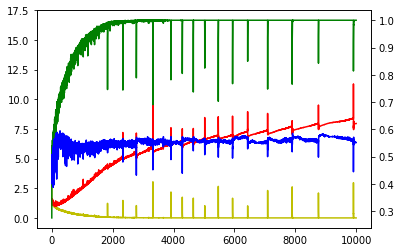

In [32]:
plt.plot(history.history['loss'], 'y', label = "train_loss")
plt.plot(history.history['val_loss'], 'r', label = "val_loss")
ax = plt.twinx()
ax.plot(history.history["acc"],'g',label="train_acc")
ax.plot(history.history['val_acc'], 'b', label = "val_loss")
plt.show()

- dropout 을 넣은것


Train on 559 samples, validate on 560 samples
Epoch 1/10000
559/559 [==============================] - 0s 531us/sample - loss: 3.0701 - acc: 0.3399 - val_loss: 1.4842 - val_acc: 0.4929
Epoch 2/10000
559/559 [==============================] - 0s 166us/sample - loss: 1.7429 - acc: 0.4365 - val_loss: 1.2205 - val_acc: 0.5018
Epoch 3/10000
559/559 [==============================] - 0s 172us/sample - loss: 1.4060 - acc: 0.4311 - val_loss: 1.2029 - val_acc: 0.5125
Epoch 4/10000
559/559 [==============================] - 0s 165us/sample - loss: 1.3299 - acc: 0.4544 - val_loss: 1.1829 - val_acc: 0.5000
Epoch 5/10000
559/559 [==============================] - 0s 168us/sample - loss: 1.3239 - acc: 0.4329 - val_loss: 1.2015 - val_acc: 0.5018
Epoch 6/10000
559/559 [==============================] - 0s 165us/sample - loss: 1.2854 - acc: 0.4633 - val_loss: 1.1780 - val_acc: 0.4875
Epoch 7/10000
559/559 [==============================] - 0s 165us/sample - loss: 1.2833 - acc: 0.4526 - val_loss: 1.2030

559/559 [==============================] - 0s 152us/sample - loss: 1.1016 - acc: 0.5259 - val_loss: 1.1276 - val_acc: 0.5161
Epoch 60/10000
559/559 [==============================] - 0s 143us/sample - loss: 1.0855 - acc: 0.5456 - val_loss: 1.0866 - val_acc: 0.5393
Epoch 61/10000
559/559 [==============================] - 0s 145us/sample - loss: 1.1233 - acc: 0.5438 - val_loss: 1.1044 - val_acc: 0.5143
Epoch 62/10000
559/559 [==============================] - 0s 147us/sample - loss: 1.0905 - acc: 0.5367 - val_loss: 1.1149 - val_acc: 0.5339
Epoch 63/10000
559/559 [==============================] - 0s 145us/sample - loss: 1.0854 - acc: 0.5438 - val_loss: 1.0966 - val_acc: 0.5304
Epoch 64/10000
559/559 [==============================] - 0s 154us/sample - loss: 1.0888 - acc: 0.5635 - val_loss: 1.0586 - val_acc: 0.5482
Epoch 65/10000
559/559 [==============================] - 0s 159us/sample - loss: 1.0635 - acc: 0.5385 - val_loss: 1.0677 - val_acc: 0.5339
Epoch 66/10000
559/559 [===========

559/559 [==============================] - 0s 143us/sample - loss: 0.9635 - acc: 0.5939 - val_loss: 1.0168 - val_acc: 0.5446
Epoch 118/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.9701 - acc: 0.5814 - val_loss: 1.0023 - val_acc: 0.5554
Epoch 119/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.9357 - acc: 0.5975 - val_loss: 1.0305 - val_acc: 0.5500
Epoch 120/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.9425 - acc: 0.5903 - val_loss: 0.9918 - val_acc: 0.5804
Epoch 121/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.9674 - acc: 0.5903 - val_loss: 1.0350 - val_acc: 0.5482
Epoch 122/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.9424 - acc: 0.6082 - val_loss: 1.0031 - val_acc: 0.5607
Epoch 123/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.9234 - acc: 0.6333 - val_loss: 1.0451 - val_acc: 0.5446
Epoch 124/10000
559/559 [====

559/559 [==============================] - 0s 141us/sample - loss: 0.9092 - acc: 0.6190 - val_loss: 1.0682 - val_acc: 0.5571
Epoch 176/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.8246 - acc: 0.6565 - val_loss: 1.0301 - val_acc: 0.5696
Epoch 177/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.8283 - acc: 0.6476 - val_loss: 1.0492 - val_acc: 0.5679
Epoch 178/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.8163 - acc: 0.6512 - val_loss: 1.0418 - val_acc: 0.5750
Epoch 179/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.8547 - acc: 0.6512 - val_loss: 1.0483 - val_acc: 0.5786
Epoch 180/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.8336 - acc: 0.6530 - val_loss: 1.0373 - val_acc: 0.5839
Epoch 181/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.8358 - acc: 0.6404 - val_loss: 1.1015 - val_acc: 0.5464
Epoch 182/10000
559/559 [====

559/559 [==============================] - 0s 141us/sample - loss: 0.7746 - acc: 0.6476 - val_loss: 1.1554 - val_acc: 0.5536
Epoch 234/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.7516 - acc: 0.6887 - val_loss: 1.1469 - val_acc: 0.5607
Epoch 235/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.7619 - acc: 0.6744 - val_loss: 1.1553 - val_acc: 0.5571
Epoch 236/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.7344 - acc: 0.6744 - val_loss: 1.1274 - val_acc: 0.5696
Epoch 237/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.7320 - acc: 0.6887 - val_loss: 1.2008 - val_acc: 0.5750
Epoch 238/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.7174 - acc: 0.6780 - val_loss: 1.1618 - val_acc: 0.5661
Epoch 239/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.6937 - acc: 0.6816 - val_loss: 1.1779 - val_acc: 0.5571
Epoch 240/10000
559/559 [====

559/559 [==============================] - 0s 140us/sample - loss: 0.6432 - acc: 0.7138 - val_loss: 1.2365 - val_acc: 0.5500
Epoch 292/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.6497 - acc: 0.7191 - val_loss: 1.2795 - val_acc: 0.5679
Epoch 293/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.6347 - acc: 0.7335 - val_loss: 1.3026 - val_acc: 0.5536
Epoch 294/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.6661 - acc: 0.7209 - val_loss: 1.3400 - val_acc: 0.5339
Epoch 295/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.6778 - acc: 0.7048 - val_loss: 1.3084 - val_acc: 0.5625
Epoch 296/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.6389 - acc: 0.7227 - val_loss: 1.3093 - val_acc: 0.5625
Epoch 297/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.5859 - acc: 0.7549 - val_loss: 1.3024 - val_acc: 0.5482
Epoch 298/10000
559/559 [====

559/559 [==============================] - 0s 172us/sample - loss: 0.6073 - acc: 0.7209 - val_loss: 1.4411 - val_acc: 0.5411
Epoch 350/10000
559/559 [==============================] - 0s 182us/sample - loss: 0.5718 - acc: 0.7496 - val_loss: 1.4493 - val_acc: 0.5518
Epoch 351/10000
559/559 [==============================] - 0s 179us/sample - loss: 0.5875 - acc: 0.7424 - val_loss: 1.4637 - val_acc: 0.5482
Epoch 352/10000
559/559 [==============================] - 0s 156us/sample - loss: 0.5947 - acc: 0.7442 - val_loss: 1.5251 - val_acc: 0.5161
Epoch 353/10000
559/559 [==============================] - 0s 165us/sample - loss: 0.5854 - acc: 0.7388 - val_loss: 1.4825 - val_acc: 0.5482
Epoch 354/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.5819 - acc: 0.7549 - val_loss: 1.5369 - val_acc: 0.5214
Epoch 355/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.5671 - acc: 0.7478 - val_loss: 1.4577 - val_acc: 0.5536
Epoch 356/10000
559/559 [====

559/559 [==============================] - 0s 143us/sample - loss: 0.5322 - acc: 0.7746 - val_loss: 1.6532 - val_acc: 0.5393
Epoch 408/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.5013 - acc: 0.7746 - val_loss: 1.9597 - val_acc: 0.5036
Epoch 409/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.5602 - acc: 0.7531 - val_loss: 1.6493 - val_acc: 0.5518
Epoch 410/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.4964 - acc: 0.7835 - val_loss: 1.6828 - val_acc: 0.5357
Epoch 411/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.4570 - acc: 0.8032 - val_loss: 1.7166 - val_acc: 0.5393
Epoch 412/10000
559/559 [==============================] - 0s 191us/sample - loss: 0.5055 - acc: 0.7674 - val_loss: 1.6617 - val_acc: 0.5304
Epoch 413/10000
559/559 [==============================] - 0s 172us/sample - loss: 0.4657 - acc: 0.8157 - val_loss: 1.7225 - val_acc: 0.5268
Epoch 414/10000
559/559 [====

Epoch 465/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.4529 - acc: 0.7996 - val_loss: 1.8885 - val_acc: 0.5357
Epoch 466/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.4581 - acc: 0.8086 - val_loss: 1.9058 - val_acc: 0.5232
Epoch 467/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.4628 - acc: 0.7943 - val_loss: 1.9214 - val_acc: 0.5304
Epoch 468/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.4484 - acc: 0.8068 - val_loss: 1.9699 - val_acc: 0.5250
Epoch 469/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.4889 - acc: 0.8050 - val_loss: 1.8594 - val_acc: 0.5357
Epoch 470/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.4769 - acc: 0.7871 - val_loss: 1.8929 - val_acc: 0.5268
Epoch 471/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.4877 - acc: 0.7996 - val_loss: 1.9213 - val_acc: 0.5357
Epoch 472/100

Epoch 523/10000
559/559 [==============================] - 0s 193us/sample - loss: 0.3987 - acc: 0.8265 - val_loss: 2.0612 - val_acc: 0.5304
Epoch 524/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.4019 - acc: 0.8318 - val_loss: 2.0595 - val_acc: 0.5554
Epoch 525/10000
559/559 [==============================] - 0s 132us/sample - loss: 0.4176 - acc: 0.8086 - val_loss: 2.0337 - val_acc: 0.5554
Epoch 526/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.3939 - acc: 0.8426 - val_loss: 2.1108 - val_acc: 0.5375
Epoch 527/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.3939 - acc: 0.8462 - val_loss: 2.1074 - val_acc: 0.5339
Epoch 528/10000
559/559 [==============================] - 0s 106us/sample - loss: 0.4593 - acc: 0.7996 - val_loss: 2.0478 - val_acc: 0.5286
Epoch 529/10000
559/559 [==============================] - 0s 162us/sample - loss: 0.4327 - acc: 0.8283 - val_loss: 2.0657 - val_acc: 0.5429
Epoch 530/100

559/559 [==============================] - 0s 140us/sample - loss: 0.3682 - acc: 0.8444 - val_loss: 2.2630 - val_acc: 0.5268
Epoch 582/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.3618 - acc: 0.8426 - val_loss: 2.4039 - val_acc: 0.5089
Epoch 583/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.3956 - acc: 0.8301 - val_loss: 2.2338 - val_acc: 0.5321
Epoch 584/10000
559/559 [==============================] - 0s 157us/sample - loss: 0.3775 - acc: 0.8336 - val_loss: 2.2265 - val_acc: 0.5286
Epoch 585/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.3735 - acc: 0.8390 - val_loss: 2.2498 - val_acc: 0.5089
Epoch 586/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.3549 - acc: 0.8426 - val_loss: 2.2593 - val_acc: 0.5393
Epoch 587/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.3807 - acc: 0.8408 - val_loss: 2.2671 - val_acc: 0.5500
Epoch 588/10000
559/559 [====

559/559 [==============================] - 0s 134us/sample - loss: 0.3447 - acc: 0.8497 - val_loss: 2.1936 - val_acc: 0.5464
Epoch 640/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.3626 - acc: 0.8497 - val_loss: 2.2032 - val_acc: 0.5607
Epoch 641/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.3432 - acc: 0.8533 - val_loss: 2.2767 - val_acc: 0.5464
Epoch 642/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.3560 - acc: 0.8462 - val_loss: 2.2883 - val_acc: 0.5482
Epoch 643/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.3431 - acc: 0.8533 - val_loss: 2.3698 - val_acc: 0.5179
Epoch 644/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.3413 - acc: 0.8551 - val_loss: 2.2406 - val_acc: 0.5429
Epoch 645/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.3342 - acc: 0.8748 - val_loss: 2.2518 - val_acc: 0.5429
Epoch 646/10000
559/559 [====

559/559 [==============================] - 0s 136us/sample - loss: 0.3259 - acc: 0.8676 - val_loss: 2.4244 - val_acc: 0.5500
Epoch 698/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.3266 - acc: 0.8533 - val_loss: 2.6004 - val_acc: 0.5250
Epoch 699/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.3081 - acc: 0.8712 - val_loss: 2.4605 - val_acc: 0.5321
Epoch 700/10000
559/559 [==============================] - 0s 137us/sample - loss: 0.2898 - acc: 0.8712 - val_loss: 2.4476 - val_acc: 0.5304
Epoch 701/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.3015 - acc: 0.8730 - val_loss: 2.5654 - val_acc: 0.5393
Epoch 702/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.3005 - acc: 0.8766 - val_loss: 2.4997 - val_acc: 0.5607
Epoch 703/10000
559/559 [==============================] - 0s 135us/sample - loss: 0.3277 - acc: 0.8551 - val_loss: 2.4501 - val_acc: 0.5339
Epoch 704/10000
559/559 [====

559/559 [==============================] - 0s 143us/sample - loss: 0.2886 - acc: 0.8801 - val_loss: 2.4914 - val_acc: 0.5411
Epoch 756/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2963 - acc: 0.8676 - val_loss: 2.4436 - val_acc: 0.5607
Epoch 757/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2932 - acc: 0.8712 - val_loss: 2.4908 - val_acc: 0.5536
Epoch 758/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.3360 - acc: 0.8623 - val_loss: 2.5268 - val_acc: 0.5446
Epoch 759/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.3238 - acc: 0.8623 - val_loss: 2.5596 - val_acc: 0.5321
Epoch 760/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.3275 - acc: 0.8515 - val_loss: 2.5842 - val_acc: 0.5214
Epoch 761/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.2885 - acc: 0.8784 - val_loss: 2.4866 - val_acc: 0.5214
Epoch 762/10000
559/559 [====

559/559 [==============================] - 0s 140us/sample - loss: 0.2559 - acc: 0.8837 - val_loss: 2.6621 - val_acc: 0.5500
Epoch 814/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2620 - acc: 0.8730 - val_loss: 2.7196 - val_acc: 0.5321
Epoch 815/10000
559/559 [==============================] - 0s 201us/sample - loss: 0.2615 - acc: 0.8855 - val_loss: 2.7574 - val_acc: 0.5196
Epoch 816/10000
559/559 [==============================] - 0s 199us/sample - loss: 0.2681 - acc: 0.8837 - val_loss: 2.7531 - val_acc: 0.5429
Epoch 817/10000
559/559 [==============================] - 0s 195us/sample - loss: 0.2730 - acc: 0.8891 - val_loss: 2.7898 - val_acc: 0.5339
Epoch 818/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.2714 - acc: 0.8784 - val_loss: 2.7205 - val_acc: 0.5321
Epoch 819/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2528 - acc: 0.8873 - val_loss: 2.7441 - val_acc: 0.5393
Epoch 820/10000
559/559 [====

559/559 [==============================] - 0s 122us/sample - loss: 0.2181 - acc: 0.9070 - val_loss: 2.8052 - val_acc: 0.5250
Epoch 872/10000
559/559 [==============================] - 0s 183us/sample - loss: 0.2365 - acc: 0.9070 - val_loss: 2.8100 - val_acc: 0.5321
Epoch 873/10000
559/559 [==============================] - 0s 192us/sample - loss: 0.2609 - acc: 0.8980 - val_loss: 2.6970 - val_acc: 0.5571
Epoch 874/10000
559/559 [==============================] - 0s 132us/sample - loss: 0.2783 - acc: 0.8962 - val_loss: 2.7475 - val_acc: 0.5429
Epoch 875/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2270 - acc: 0.9070 - val_loss: 2.7722 - val_acc: 0.5214
Epoch 876/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2431 - acc: 0.9034 - val_loss: 2.7413 - val_acc: 0.5286
Epoch 877/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2742 - acc: 0.8658 - val_loss: 2.7990 - val_acc: 0.5214
Epoch 878/10000
559/559 [====

559/559 [==============================] - 0s 140us/sample - loss: 0.2190 - acc: 0.9123 - val_loss: 2.8998 - val_acc: 0.5446
Epoch 930/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2273 - acc: 0.9213 - val_loss: 2.8686 - val_acc: 0.5375
Epoch 931/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1729 - acc: 0.9302 - val_loss: 2.9413 - val_acc: 0.5429
Epoch 932/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.2242 - acc: 0.8945 - val_loss: 2.8648 - val_acc: 0.5357
Epoch 933/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.2215 - acc: 0.9195 - val_loss: 2.9123 - val_acc: 0.5536
Epoch 934/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.2242 - acc: 0.9016 - val_loss: 2.8058 - val_acc: 0.5500
Epoch 935/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.2327 - acc: 0.9016 - val_loss: 2.9440 - val_acc: 0.5411
Epoch 936/10000
559/559 [====

559/559 [==============================] - 0s 136us/sample - loss: 0.2084 - acc: 0.9159 - val_loss: 2.9613 - val_acc: 0.5339
Epoch 988/10000
559/559 [==============================] - 0s 132us/sample - loss: 0.2425 - acc: 0.8998 - val_loss: 2.9388 - val_acc: 0.5214
Epoch 989/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.2417 - acc: 0.9123 - val_loss: 2.9378 - val_acc: 0.5339
Epoch 990/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.2325 - acc: 0.9070 - val_loss: 3.0269 - val_acc: 0.5214
Epoch 991/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.2148 - acc: 0.9141 - val_loss: 3.0747 - val_acc: 0.5214
Epoch 992/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.2145 - acc: 0.9070 - val_loss: 2.9718 - val_acc: 0.5411
Epoch 993/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.2218 - acc: 0.8962 - val_loss: 2.9808 - val_acc: 0.5339
Epoch 994/10000
559/559 [====

Epoch 1045/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1781 - acc: 0.9195 - val_loss: 3.0684 - val_acc: 0.5286
Epoch 1046/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.2027 - acc: 0.9231 - val_loss: 3.0315 - val_acc: 0.5268
Epoch 1047/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.2237 - acc: 0.9141 - val_loss: 3.0285 - val_acc: 0.5464
Epoch 1048/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1991 - acc: 0.9249 - val_loss: 2.9656 - val_acc: 0.5446
Epoch 1049/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1997 - acc: 0.9213 - val_loss: 3.1036 - val_acc: 0.5500
Epoch 1050/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.2422 - acc: 0.9088 - val_loss: 2.9830 - val_acc: 0.5464
Epoch 1051/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.2152 - acc: 0.8945 - val_loss: 3.0955 - val_acc: 0.5214
Epoch 

Epoch 1103/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2635 - acc: 0.8980 - val_loss: 3.1206 - val_acc: 0.5321
Epoch 1104/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1920 - acc: 0.9284 - val_loss: 3.0899 - val_acc: 0.5464
Epoch 1105/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1960 - acc: 0.9159 - val_loss: 3.0623 - val_acc: 0.5214
Epoch 1106/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2091 - acc: 0.9231 - val_loss: 3.0904 - val_acc: 0.5214
Epoch 1107/10000
559/559 [==============================] - 0s 152us/sample - loss: 0.2178 - acc: 0.9070 - val_loss: 3.0983 - val_acc: 0.5304
Epoch 1108/10000
559/559 [==============================] - 0s 202us/sample - loss: 0.1645 - acc: 0.9338 - val_loss: 3.1155 - val_acc: 0.5393
Epoch 1109/10000
559/559 [==============================] - 0s 186us/sample - loss: 0.2142 - acc: 0.9088 - val_loss: 3.2391 - val_acc: 0.5304
Epoch 

Epoch 1161/10000
559/559 [==============================] - 0s 124us/sample - loss: 0.1659 - acc: 0.9392 - val_loss: 3.2506 - val_acc: 0.5375
Epoch 1162/10000
559/559 [==============================] - 0s 152us/sample - loss: 0.1668 - acc: 0.9284 - val_loss: 3.3018 - val_acc: 0.5357
Epoch 1163/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1709 - acc: 0.9356 - val_loss: 3.3173 - val_acc: 0.5554
Epoch 1164/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1881 - acc: 0.9213 - val_loss: 3.4217 - val_acc: 0.5393
Epoch 1165/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.2655 - acc: 0.9052 - val_loss: 3.3396 - val_acc: 0.5375
Epoch 1166/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1680 - acc: 0.9195 - val_loss: 3.2272 - val_acc: 0.5536
Epoch 1167/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1728 - acc: 0.9356 - val_loss: 3.4617 - val_acc: 0.5214
Epoch 

Epoch 1219/10000
559/559 [==============================] - 0s 209us/sample - loss: 0.1784 - acc: 0.9249 - val_loss: 3.3658 - val_acc: 0.5125
Epoch 1220/10000
559/559 [==============================] - 0s 208us/sample - loss: 0.1473 - acc: 0.9499 - val_loss: 3.2723 - val_acc: 0.5268
Epoch 1221/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.1817 - acc: 0.9231 - val_loss: 3.3332 - val_acc: 0.5143
Epoch 1222/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1603 - acc: 0.9374 - val_loss: 3.2296 - val_acc: 0.5214
Epoch 1223/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2046 - acc: 0.9213 - val_loss: 3.3504 - val_acc: 0.5196
Epoch 1224/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1959 - acc: 0.9320 - val_loss: 3.2184 - val_acc: 0.5143
Epoch 1225/10000
559/559 [==============================] - 0s 125us/sample - loss: 0.1975 - acc: 0.9213 - val_loss: 3.3351 - val_acc: 0.5214
Epoch 

Epoch 1277/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1646 - acc: 0.9410 - val_loss: 3.4501 - val_acc: 0.5286
Epoch 1278/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.1442 - acc: 0.9428 - val_loss: 3.4177 - val_acc: 0.5286
Epoch 1279/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.1485 - acc: 0.9445 - val_loss: 3.4616 - val_acc: 0.5143
Epoch 1280/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.1650 - acc: 0.9392 - val_loss: 3.5032 - val_acc: 0.5196
Epoch 1281/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1196 - acc: 0.9499 - val_loss: 3.5350 - val_acc: 0.5232
Epoch 1282/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1642 - acc: 0.9320 - val_loss: 3.4899 - val_acc: 0.5357
Epoch 1283/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1376 - acc: 0.9428 - val_loss: 3.3927 - val_acc: 0.5250
Epoch 

Epoch 1335/10000
559/559 [==============================] - 0s 216us/sample - loss: 0.1473 - acc: 0.9392 - val_loss: 3.4058 - val_acc: 0.5250
Epoch 1336/10000
559/559 [==============================] - 0s 135us/sample - loss: 0.1598 - acc: 0.9284 - val_loss: 3.4288 - val_acc: 0.5571
Epoch 1337/10000
559/559 [==============================] - 0s 115us/sample - loss: 0.1828 - acc: 0.9249 - val_loss: 3.5556 - val_acc: 0.5107
Epoch 1338/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.1867 - acc: 0.9302 - val_loss: 3.3888 - val_acc: 0.5214
Epoch 1339/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1749 - acc: 0.9392 - val_loss: 3.4411 - val_acc: 0.5321
Epoch 1340/10000
559/559 [==============================] - 0s 146us/sample - loss: 0.1847 - acc: 0.9338 - val_loss: 3.4594 - val_acc: 0.5304
Epoch 1341/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1391 - acc: 0.9410 - val_loss: 3.5826 - val_acc: 0.5286
Epoch 

Epoch 1393/10000
559/559 [==============================] - 0s 208us/sample - loss: 0.1297 - acc: 0.9553 - val_loss: 3.4196 - val_acc: 0.5161
Epoch 1394/10000
559/559 [==============================] - 0s 197us/sample - loss: 0.1572 - acc: 0.9356 - val_loss: 3.3932 - val_acc: 0.5357
Epoch 1395/10000
559/559 [==============================] - 0s 126us/sample - loss: 0.1533 - acc: 0.9392 - val_loss: 3.3666 - val_acc: 0.5250
Epoch 1396/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1580 - acc: 0.9410 - val_loss: 3.3355 - val_acc: 0.5339
Epoch 1397/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1508 - acc: 0.9392 - val_loss: 3.3083 - val_acc: 0.5357
Epoch 1398/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.1980 - acc: 0.9231 - val_loss: 3.3577 - val_acc: 0.5232
Epoch 1399/10000
559/559 [==============================] - 0s 115us/sample - loss: 0.1339 - acc: 0.9535 - val_loss: 3.3835 - val_acc: 0.5357
Epoch 

Epoch 1451/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1425 - acc: 0.9428 - val_loss: 3.4252 - val_acc: 0.5339
Epoch 1452/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1508 - acc: 0.9445 - val_loss: 3.5124 - val_acc: 0.5304
Epoch 1453/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1482 - acc: 0.9481 - val_loss: 3.5932 - val_acc: 0.5357
Epoch 1454/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1536 - acc: 0.9428 - val_loss: 3.5301 - val_acc: 0.5357
Epoch 1455/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1796 - acc: 0.9428 - val_loss: 3.5387 - val_acc: 0.5304
Epoch 1456/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1312 - acc: 0.9481 - val_loss: 3.5362 - val_acc: 0.5321
Epoch 1457/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1417 - acc: 0.9392 - val_loss: 3.5092 - val_acc: 0.5357
Epoch 

Epoch 1509/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1416 - acc: 0.9320 - val_loss: 3.6293 - val_acc: 0.5232
Epoch 1510/10000
559/559 [==============================] - 0s 142us/sample - loss: 0.1406 - acc: 0.9463 - val_loss: 3.9131 - val_acc: 0.5214
Epoch 1511/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.1671 - acc: 0.9267 - val_loss: 3.7559 - val_acc: 0.5232
Epoch 1512/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1499 - acc: 0.9284 - val_loss: 3.6585 - val_acc: 0.5286
Epoch 1513/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1878 - acc: 0.9231 - val_loss: 3.7145 - val_acc: 0.5339
Epoch 1514/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1363 - acc: 0.9535 - val_loss: 3.6549 - val_acc: 0.5339
Epoch 1515/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1295 - acc: 0.9445 - val_loss: 3.5818 - val_acc: 0.5357
Epoch 

Epoch 1567/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1501 - acc: 0.9445 - val_loss: 3.8587 - val_acc: 0.5286
Epoch 1568/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.1803 - acc: 0.9428 - val_loss: 3.8049 - val_acc: 0.5393
Epoch 1569/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1318 - acc: 0.9481 - val_loss: 3.7296 - val_acc: 0.5357
Epoch 1570/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1348 - acc: 0.9463 - val_loss: 3.6501 - val_acc: 0.5375
Epoch 1571/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1499 - acc: 0.9356 - val_loss: 3.7176 - val_acc: 0.5196
Epoch 1572/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1303 - acc: 0.9463 - val_loss: 3.7552 - val_acc: 0.5518
Epoch 1573/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1089 - acc: 0.9624 - val_loss: 3.7952 - val_acc: 0.5393
Epoch 

Epoch 1625/10000
559/559 [==============================] - 0s 132us/sample - loss: 0.1319 - acc: 0.9499 - val_loss: 3.6340 - val_acc: 0.5179
Epoch 1626/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1315 - acc: 0.9571 - val_loss: 3.5886 - val_acc: 0.5196
Epoch 1627/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1286 - acc: 0.9445 - val_loss: 3.6357 - val_acc: 0.5232
Epoch 1628/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1337 - acc: 0.9499 - val_loss: 3.6348 - val_acc: 0.5339
Epoch 1629/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1203 - acc: 0.9499 - val_loss: 3.6535 - val_acc: 0.5339
Epoch 1630/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1294 - acc: 0.9499 - val_loss: 3.7836 - val_acc: 0.5232
Epoch 1631/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1453 - acc: 0.9356 - val_loss: 3.8178 - val_acc: 0.5196
Epoch 

Epoch 1683/10000
559/559 [==============================] - 0s 144us/sample - loss: 0.1402 - acc: 0.9463 - val_loss: 3.8505 - val_acc: 0.5357
Epoch 1684/10000
559/559 [==============================] - 0s 121us/sample - loss: 0.1327 - acc: 0.9445 - val_loss: 3.8707 - val_acc: 0.5286
Epoch 1685/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1305 - acc: 0.9463 - val_loss: 3.9437 - val_acc: 0.5304
Epoch 1686/10000
559/559 [==============================] - 0s 158us/sample - loss: 0.1781 - acc: 0.9374 - val_loss: 3.9419 - val_acc: 0.5143
Epoch 1687/10000
559/559 [==============================] - 0s 116us/sample - loss: 0.1438 - acc: 0.9499 - val_loss: 3.9884 - val_acc: 0.5196
Epoch 1688/10000
559/559 [==============================] - 0s 172us/sample - loss: 0.1501 - acc: 0.9481 - val_loss: 3.7870 - val_acc: 0.5268
Epoch 1689/10000
559/559 [==============================] - 0s 197us/sample - loss: 0.1367 - acc: 0.9481 - val_loss: 3.7220 - val_acc: 0.5304
Epoch 

Epoch 1741/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1218 - acc: 0.9481 - val_loss: 3.9651 - val_acc: 0.5357
Epoch 1742/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1388 - acc: 0.9445 - val_loss: 3.9871 - val_acc: 0.5429
Epoch 1743/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1156 - acc: 0.9642 - val_loss: 3.9005 - val_acc: 0.5357
Epoch 1744/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1024 - acc: 0.9678 - val_loss: 3.9780 - val_acc: 0.5304
Epoch 1745/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1066 - acc: 0.9660 - val_loss: 4.0028 - val_acc: 0.5304
Epoch 1746/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1271 - acc: 0.9517 - val_loss: 4.0589 - val_acc: 0.5232
Epoch 1747/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1202 - acc: 0.9553 - val_loss: 4.1035 - val_acc: 0.5357
Epoch 

Epoch 1799/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1739 - acc: 0.9141 - val_loss: 3.8540 - val_acc: 0.5464
Epoch 1800/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.2160 - acc: 0.9302 - val_loss: 3.9213 - val_acc: 0.5286
Epoch 1801/10000
559/559 [==============================] - 0s 120us/sample - loss: 0.1282 - acc: 0.9535 - val_loss: 3.9399 - val_acc: 0.5321
Epoch 1802/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1390 - acc: 0.9499 - val_loss: 3.8349 - val_acc: 0.5393
Epoch 1803/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1632 - acc: 0.9374 - val_loss: 3.8749 - val_acc: 0.5161
Epoch 1804/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.1489 - acc: 0.9356 - val_loss: 3.9258 - val_acc: 0.5179
Epoch 1805/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1485 - acc: 0.9499 - val_loss: 3.8565 - val_acc: 0.5268
Epoch 

Epoch 1857/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1193 - acc: 0.9642 - val_loss: 3.7479 - val_acc: 0.5375
Epoch 1858/10000
559/559 [==============================] - 0s 115us/sample - loss: 0.1066 - acc: 0.9553 - val_loss: 3.7161 - val_acc: 0.5304
Epoch 1859/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1586 - acc: 0.9410 - val_loss: 3.7845 - val_acc: 0.5286
Epoch 1860/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1440 - acc: 0.9481 - val_loss: 3.6592 - val_acc: 0.5446
Epoch 1861/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1436 - acc: 0.9553 - val_loss: 3.6778 - val_acc: 0.5500
Epoch 1862/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1868 - acc: 0.9249 - val_loss: 3.6393 - val_acc: 0.5339
Epoch 1863/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1225 - acc: 0.9535 - val_loss: 3.7740 - val_acc: 0.5250
Epoch 

Epoch 1915/10000
559/559 [==============================] - 0s 184us/sample - loss: 0.1196 - acc: 0.9517 - val_loss: 3.9101 - val_acc: 0.5214
Epoch 1916/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1036 - acc: 0.9624 - val_loss: 3.8766 - val_acc: 0.5250
Epoch 1917/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1321 - acc: 0.9499 - val_loss: 3.9932 - val_acc: 0.5304
Epoch 1918/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1174 - acc: 0.9481 - val_loss: 3.9557 - val_acc: 0.5304
Epoch 1919/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1012 - acc: 0.9606 - val_loss: 3.8774 - val_acc: 0.5304
Epoch 1920/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1037 - acc: 0.9624 - val_loss: 3.8808 - val_acc: 0.5411
Epoch 1921/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1096 - acc: 0.9571 - val_loss: 3.8136 - val_acc: 0.5286
Epoch 

Epoch 1973/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1105 - acc: 0.9553 - val_loss: 3.8605 - val_acc: 0.5321
Epoch 1974/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1174 - acc: 0.9553 - val_loss: 3.7995 - val_acc: 0.5250
Epoch 1975/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1375 - acc: 0.9535 - val_loss: 3.7501 - val_acc: 0.5375
Epoch 1976/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1176 - acc: 0.9696 - val_loss: 3.7605 - val_acc: 0.5411
Epoch 1977/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1421 - acc: 0.9571 - val_loss: 3.8319 - val_acc: 0.5411
Epoch 1978/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1505 - acc: 0.9589 - val_loss: 3.8838 - val_acc: 0.5304
Epoch 1979/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1129 - acc: 0.9517 - val_loss: 3.9058 - val_acc: 0.5429
Epoch 

Epoch 2031/10000
559/559 [==============================] - 0s 225us/sample - loss: 0.1119 - acc: 0.9606 - val_loss: 3.8892 - val_acc: 0.5393
Epoch 2032/10000
559/559 [==============================] - 0s 200us/sample - loss: 0.1052 - acc: 0.9535 - val_loss: 3.9695 - val_acc: 0.5304
Epoch 2033/10000
559/559 [==============================] - 0s 172us/sample - loss: 0.1118 - acc: 0.9553 - val_loss: 3.9186 - val_acc: 0.5500
Epoch 2034/10000
559/559 [==============================] - 0s 131us/sample - loss: 0.1151 - acc: 0.9606 - val_loss: 3.9096 - val_acc: 0.5429
Epoch 2035/10000
559/559 [==============================] - 0s 168us/sample - loss: 0.1137 - acc: 0.9517 - val_loss: 4.0056 - val_acc: 0.5196
Epoch 2036/10000
559/559 [==============================] - 0s 124us/sample - loss: 0.1272 - acc: 0.9410 - val_loss: 4.0159 - val_acc: 0.5411
Epoch 2037/10000
559/559 [==============================] - 0s 166us/sample - loss: 0.0936 - acc: 0.9714 - val_loss: 3.9733 - val_acc: 0.5232
Epoch 

Epoch 2089/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1212 - acc: 0.9517 - val_loss: 3.8695 - val_acc: 0.5375
Epoch 2090/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0979 - acc: 0.9642 - val_loss: 3.8732 - val_acc: 0.5232
Epoch 2091/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1012 - acc: 0.9606 - val_loss: 3.9485 - val_acc: 0.5214
Epoch 2092/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.1041 - acc: 0.9589 - val_loss: 3.8004 - val_acc: 0.5268
Epoch 2093/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.1533 - acc: 0.9410 - val_loss: 3.9221 - val_acc: 0.5357
Epoch 2094/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.1227 - acc: 0.9535 - val_loss: 4.0257 - val_acc: 0.5143
Epoch 2095/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1126 - acc: 0.9660 - val_loss: 3.9724 - val_acc: 0.5232
Epoch 

Epoch 2147/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1211 - acc: 0.9481 - val_loss: 3.9955 - val_acc: 0.5321
Epoch 2148/10000
559/559 [==============================] - 0s 199us/sample - loss: 0.1064 - acc: 0.9589 - val_loss: 3.9814 - val_acc: 0.5411
Epoch 2149/10000
559/559 [==============================] - 0s 211us/sample - loss: 0.0975 - acc: 0.9624 - val_loss: 3.9792 - val_acc: 0.5321
Epoch 2150/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.0750 - acc: 0.9714 - val_loss: 3.9561 - val_acc: 0.5411
Epoch 2151/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0867 - acc: 0.9678 - val_loss: 3.9533 - val_acc: 0.5411
Epoch 2152/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1045 - acc: 0.9535 - val_loss: 3.9959 - val_acc: 0.5321
Epoch 2153/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0909 - acc: 0.9624 - val_loss: 4.1477 - val_acc: 0.5411
Epoch 

Epoch 2205/10000
559/559 [==============================] - 0s 116us/sample - loss: 0.0742 - acc: 0.9714 - val_loss: 4.0816 - val_acc: 0.5339
Epoch 2206/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0937 - acc: 0.9678 - val_loss: 4.0102 - val_acc: 0.5375
Epoch 2207/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0894 - acc: 0.9606 - val_loss: 3.9153 - val_acc: 0.5214
Epoch 2208/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1054 - acc: 0.9660 - val_loss: 3.9990 - val_acc: 0.5286
Epoch 2209/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1117 - acc: 0.9553 - val_loss: 3.9761 - val_acc: 0.5464
Epoch 2210/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0875 - acc: 0.9678 - val_loss: 4.0512 - val_acc: 0.5339
Epoch 2211/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0985 - acc: 0.9624 - val_loss: 4.0767 - val_acc: 0.5286
Epoch 

Epoch 2263/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0992 - acc: 0.9535 - val_loss: 3.9946 - val_acc: 0.5250
Epoch 2264/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1145 - acc: 0.9535 - val_loss: 4.0005 - val_acc: 0.5268
Epoch 2265/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1603 - acc: 0.9410 - val_loss: 3.8594 - val_acc: 0.5625
Epoch 2266/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.2271 - acc: 0.9159 - val_loss: 3.9846 - val_acc: 0.5304
Epoch 2267/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1008 - acc: 0.9571 - val_loss: 3.9157 - val_acc: 0.5214
Epoch 2268/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1168 - acc: 0.9499 - val_loss: 3.9215 - val_acc: 0.5304
Epoch 2269/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1152 - acc: 0.9553 - val_loss: 3.9560 - val_acc: 0.5268
Epoch 

Epoch 2321/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0994 - acc: 0.9660 - val_loss: 4.1352 - val_acc: 0.5304
Epoch 2322/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1012 - acc: 0.9642 - val_loss: 4.2090 - val_acc: 0.5375
Epoch 2323/10000
559/559 [==============================] - 0s 137us/sample - loss: 0.1300 - acc: 0.9463 - val_loss: 3.9941 - val_acc: 0.5464
Epoch 2324/10000
559/559 [==============================] - 0s 109us/sample - loss: 0.1338 - acc: 0.9499 - val_loss: 3.8996 - val_acc: 0.5375
Epoch 2325/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1136 - acc: 0.9606 - val_loss: 3.9364 - val_acc: 0.5339
Epoch 2326/10000
559/559 [==============================] - 0s 133us/sample - loss: 0.1226 - acc: 0.9535 - val_loss: 4.0191 - val_acc: 0.5232
Epoch 2327/10000
559/559 [==============================] - 0s 121us/sample - loss: 0.0892 - acc: 0.9642 - val_loss: 4.0497 - val_acc: 0.5375
Epoch 

Epoch 2379/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0972 - acc: 0.9660 - val_loss: 4.1959 - val_acc: 0.5446
Epoch 2380/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0567 - acc: 0.9821 - val_loss: 4.1107 - val_acc: 0.5429
Epoch 2381/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1181 - acc: 0.9624 - val_loss: 4.1732 - val_acc: 0.5446
Epoch 2382/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0998 - acc: 0.9714 - val_loss: 4.1701 - val_acc: 0.5250
Epoch 2383/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0972 - acc: 0.9589 - val_loss: 4.1748 - val_acc: 0.5161
Epoch 2384/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1380 - acc: 0.9553 - val_loss: 4.1635 - val_acc: 0.5232
Epoch 2385/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1051 - acc: 0.9571 - val_loss: 4.2443 - val_acc: 0.5179
Epoch 

Epoch 2437/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1187 - acc: 0.9535 - val_loss: 3.9678 - val_acc: 0.5214
Epoch 2438/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1066 - acc: 0.9624 - val_loss: 4.0059 - val_acc: 0.5143
Epoch 2439/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1435 - acc: 0.9517 - val_loss: 3.9972 - val_acc: 0.5161
Epoch 2440/10000
559/559 [==============================] - 0s 156us/sample - loss: 0.1010 - acc: 0.9624 - val_loss: 3.9505 - val_acc: 0.5161
Epoch 2441/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.1549 - acc: 0.9481 - val_loss: 3.8653 - val_acc: 0.5054
Epoch 2442/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1274 - acc: 0.9589 - val_loss: 3.8083 - val_acc: 0.5196
Epoch 2443/10000
559/559 [==============================] - 0s 137us/sample - loss: 0.1215 - acc: 0.9481 - val_loss: 3.9802 - val_acc: 0.5268
Epoch 

Epoch 2495/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0730 - acc: 0.9767 - val_loss: 4.2208 - val_acc: 0.5161
Epoch 2496/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0912 - acc: 0.9696 - val_loss: 4.1985 - val_acc: 0.5161
Epoch 2497/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1079 - acc: 0.9606 - val_loss: 4.2599 - val_acc: 0.5071
Epoch 2498/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1317 - acc: 0.9571 - val_loss: 4.0867 - val_acc: 0.5286
Epoch 2499/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1417 - acc: 0.9517 - val_loss: 4.0744 - val_acc: 0.5429
Epoch 2500/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1560 - acc: 0.9463 - val_loss: 3.9718 - val_acc: 0.5321
Epoch 2501/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1018 - acc: 0.9535 - val_loss: 3.9189 - val_acc: 0.5393
Epoch 

Epoch 2553/10000
559/559 [==============================] - 0s 165us/sample - loss: 0.1119 - acc: 0.9624 - val_loss: 4.2941 - val_acc: 0.5268
Epoch 2554/10000
559/559 [==============================] - 0s 165us/sample - loss: 0.1443 - acc: 0.9517 - val_loss: 4.0854 - val_acc: 0.5304
Epoch 2555/10000
559/559 [==============================] - 0s 165us/sample - loss: 0.1322 - acc: 0.9589 - val_loss: 4.0652 - val_acc: 0.5250
Epoch 2556/10000
559/559 [==============================] - 0s 161us/sample - loss: 0.1177 - acc: 0.9553 - val_loss: 4.1454 - val_acc: 0.5250
Epoch 2557/10000
559/559 [==============================] - 0s 170us/sample - loss: 0.1284 - acc: 0.9481 - val_loss: 4.2526 - val_acc: 0.5161
Epoch 2558/10000
559/559 [==============================] - 0s 170us/sample - loss: 0.1285 - acc: 0.9463 - val_loss: 4.2600 - val_acc: 0.5161
Epoch 2559/10000
559/559 [==============================] - 0s 163us/sample - loss: 0.1354 - acc: 0.9517 - val_loss: 4.2532 - val_acc: 0.5179
Epoch 

Epoch 2611/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1210 - acc: 0.9589 - val_loss: 4.0870 - val_acc: 0.5250
Epoch 2612/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1034 - acc: 0.9660 - val_loss: 4.0391 - val_acc: 0.5089
Epoch 2613/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1060 - acc: 0.9571 - val_loss: 4.1602 - val_acc: 0.5250
Epoch 2614/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1308 - acc: 0.9445 - val_loss: 4.3135 - val_acc: 0.5321
Epoch 2615/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0756 - acc: 0.9678 - val_loss: 4.2931 - val_acc: 0.5321
Epoch 2616/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1190 - acc: 0.9642 - val_loss: 4.2631 - val_acc: 0.5232
Epoch 2617/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0784 - acc: 0.9696 - val_loss: 4.2303 - val_acc: 0.5375
Epoch 

Epoch 2669/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1321 - acc: 0.9535 - val_loss: 4.1613 - val_acc: 0.5250
Epoch 2670/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1327 - acc: 0.9499 - val_loss: 4.1990 - val_acc: 0.5304
Epoch 2671/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1076 - acc: 0.9642 - val_loss: 4.0773 - val_acc: 0.5179
Epoch 2672/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1112 - acc: 0.9571 - val_loss: 4.0237 - val_acc: 0.5214
Epoch 2673/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1090 - acc: 0.9606 - val_loss: 4.0739 - val_acc: 0.5321
Epoch 2674/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0830 - acc: 0.9678 - val_loss: 4.0629 - val_acc: 0.5429
Epoch 2675/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.1161 - acc: 0.9571 - val_loss: 4.0712 - val_acc: 0.5357
Epoch 

Epoch 2727/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1229 - acc: 0.9499 - val_loss: 4.4347 - val_acc: 0.5125
Epoch 2728/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0824 - acc: 0.9678 - val_loss: 4.5188 - val_acc: 0.5321
Epoch 2729/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1205 - acc: 0.9589 - val_loss: 4.4583 - val_acc: 0.5286
Epoch 2730/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1064 - acc: 0.9571 - val_loss: 4.3945 - val_acc: 0.5214
Epoch 2731/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0824 - acc: 0.9642 - val_loss: 4.3918 - val_acc: 0.5321
Epoch 2732/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1243 - acc: 0.9571 - val_loss: 4.4192 - val_acc: 0.5411
Epoch 2733/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0812 - acc: 0.9696 - val_loss: 4.2928 - val_acc: 0.5393
Epoch 

Epoch 2785/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0966 - acc: 0.9660 - val_loss: 4.6130 - val_acc: 0.5250
Epoch 2786/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0822 - acc: 0.9678 - val_loss: 4.4108 - val_acc: 0.5321
Epoch 2787/10000
559/559 [==============================] - 0s 177us/sample - loss: 0.0674 - acc: 0.9732 - val_loss: 4.3184 - val_acc: 0.5250
Epoch 2788/10000
559/559 [==============================] - 0s 177us/sample - loss: 0.1179 - acc: 0.9642 - val_loss: 4.1985 - val_acc: 0.5339
Epoch 2789/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.1063 - acc: 0.9606 - val_loss: 4.2784 - val_acc: 0.5179
Epoch 2790/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0844 - acc: 0.9785 - val_loss: 4.3104 - val_acc: 0.5196
Epoch 2791/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1089 - acc: 0.9589 - val_loss: 4.2301 - val_acc: 0.5179
Epoch 

Epoch 2843/10000
559/559 [==============================] - 0s 154us/sample - loss: 0.0943 - acc: 0.9642 - val_loss: 4.2226 - val_acc: 0.5321
Epoch 2844/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.0987 - acc: 0.9606 - val_loss: 4.2271 - val_acc: 0.5339
Epoch 2845/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0906 - acc: 0.9660 - val_loss: 4.3052 - val_acc: 0.5518
Epoch 2846/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.0967 - acc: 0.9678 - val_loss: 4.3393 - val_acc: 0.5375
Epoch 2847/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.0902 - acc: 0.9624 - val_loss: 4.2828 - val_acc: 0.5250
Epoch 2848/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0963 - acc: 0.9660 - val_loss: 4.2486 - val_acc: 0.5339
Epoch 2849/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0803 - acc: 0.9750 - val_loss: 4.3198 - val_acc: 0.5304
Epoch 

Epoch 2901/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0930 - acc: 0.9624 - val_loss: 4.2479 - val_acc: 0.5339
Epoch 2902/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0832 - acc: 0.9678 - val_loss: 4.3369 - val_acc: 0.5411
Epoch 2903/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0728 - acc: 0.9714 - val_loss: 4.3465 - val_acc: 0.5375
Epoch 2904/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0725 - acc: 0.9767 - val_loss: 4.3507 - val_acc: 0.5339
Epoch 2905/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0726 - acc: 0.9696 - val_loss: 4.4943 - val_acc: 0.5286
Epoch 2906/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0782 - acc: 0.9660 - val_loss: 4.4143 - val_acc: 0.5143
Epoch 2907/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1037 - acc: 0.9642 - val_loss: 4.6565 - val_acc: 0.5232
Epoch 

Epoch 2959/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.1110 - acc: 0.9624 - val_loss: 4.1301 - val_acc: 0.5339
Epoch 2960/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0776 - acc: 0.9714 - val_loss: 4.1217 - val_acc: 0.5393
Epoch 2961/10000
559/559 [==============================] - 0s 159us/sample - loss: 0.0886 - acc: 0.9714 - val_loss: 4.1410 - val_acc: 0.5250
Epoch 2962/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.0771 - acc: 0.9714 - val_loss: 4.2253 - val_acc: 0.5196
Epoch 2963/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1033 - acc: 0.9696 - val_loss: 4.1247 - val_acc: 0.5071
Epoch 2964/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0722 - acc: 0.9750 - val_loss: 4.1134 - val_acc: 0.5143
Epoch 2965/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.1135 - acc: 0.9571 - val_loss: 4.2290 - val_acc: 0.5321
Epoch 

Epoch 3017/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0816 - acc: 0.9714 - val_loss: 4.3515 - val_acc: 0.5393
Epoch 3018/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0716 - acc: 0.9732 - val_loss: 4.4227 - val_acc: 0.5375
Epoch 3019/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0931 - acc: 0.9678 - val_loss: 4.4568 - val_acc: 0.5214
Epoch 3020/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0719 - acc: 0.9803 - val_loss: 4.3445 - val_acc: 0.5232
Epoch 3021/10000
559/559 [==============================] - 0s 125us/sample - loss: 0.1071 - acc: 0.9714 - val_loss: 4.3384 - val_acc: 0.5375
Epoch 3022/10000
559/559 [==============================] - 0s 156us/sample - loss: 0.1085 - acc: 0.9660 - val_loss: 4.3906 - val_acc: 0.5304
Epoch 3023/10000
559/559 [==============================] - 0s 200us/sample - loss: 0.0678 - acc: 0.9750 - val_loss: 4.2572 - val_acc: 0.5250
Epoch 

Epoch 3075/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1056 - acc: 0.9624 - val_loss: 4.3417 - val_acc: 0.5232
Epoch 3076/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1079 - acc: 0.9642 - val_loss: 4.3445 - val_acc: 0.5107
Epoch 3077/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0736 - acc: 0.9785 - val_loss: 4.2204 - val_acc: 0.5214
Epoch 3078/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0776 - acc: 0.9696 - val_loss: 4.2277 - val_acc: 0.5250
Epoch 3079/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0747 - acc: 0.9732 - val_loss: 4.2277 - val_acc: 0.5232
Epoch 3080/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0804 - acc: 0.9696 - val_loss: 4.0015 - val_acc: 0.5268
Epoch 3081/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1443 - acc: 0.9463 - val_loss: 4.0200 - val_acc: 0.5232
Epoch 

Epoch 3133/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1104 - acc: 0.9642 - val_loss: 4.0317 - val_acc: 0.5196
Epoch 3134/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0973 - acc: 0.9571 - val_loss: 4.1436 - val_acc: 0.5232
Epoch 3135/10000
559/559 [==============================] - 0s 204us/sample - loss: 0.0961 - acc: 0.9696 - val_loss: 4.1378 - val_acc: 0.5321
Epoch 3136/10000
559/559 [==============================] - 0s 182us/sample - loss: 0.0784 - acc: 0.9696 - val_loss: 4.2477 - val_acc: 0.5214
Epoch 3137/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0832 - acc: 0.9678 - val_loss: 4.2124 - val_acc: 0.5304
Epoch 3138/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0627 - acc: 0.9767 - val_loss: 4.3309 - val_acc: 0.5232
Epoch 3139/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0775 - acc: 0.9678 - val_loss: 4.3071 - val_acc: 0.5268
Epoch 

Epoch 3191/10000
559/559 [==============================] - 0s 118us/sample - loss: 0.0864 - acc: 0.9642 - val_loss: 4.2134 - val_acc: 0.5429
Epoch 3192/10000
559/559 [==============================] - 0s 170us/sample - loss: 0.0935 - acc: 0.9678 - val_loss: 4.2443 - val_acc: 0.5268
Epoch 3193/10000
559/559 [==============================] - 0s 129us/sample - loss: 0.1041 - acc: 0.9624 - val_loss: 4.1494 - val_acc: 0.5179
Epoch 3194/10000
559/559 [==============================] - 0s 161us/sample - loss: 0.0875 - acc: 0.9642 - val_loss: 4.1412 - val_acc: 0.5232
Epoch 3195/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0780 - acc: 0.9714 - val_loss: 4.1742 - val_acc: 0.5286
Epoch 3196/10000
559/559 [==============================] - 0s 160us/sample - loss: 0.0830 - acc: 0.9732 - val_loss: 4.2393 - val_acc: 0.5482
Epoch 3197/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1034 - acc: 0.9696 - val_loss: 4.3254 - val_acc: 0.5357
Epoch 

Epoch 3249/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0705 - acc: 0.9750 - val_loss: 4.3685 - val_acc: 0.5321
Epoch 3250/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0942 - acc: 0.9714 - val_loss: 4.2552 - val_acc: 0.5393
Epoch 3251/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1079 - acc: 0.9624 - val_loss: 4.1571 - val_acc: 0.5393
Epoch 3252/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.1306 - acc: 0.9642 - val_loss: 4.1025 - val_acc: 0.5357
Epoch 3253/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0871 - acc: 0.9714 - val_loss: 4.0702 - val_acc: 0.5482
Epoch 3254/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1292 - acc: 0.9517 - val_loss: 4.0107 - val_acc: 0.5357
Epoch 3255/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1444 - acc: 0.9481 - val_loss: 4.0219 - val_acc: 0.5518
Epoch 

Epoch 3307/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0974 - acc: 0.9589 - val_loss: 4.1431 - val_acc: 0.5393
Epoch 3308/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0616 - acc: 0.9785 - val_loss: 4.1128 - val_acc: 0.5625
Epoch 3309/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0853 - acc: 0.9714 - val_loss: 4.1200 - val_acc: 0.5500
Epoch 3310/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0763 - acc: 0.9732 - val_loss: 4.1800 - val_acc: 0.5536
Epoch 3311/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0843 - acc: 0.9714 - val_loss: 4.0572 - val_acc: 0.5643
Epoch 3312/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1117 - acc: 0.9606 - val_loss: 4.0903 - val_acc: 0.5339
Epoch 3313/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0763 - acc: 0.9714 - val_loss: 4.1421 - val_acc: 0.5464
Epoch 

Epoch 3365/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0607 - acc: 0.9785 - val_loss: 4.4470 - val_acc: 0.5375
Epoch 3366/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0872 - acc: 0.9606 - val_loss: 4.4903 - val_acc: 0.5375
Epoch 3367/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0771 - acc: 0.9642 - val_loss: 4.4807 - val_acc: 0.5339
Epoch 3368/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0777 - acc: 0.9696 - val_loss: 4.5257 - val_acc: 0.5446
Epoch 3369/10000
559/559 [==============================] - 0s 156us/sample - loss: 0.0775 - acc: 0.9624 - val_loss: 4.3568 - val_acc: 0.5339
Epoch 3370/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0968 - acc: 0.9589 - val_loss: 4.4407 - val_acc: 0.5464
Epoch 3371/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.0875 - acc: 0.9589 - val_loss: 4.4572 - val_acc: 0.5339
Epoch 

Epoch 3423/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1356 - acc: 0.9463 - val_loss: 4.2639 - val_acc: 0.5054
Epoch 3424/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1199 - acc: 0.9589 - val_loss: 4.1099 - val_acc: 0.5250
Epoch 3425/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.1166 - acc: 0.9606 - val_loss: 4.0674 - val_acc: 0.5268
Epoch 3426/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.1434 - acc: 0.9481 - val_loss: 4.0588 - val_acc: 0.5232
Epoch 3427/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1148 - acc: 0.9553 - val_loss: 4.2065 - val_acc: 0.5357
Epoch 3428/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1096 - acc: 0.9642 - val_loss: 4.1895 - val_acc: 0.5321
Epoch 3429/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0714 - acc: 0.9785 - val_loss: 4.1494 - val_acc: 0.5089
Epoch 

Epoch 3481/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0898 - acc: 0.9696 - val_loss: 4.4034 - val_acc: 0.5464
Epoch 3482/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1053 - acc: 0.9678 - val_loss: 4.2942 - val_acc: 0.5464
Epoch 3483/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1129 - acc: 0.9660 - val_loss: 4.3050 - val_acc: 0.5375
Epoch 3484/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1069 - acc: 0.9678 - val_loss: 4.3970 - val_acc: 0.5339
Epoch 3485/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0982 - acc: 0.9696 - val_loss: 4.3808 - val_acc: 0.5232
Epoch 3486/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0626 - acc: 0.9767 - val_loss: 4.3648 - val_acc: 0.5143
Epoch 3487/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0994 - acc: 0.9606 - val_loss: 4.3243 - val_acc: 0.5304
Epoch 

Epoch 3539/10000
559/559 [==============================] - 0s 152us/sample - loss: 0.1003 - acc: 0.9678 - val_loss: 4.6184 - val_acc: 0.5357
Epoch 3540/10000
559/559 [==============================] - 0s 174us/sample - loss: 0.0778 - acc: 0.9714 - val_loss: 4.5779 - val_acc: 0.5286
Epoch 3541/10000
559/559 [==============================] - 0s 177us/sample - loss: 0.0948 - acc: 0.9678 - val_loss: 4.6575 - val_acc: 0.5268
Epoch 3542/10000
559/559 [==============================] - 0s 175us/sample - loss: 0.0814 - acc: 0.9750 - val_loss: 4.5988 - val_acc: 0.5446
Epoch 3543/10000
559/559 [==============================] - 0s 177us/sample - loss: 0.1145 - acc: 0.9606 - val_loss: 4.5882 - val_acc: 0.5429
Epoch 3544/10000
559/559 [==============================] - 0s 157us/sample - loss: 0.0898 - acc: 0.9678 - val_loss: 4.5778 - val_acc: 0.5375
Epoch 3545/10000
559/559 [==============================] - 0s 172us/sample - loss: 0.1572 - acc: 0.9463 - val_loss: 4.7501 - val_acc: 0.5214
Epoch 

Epoch 3597/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0788 - acc: 0.9678 - val_loss: 4.3703 - val_acc: 0.5321
Epoch 3598/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1734 - acc: 0.9589 - val_loss: 4.2475 - val_acc: 0.5196
Epoch 3599/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.1723 - acc: 0.9374 - val_loss: 4.3720 - val_acc: 0.5250
Epoch 3600/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0896 - acc: 0.9660 - val_loss: 4.3648 - val_acc: 0.5214
Epoch 3601/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1415 - acc: 0.9517 - val_loss: 4.2912 - val_acc: 0.5321
Epoch 3602/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1293 - acc: 0.9499 - val_loss: 4.3400 - val_acc: 0.5268
Epoch 3603/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.1365 - acc: 0.9463 - val_loss: 4.2222 - val_acc: 0.5304
Epoch 

Epoch 3655/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0790 - acc: 0.9732 - val_loss: 4.4721 - val_acc: 0.5286
Epoch 3656/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.0959 - acc: 0.9696 - val_loss: 4.4672 - val_acc: 0.5393
Epoch 3657/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0717 - acc: 0.9714 - val_loss: 4.5106 - val_acc: 0.5411
Epoch 3658/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0860 - acc: 0.9678 - val_loss: 4.5451 - val_acc: 0.5232
Epoch 3659/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0877 - acc: 0.9606 - val_loss: 4.5687 - val_acc: 0.5232
Epoch 3660/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0773 - acc: 0.9732 - val_loss: 4.6065 - val_acc: 0.5196
Epoch 3661/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0621 - acc: 0.9839 - val_loss: 4.5776 - val_acc: 0.5304
Epoch 

Epoch 3713/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1302 - acc: 0.9553 - val_loss: 4.3915 - val_acc: 0.5214
Epoch 3714/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.1031 - acc: 0.9571 - val_loss: 4.5700 - val_acc: 0.5286
Epoch 3715/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.0629 - acc: 0.9785 - val_loss: 4.5048 - val_acc: 0.5304
Epoch 3716/10000
559/559 [==============================] - 0s 156us/sample - loss: 0.0950 - acc: 0.9589 - val_loss: 4.4087 - val_acc: 0.5375
Epoch 3717/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0845 - acc: 0.9696 - val_loss: 4.3097 - val_acc: 0.5250
Epoch 3718/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.1172 - acc: 0.9624 - val_loss: 4.3682 - val_acc: 0.5357
Epoch 3719/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0869 - acc: 0.9714 - val_loss: 4.3773 - val_acc: 0.5446
Epoch 

Epoch 3771/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0879 - acc: 0.9660 - val_loss: 4.6113 - val_acc: 0.5232
Epoch 3772/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1012 - acc: 0.9678 - val_loss: 4.5410 - val_acc: 0.5196
Epoch 3773/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1343 - acc: 0.9660 - val_loss: 4.3669 - val_acc: 0.5375
Epoch 3774/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.1266 - acc: 0.9481 - val_loss: 4.3253 - val_acc: 0.5214
Epoch 3775/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1065 - acc: 0.9624 - val_loss: 4.3649 - val_acc: 0.5054
Epoch 3776/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1076 - acc: 0.9660 - val_loss: 4.3260 - val_acc: 0.5179
Epoch 3777/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1160 - acc: 0.9606 - val_loss: 4.2677 - val_acc: 0.5107
Epoch 

Epoch 3829/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0742 - acc: 0.9714 - val_loss: 4.4696 - val_acc: 0.5393
Epoch 3830/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0739 - acc: 0.9696 - val_loss: 4.6402 - val_acc: 0.5589
Epoch 3831/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0842 - acc: 0.9767 - val_loss: 4.5187 - val_acc: 0.5393
Epoch 3832/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0902 - acc: 0.9714 - val_loss: 4.4946 - val_acc: 0.5393
Epoch 3833/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0660 - acc: 0.9785 - val_loss: 4.5431 - val_acc: 0.5304
Epoch 3834/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0713 - acc: 0.9732 - val_loss: 4.4447 - val_acc: 0.5304
Epoch 3835/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0602 - acc: 0.9785 - val_loss: 4.5269 - val_acc: 0.5393
Epoch 

Epoch 3887/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0858 - acc: 0.9624 - val_loss: 4.4958 - val_acc: 0.5268
Epoch 3888/10000
559/559 [==============================] - 0s 156us/sample - loss: 0.0780 - acc: 0.9750 - val_loss: 4.5941 - val_acc: 0.5179
Epoch 3889/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1308 - acc: 0.9571 - val_loss: 4.7417 - val_acc: 0.5446
Epoch 3890/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1508 - acc: 0.9481 - val_loss: 4.5463 - val_acc: 0.5375
Epoch 3891/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1228 - acc: 0.9481 - val_loss: 4.5902 - val_acc: 0.5357
Epoch 3892/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0964 - acc: 0.9571 - val_loss: 4.5314 - val_acc: 0.5268
Epoch 3893/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1383 - acc: 0.9517 - val_loss: 4.4343 - val_acc: 0.5375
Epoch 

Epoch 3945/10000
559/559 [==============================] - 0s 165us/sample - loss: 0.0509 - acc: 0.9821 - val_loss: 4.4772 - val_acc: 0.5429
Epoch 3946/10000
559/559 [==============================] - 0s 154us/sample - loss: 0.0979 - acc: 0.9696 - val_loss: 4.4092 - val_acc: 0.5250
Epoch 3947/10000
559/559 [==============================] - 0s 154us/sample - loss: 0.0971 - acc: 0.9696 - val_loss: 4.4324 - val_acc: 0.5393
Epoch 3948/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0967 - acc: 0.9714 - val_loss: 4.4658 - val_acc: 0.5429
Epoch 3949/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0587 - acc: 0.9767 - val_loss: 4.4261 - val_acc: 0.5446
Epoch 3950/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.1048 - acc: 0.9678 - val_loss: 4.3306 - val_acc: 0.5536
Epoch 3951/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.1021 - acc: 0.9696 - val_loss: 4.2585 - val_acc: 0.5375
Epoch 

Epoch 4003/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0731 - acc: 0.9750 - val_loss: 4.3539 - val_acc: 0.5339
Epoch 4004/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.2049 - acc: 0.9678 - val_loss: 4.3769 - val_acc: 0.5268
Epoch 4005/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1006 - acc: 0.9660 - val_loss: 4.3692 - val_acc: 0.5179
Epoch 4006/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1074 - acc: 0.9606 - val_loss: 4.1516 - val_acc: 0.5250
Epoch 4007/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0729 - acc: 0.9750 - val_loss: 4.1962 - val_acc: 0.5304
Epoch 4008/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0858 - acc: 0.9678 - val_loss: 4.3422 - val_acc: 0.5196
Epoch 4009/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0814 - acc: 0.9642 - val_loss: 4.4167 - val_acc: 0.5357
Epoch 

Epoch 4061/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.0706 - acc: 0.9767 - val_loss: 4.5052 - val_acc: 0.5571
Epoch 4062/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0539 - acc: 0.9857 - val_loss: 4.5748 - val_acc: 0.5518
Epoch 4063/10000
559/559 [==============================] - 0s 163us/sample - loss: 0.0909 - acc: 0.9714 - val_loss: 4.6095 - val_acc: 0.5339
Epoch 4064/10000
559/559 [==============================] - 0s 157us/sample - loss: 0.0556 - acc: 0.9785 - val_loss: 4.6551 - val_acc: 0.5304
Epoch 4065/10000
559/559 [==============================] - 0s 209us/sample - loss: 0.0596 - acc: 0.9750 - val_loss: 4.6864 - val_acc: 0.5304
Epoch 4066/10000
559/559 [==============================] - 0s 190us/sample - loss: 0.0954 - acc: 0.9732 - val_loss: 4.6482 - val_acc: 0.5286
Epoch 4067/10000
559/559 [==============================] - 0s 124us/sample - loss: 0.0649 - acc: 0.9767 - val_loss: 4.6194 - val_acc: 0.5250
Epoch 

Epoch 4119/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0516 - acc: 0.9857 - val_loss: 4.4655 - val_acc: 0.5375
Epoch 4120/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0702 - acc: 0.9785 - val_loss: 4.4649 - val_acc: 0.5393
Epoch 4121/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0609 - acc: 0.9803 - val_loss: 4.5522 - val_acc: 0.5321
Epoch 4122/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0853 - acc: 0.9732 - val_loss: 4.6189 - val_acc: 0.5268
Epoch 4123/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0576 - acc: 0.9785 - val_loss: 4.5742 - val_acc: 0.5232
Epoch 4124/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0594 - acc: 0.9732 - val_loss: 4.5466 - val_acc: 0.5214
Epoch 4125/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0692 - acc: 0.9750 - val_loss: 4.4543 - val_acc: 0.5375
Epoch 

Epoch 4177/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0641 - acc: 0.9803 - val_loss: 4.3831 - val_acc: 0.5375
Epoch 4178/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0885 - acc: 0.9678 - val_loss: 4.3650 - val_acc: 0.5250
Epoch 4179/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0677 - acc: 0.9732 - val_loss: 4.4160 - val_acc: 0.5357
Epoch 4180/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0804 - acc: 0.9750 - val_loss: 4.4532 - val_acc: 0.5393
Epoch 4181/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0560 - acc: 0.9803 - val_loss: 4.4501 - val_acc: 0.5357
Epoch 4182/10000
559/559 [==============================] - 0s 132us/sample - loss: 0.0481 - acc: 0.9839 - val_loss: 4.3278 - val_acc: 0.5304
Epoch 4183/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0693 - acc: 0.9732 - val_loss: 4.3730 - val_acc: 0.5429
Epoch 

Epoch 4235/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0971 - acc: 0.9642 - val_loss: 4.4841 - val_acc: 0.5286
Epoch 4236/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0621 - acc: 0.9803 - val_loss: 4.3983 - val_acc: 0.5411
Epoch 4237/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0980 - acc: 0.9660 - val_loss: 4.4515 - val_acc: 0.5304
Epoch 4238/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0847 - acc: 0.9589 - val_loss: 4.3336 - val_acc: 0.5411
Epoch 4239/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0845 - acc: 0.9624 - val_loss: 4.2727 - val_acc: 0.5375
Epoch 4240/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1233 - acc: 0.9606 - val_loss: 4.5765 - val_acc: 0.5321
Epoch 4241/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0788 - acc: 0.9678 - val_loss: 4.5734 - val_acc: 0.5214
Epoch 

Epoch 4293/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1030 - acc: 0.9678 - val_loss: 4.4925 - val_acc: 0.5196
Epoch 4294/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0768 - acc: 0.9696 - val_loss: 4.4577 - val_acc: 0.5161
Epoch 4295/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0739 - acc: 0.9785 - val_loss: 4.4957 - val_acc: 0.5321
Epoch 4296/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0787 - acc: 0.9803 - val_loss: 4.4013 - val_acc: 0.5304
Epoch 4297/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0821 - acc: 0.9767 - val_loss: 4.3227 - val_acc: 0.5304
Epoch 4298/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0646 - acc: 0.9767 - val_loss: 4.3098 - val_acc: 0.5339
Epoch 4299/10000
559/559 [==============================] - 0s 132us/sample - loss: 0.0722 - acc: 0.9732 - val_loss: 4.4012 - val_acc: 0.5304
Epoch 

Epoch 4351/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0845 - acc: 0.9660 - val_loss: 4.5529 - val_acc: 0.5446
Epoch 4352/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0721 - acc: 0.9732 - val_loss: 4.5624 - val_acc: 0.5232
Epoch 4353/10000
559/559 [==============================] - 0s 195us/sample - loss: 0.0751 - acc: 0.9660 - val_loss: 4.5856 - val_acc: 0.5179
Epoch 4354/10000
559/559 [==============================] - 0s 213us/sample - loss: 0.0854 - acc: 0.9678 - val_loss: 4.5323 - val_acc: 0.5179
Epoch 4355/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0793 - acc: 0.9750 - val_loss: 4.5807 - val_acc: 0.5339
Epoch 4356/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.0995 - acc: 0.9606 - val_loss: 4.5076 - val_acc: 0.5339
Epoch 4357/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.0995 - acc: 0.9642 - val_loss: 4.3000 - val_acc: 0.5286
Epoch 

Epoch 4409/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0659 - acc: 0.9696 - val_loss: 4.5007 - val_acc: 0.5268
Epoch 4410/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0557 - acc: 0.9821 - val_loss: 4.3964 - val_acc: 0.5339
Epoch 4411/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0732 - acc: 0.9785 - val_loss: 4.3943 - val_acc: 0.5268
Epoch 4412/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0464 - acc: 0.9875 - val_loss: 4.3286 - val_acc: 0.5304
Epoch 4413/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0905 - acc: 0.9696 - val_loss: 4.3603 - val_acc: 0.5107
Epoch 4414/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0908 - acc: 0.9696 - val_loss: 4.3853 - val_acc: 0.5286
Epoch 4415/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1031 - acc: 0.9714 - val_loss: 4.3138 - val_acc: 0.5375
Epoch 

Epoch 4467/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0665 - acc: 0.9732 - val_loss: 4.5022 - val_acc: 0.5464
Epoch 4468/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0976 - acc: 0.9642 - val_loss: 4.6126 - val_acc: 0.5429
Epoch 4469/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0790 - acc: 0.9696 - val_loss: 4.5873 - val_acc: 0.5411
Epoch 4470/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1113 - acc: 0.9571 - val_loss: 4.5341 - val_acc: 0.5375
Epoch 4471/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0716 - acc: 0.9696 - val_loss: 4.6439 - val_acc: 0.5375
Epoch 4472/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0729 - acc: 0.9696 - val_loss: 4.7611 - val_acc: 0.5375
Epoch 4473/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0571 - acc: 0.9785 - val_loss: 4.8020 - val_acc: 0.5375
Epoch 

Epoch 4525/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.0845 - acc: 0.9696 - val_loss: 4.4753 - val_acc: 0.5393
Epoch 4526/10000
559/559 [==============================] - 0s 112us/sample - loss: 0.1222 - acc: 0.9624 - val_loss: 4.5132 - val_acc: 0.5464
Epoch 4527/10000
559/559 [==============================] - 0s 164us/sample - loss: 0.0862 - acc: 0.9678 - val_loss: 4.4770 - val_acc: 0.5304
Epoch 4528/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0695 - acc: 0.9714 - val_loss: 4.4225 - val_acc: 0.5268
Epoch 4529/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1334 - acc: 0.9606 - val_loss: 4.3920 - val_acc: 0.5375
Epoch 4530/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0801 - acc: 0.9732 - val_loss: 4.3443 - val_acc: 0.5357
Epoch 4531/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0796 - acc: 0.9714 - val_loss: 4.4191 - val_acc: 0.5304
Epoch 

Epoch 4583/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0749 - acc: 0.9767 - val_loss: 4.5051 - val_acc: 0.5304
Epoch 4584/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0513 - acc: 0.9839 - val_loss: 4.5343 - val_acc: 0.5375
Epoch 4585/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0680 - acc: 0.9750 - val_loss: 4.6234 - val_acc: 0.5357
Epoch 4586/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0820 - acc: 0.9732 - val_loss: 4.6938 - val_acc: 0.5125
Epoch 4587/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0704 - acc: 0.9750 - val_loss: 4.6499 - val_acc: 0.4964
Epoch 4588/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0844 - acc: 0.9696 - val_loss: 4.5852 - val_acc: 0.5000
Epoch 4589/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0838 - acc: 0.9642 - val_loss: 4.5714 - val_acc: 0.5089
Epoch 

Epoch 4641/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0884 - acc: 0.9642 - val_loss: 4.3880 - val_acc: 0.5286
Epoch 4642/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.1254 - acc: 0.9678 - val_loss: 4.2994 - val_acc: 0.5250
Epoch 4643/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0678 - acc: 0.9750 - val_loss: 4.3500 - val_acc: 0.5143
Epoch 4644/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0664 - acc: 0.9767 - val_loss: 4.4133 - val_acc: 0.5321
Epoch 4645/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0645 - acc: 0.9821 - val_loss: 4.4371 - val_acc: 0.5321
Epoch 4646/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0373 - acc: 0.9893 - val_loss: 4.3754 - val_acc: 0.5393
Epoch 4647/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0821 - acc: 0.9714 - val_loss: 4.3464 - val_acc: 0.5304
Epoch 

Epoch 4699/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0777 - acc: 0.9714 - val_loss: 4.6043 - val_acc: 0.5304
Epoch 4700/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0797 - acc: 0.9767 - val_loss: 4.6483 - val_acc: 0.5304
Epoch 4701/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0591 - acc: 0.9696 - val_loss: 4.6393 - val_acc: 0.5321
Epoch 4702/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0656 - acc: 0.9839 - val_loss: 4.6244 - val_acc: 0.5357
Epoch 4703/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0886 - acc: 0.9750 - val_loss: 4.6493 - val_acc: 0.5500
Epoch 4704/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1016 - acc: 0.9714 - val_loss: 4.6519 - val_acc: 0.5321
Epoch 4705/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0914 - acc: 0.9750 - val_loss: 4.5492 - val_acc: 0.5339
Epoch 

Epoch 4757/10000
559/559 [==============================] - 0s 125us/sample - loss: 0.0829 - acc: 0.9750 - val_loss: 4.2374 - val_acc: 0.5446
Epoch 4758/10000
559/559 [==============================] - 0s 149us/sample - loss: 0.0951 - acc: 0.9660 - val_loss: 4.2142 - val_acc: 0.5714
Epoch 4759/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0611 - acc: 0.9803 - val_loss: 4.1967 - val_acc: 0.5643
Epoch 4760/10000
559/559 [==============================] - 0s 129us/sample - loss: 0.0479 - acc: 0.9767 - val_loss: 4.3174 - val_acc: 0.5482
Epoch 4761/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0646 - acc: 0.9732 - val_loss: 4.5193 - val_acc: 0.5286
Epoch 4762/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0597 - acc: 0.9785 - val_loss: 4.4659 - val_acc: 0.5571
Epoch 4763/10000
559/559 [==============================] - 0s 142us/sample - loss: 0.0511 - acc: 0.9767 - val_loss: 4.4182 - val_acc: 0.5518
Epoch 

Epoch 4815/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0666 - acc: 0.9750 - val_loss: 4.5609 - val_acc: 0.5321
Epoch 4816/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1003 - acc: 0.9696 - val_loss: 4.5552 - val_acc: 0.5375
Epoch 4817/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0807 - acc: 0.9732 - val_loss: 4.4621 - val_acc: 0.5357
Epoch 4818/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0809 - acc: 0.9696 - val_loss: 4.3431 - val_acc: 0.5304
Epoch 4819/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1094 - acc: 0.9606 - val_loss: 4.3364 - val_acc: 0.5321
Epoch 4820/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1031 - acc: 0.9732 - val_loss: 4.3460 - val_acc: 0.5339
Epoch 4821/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0813 - acc: 0.9714 - val_loss: 4.3566 - val_acc: 0.5232
Epoch 

Epoch 4873/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0354 - acc: 0.9893 - val_loss: 4.6818 - val_acc: 0.5357
Epoch 4874/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0600 - acc: 0.9750 - val_loss: 4.6315 - val_acc: 0.5375
Epoch 4875/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0485 - acc: 0.9821 - val_loss: 4.6435 - val_acc: 0.5429
Epoch 4876/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0663 - acc: 0.9803 - val_loss: 4.6750 - val_acc: 0.5375
Epoch 4877/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0412 - acc: 0.9857 - val_loss: 4.7583 - val_acc: 0.5375
Epoch 4878/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0643 - acc: 0.9714 - val_loss: 4.7391 - val_acc: 0.5589
Epoch 4879/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0581 - acc: 0.9857 - val_loss: 4.6351 - val_acc: 0.5464
Epoch 

Epoch 4931/10000
559/559 [==============================] - 0s 152us/sample - loss: 0.0733 - acc: 0.9732 - val_loss: 4.4796 - val_acc: 0.5393
Epoch 4932/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0818 - acc: 0.9732 - val_loss: 4.4318 - val_acc: 0.5446
Epoch 4933/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0702 - acc: 0.9642 - val_loss: 4.4533 - val_acc: 0.5357
Epoch 4934/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1116 - acc: 0.9589 - val_loss: 4.4811 - val_acc: 0.5321
Epoch 4935/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0576 - acc: 0.9803 - val_loss: 4.4693 - val_acc: 0.5339
Epoch 4936/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0699 - acc: 0.9767 - val_loss: 4.5208 - val_acc: 0.5232
Epoch 4937/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.0504 - acc: 0.9803 - val_loss: 4.6076 - val_acc: 0.5214
Epoch 

Epoch 4989/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0624 - acc: 0.9785 - val_loss: 4.2912 - val_acc: 0.5339
Epoch 4990/10000
559/559 [==============================] - 0s 132us/sample - loss: 0.0842 - acc: 0.9642 - val_loss: 4.2339 - val_acc: 0.5554
Epoch 4991/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0574 - acc: 0.9732 - val_loss: 4.2866 - val_acc: 0.5696
Epoch 4992/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1018 - acc: 0.9606 - val_loss: 4.2026 - val_acc: 0.5482
Epoch 4993/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0543 - acc: 0.9785 - val_loss: 4.2909 - val_acc: 0.5411
Epoch 4994/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0854 - acc: 0.9732 - val_loss: 4.5771 - val_acc: 0.5250
Epoch 4995/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0874 - acc: 0.9678 - val_loss: 4.4574 - val_acc: 0.5464
Epoch 

Epoch 5047/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0607 - acc: 0.9785 - val_loss: 4.7124 - val_acc: 0.5357
Epoch 5048/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0458 - acc: 0.9839 - val_loss: 4.7274 - val_acc: 0.5268
Epoch 5049/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0667 - acc: 0.9785 - val_loss: 4.8258 - val_acc: 0.5304
Epoch 5050/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0481 - acc: 0.9821 - val_loss: 4.7501 - val_acc: 0.5339
Epoch 5051/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0800 - acc: 0.9714 - val_loss: 4.6019 - val_acc: 0.5179
Epoch 5052/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1085 - acc: 0.9660 - val_loss: 4.7988 - val_acc: 0.5232
Epoch 5053/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0864 - acc: 0.9660 - val_loss: 4.6537 - val_acc: 0.5375
Epoch 

Epoch 5105/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0531 - acc: 0.9785 - val_loss: 4.8415 - val_acc: 0.5411
Epoch 5106/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0859 - acc: 0.9714 - val_loss: 4.6904 - val_acc: 0.5286
Epoch 5107/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0345 - acc: 0.9893 - val_loss: 4.6612 - val_acc: 0.5250
Epoch 5108/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0772 - acc: 0.9714 - val_loss: 4.6747 - val_acc: 0.5375
Epoch 5109/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0841 - acc: 0.9732 - val_loss: 4.5867 - val_acc: 0.5375
Epoch 5110/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0787 - acc: 0.9732 - val_loss: 4.5257 - val_acc: 0.5321
Epoch 5111/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0845 - acc: 0.9714 - val_loss: 4.5981 - val_acc: 0.5518
Epoch 

Epoch 5163/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0785 - acc: 0.9732 - val_loss: 4.7154 - val_acc: 0.5357
Epoch 5164/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0547 - acc: 0.9821 - val_loss: 4.7070 - val_acc: 0.5250
Epoch 5165/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0543 - acc: 0.9821 - val_loss: 4.6709 - val_acc: 0.5393
Epoch 5166/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0530 - acc: 0.9839 - val_loss: 4.6707 - val_acc: 0.5411
Epoch 5167/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0807 - acc: 0.9732 - val_loss: 4.5960 - val_acc: 0.5304
Epoch 5168/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1083 - acc: 0.9678 - val_loss: 4.4964 - val_acc: 0.5321
Epoch 5169/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0852 - acc: 0.9696 - val_loss: 4.3629 - val_acc: 0.5446
Epoch 

Epoch 5221/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0558 - acc: 0.9803 - val_loss: 4.5218 - val_acc: 0.5357
Epoch 5222/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0613 - acc: 0.9785 - val_loss: 4.4645 - val_acc: 0.5250
Epoch 5223/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0580 - acc: 0.9767 - val_loss: 4.5642 - val_acc: 0.5429
Epoch 5224/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0935 - acc: 0.9803 - val_loss: 4.6920 - val_acc: 0.5500
Epoch 5225/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0840 - acc: 0.9785 - val_loss: 4.7096 - val_acc: 0.5500
Epoch 5226/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0736 - acc: 0.9732 - val_loss: 4.6650 - val_acc: 0.5518
Epoch 5227/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0663 - acc: 0.9732 - val_loss: 4.6440 - val_acc: 0.5357
Epoch 

Epoch 5279/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1084 - acc: 0.9624 - val_loss: 4.5509 - val_acc: 0.5250
Epoch 5280/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1102 - acc: 0.9606 - val_loss: 4.5941 - val_acc: 0.5268
Epoch 5281/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0726 - acc: 0.9767 - val_loss: 4.6035 - val_acc: 0.5375
Epoch 5282/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0844 - acc: 0.9732 - val_loss: 4.4611 - val_acc: 0.5268
Epoch 5283/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0768 - acc: 0.9732 - val_loss: 4.4971 - val_acc: 0.5357
Epoch 5284/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0963 - acc: 0.9660 - val_loss: 4.5864 - val_acc: 0.5357
Epoch 5285/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0556 - acc: 0.9857 - val_loss: 4.5754 - val_acc: 0.5286
Epoch 

Epoch 5337/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0888 - acc: 0.9660 - val_loss: 4.4364 - val_acc: 0.5304
Epoch 5338/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0787 - acc: 0.9714 - val_loss: 4.4015 - val_acc: 0.5321
Epoch 5339/10000
559/559 [==============================] - 0s 154us/sample - loss: 0.0897 - acc: 0.9750 - val_loss: 4.4607 - val_acc: 0.5250
Epoch 5340/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0697 - acc: 0.9785 - val_loss: 4.5127 - val_acc: 0.5393
Epoch 5341/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0578 - acc: 0.9714 - val_loss: 4.6206 - val_acc: 0.5196
Epoch 5342/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0899 - acc: 0.9589 - val_loss: 4.5005 - val_acc: 0.5250
Epoch 5343/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0591 - acc: 0.9785 - val_loss: 4.4384 - val_acc: 0.5375
Epoch 

Epoch 5395/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0362 - acc: 0.9857 - val_loss: 4.8809 - val_acc: 0.5357
Epoch 5396/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0300 - acc: 0.9911 - val_loss: 4.8326 - val_acc: 0.5214
Epoch 5397/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0732 - acc: 0.9767 - val_loss: 4.8023 - val_acc: 0.5304
Epoch 5398/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0538 - acc: 0.9785 - val_loss: 4.8046 - val_acc: 0.5429
Epoch 5399/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0450 - acc: 0.9767 - val_loss: 4.7941 - val_acc: 0.5446
Epoch 5400/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0773 - acc: 0.9785 - val_loss: 4.7000 - val_acc: 0.5589
Epoch 5401/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0488 - acc: 0.9857 - val_loss: 4.7068 - val_acc: 0.5446
Epoch 

Epoch 5453/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0611 - acc: 0.9785 - val_loss: 4.5666 - val_acc: 0.5232
Epoch 5454/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0821 - acc: 0.9714 - val_loss: 4.6656 - val_acc: 0.5286
Epoch 5455/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0816 - acc: 0.9660 - val_loss: 4.7082 - val_acc: 0.5321
Epoch 5456/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0530 - acc: 0.9750 - val_loss: 4.6451 - val_acc: 0.5464
Epoch 5457/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0614 - acc: 0.9714 - val_loss: 4.6698 - val_acc: 0.5357
Epoch 5458/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0827 - acc: 0.9750 - val_loss: 4.7270 - val_acc: 0.5250
Epoch 5459/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0870 - acc: 0.9714 - val_loss: 4.7817 - val_acc: 0.5357
Epoch 

Epoch 5511/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0728 - acc: 0.9732 - val_loss: 4.5735 - val_acc: 0.5304
Epoch 5512/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0500 - acc: 0.9803 - val_loss: 4.5029 - val_acc: 0.5446
Epoch 5513/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0568 - acc: 0.9767 - val_loss: 4.5158 - val_acc: 0.5446
Epoch 5514/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0539 - acc: 0.9803 - val_loss: 4.5322 - val_acc: 0.5482
Epoch 5515/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.0868 - acc: 0.9750 - val_loss: 4.6423 - val_acc: 0.5518
Epoch 5516/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0467 - acc: 0.9785 - val_loss: 4.5640 - val_acc: 0.5446
Epoch 5517/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0736 - acc: 0.9767 - val_loss: 4.5621 - val_acc: 0.5393
Epoch 

Epoch 5569/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0678 - acc: 0.9767 - val_loss: 4.6957 - val_acc: 0.5339
Epoch 5570/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1011 - acc: 0.9732 - val_loss: 4.7628 - val_acc: 0.5446
Epoch 5571/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0999 - acc: 0.9696 - val_loss: 4.7846 - val_acc: 0.5214
Epoch 5572/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0524 - acc: 0.9803 - val_loss: 4.7663 - val_acc: 0.5125
Epoch 5573/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0836 - acc: 0.9732 - val_loss: 4.6368 - val_acc: 0.5196
Epoch 5574/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0711 - acc: 0.9785 - val_loss: 4.6542 - val_acc: 0.5214
Epoch 5575/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0776 - acc: 0.9785 - val_loss: 4.6298 - val_acc: 0.5286
Epoch 

Epoch 5627/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0729 - acc: 0.9750 - val_loss: 4.7164 - val_acc: 0.5179
Epoch 5628/10000
559/559 [==============================] - 0s 152us/sample - loss: 0.0657 - acc: 0.9785 - val_loss: 4.7485 - val_acc: 0.5196
Epoch 5629/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1023 - acc: 0.9696 - val_loss: 4.6744 - val_acc: 0.5125
Epoch 5630/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0533 - acc: 0.9857 - val_loss: 4.6584 - val_acc: 0.5071
Epoch 5631/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0500 - acc: 0.9821 - val_loss: 4.6875 - val_acc: 0.5304
Epoch 5632/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0813 - acc: 0.9660 - val_loss: 4.8088 - val_acc: 0.5304
Epoch 5633/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1295 - acc: 0.9535 - val_loss: 4.7448 - val_acc: 0.5375
Epoch 

Epoch 5685/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0729 - acc: 0.9785 - val_loss: 4.7395 - val_acc: 0.5232
Epoch 5686/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0425 - acc: 0.9803 - val_loss: 4.7230 - val_acc: 0.5268
Epoch 5687/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0320 - acc: 0.9893 - val_loss: 4.8173 - val_acc: 0.5375
Epoch 5688/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0912 - acc: 0.9785 - val_loss: 4.7975 - val_acc: 0.5268
Epoch 5689/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0791 - acc: 0.9750 - val_loss: 4.7373 - val_acc: 0.5393
Epoch 5690/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0934 - acc: 0.9714 - val_loss: 4.7913 - val_acc: 0.5393
Epoch 5691/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0680 - acc: 0.9714 - val_loss: 4.8513 - val_acc: 0.5321
Epoch 

Epoch 5743/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0510 - acc: 0.9821 - val_loss: 4.7133 - val_acc: 0.5482
Epoch 5744/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0692 - acc: 0.9767 - val_loss: 4.7336 - val_acc: 0.5375
Epoch 5745/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1017 - acc: 0.9750 - val_loss: 4.7935 - val_acc: 0.5357
Epoch 5746/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0510 - acc: 0.9767 - val_loss: 4.7813 - val_acc: 0.5250
Epoch 5747/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0491 - acc: 0.9839 - val_loss: 4.8551 - val_acc: 0.5375
Epoch 5748/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0785 - acc: 0.9785 - val_loss: 4.7860 - val_acc: 0.5268
Epoch 5749/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0778 - acc: 0.9750 - val_loss: 4.6811 - val_acc: 0.5304
Epoch 

Epoch 5801/10000
559/559 [==============================] - 0s 154us/sample - loss: 0.0573 - acc: 0.9767 - val_loss: 4.6311 - val_acc: 0.5411
Epoch 5802/10000
559/559 [==============================] - 0s 184us/sample - loss: 0.0630 - acc: 0.9839 - val_loss: 4.6292 - val_acc: 0.5446
Epoch 5803/10000
559/559 [==============================] - 0s 152us/sample - loss: 0.0343 - acc: 0.9875 - val_loss: 4.6399 - val_acc: 0.5554
Epoch 5804/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0595 - acc: 0.9767 - val_loss: 4.5560 - val_acc: 0.5571
Epoch 5805/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0632 - acc: 0.9767 - val_loss: 4.6620 - val_acc: 0.5571
Epoch 5806/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1253 - acc: 0.9696 - val_loss: 4.7153 - val_acc: 0.5357
Epoch 5807/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0518 - acc: 0.9821 - val_loss: 4.6230 - val_acc: 0.5250
Epoch 

Epoch 5859/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0638 - acc: 0.9785 - val_loss: 4.6532 - val_acc: 0.5429
Epoch 5860/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0688 - acc: 0.9714 - val_loss: 4.5713 - val_acc: 0.5375
Epoch 5861/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0770 - acc: 0.9714 - val_loss: 4.7059 - val_acc: 0.5339
Epoch 5862/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0519 - acc: 0.9767 - val_loss: 4.8273 - val_acc: 0.5214
Epoch 5863/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0509 - acc: 0.9839 - val_loss: 4.7924 - val_acc: 0.4982
Epoch 5864/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0922 - acc: 0.9732 - val_loss: 4.7092 - val_acc: 0.5232
Epoch 5865/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0849 - acc: 0.9696 - val_loss: 4.5686 - val_acc: 0.5232
Epoch 

Epoch 5917/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0741 - acc: 0.9821 - val_loss: 4.7369 - val_acc: 0.5286
Epoch 5918/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0686 - acc: 0.9767 - val_loss: 4.7725 - val_acc: 0.5286
Epoch 5919/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0451 - acc: 0.9839 - val_loss: 4.6957 - val_acc: 0.5286
Epoch 5920/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0644 - acc: 0.9678 - val_loss: 4.6370 - val_acc: 0.5357
Epoch 5921/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1040 - acc: 0.9660 - val_loss: 4.6005 - val_acc: 0.5196
Epoch 5922/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0571 - acc: 0.9785 - val_loss: 4.5772 - val_acc: 0.5232
Epoch 5923/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0591 - acc: 0.9785 - val_loss: 4.6888 - val_acc: 0.5321
Epoch 

Epoch 5975/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0638 - acc: 0.9767 - val_loss: 4.7053 - val_acc: 0.5250
Epoch 5976/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0581 - acc: 0.9732 - val_loss: 4.7172 - val_acc: 0.5357
Epoch 5977/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0755 - acc: 0.9642 - val_loss: 4.6454 - val_acc: 0.5411
Epoch 5978/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0532 - acc: 0.9803 - val_loss: 4.7290 - val_acc: 0.5518
Epoch 5979/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0444 - acc: 0.9875 - val_loss: 4.7286 - val_acc: 0.5554
Epoch 5980/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0847 - acc: 0.9767 - val_loss: 4.7339 - val_acc: 0.5554
Epoch 5981/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0799 - acc: 0.9732 - val_loss: 4.7247 - val_acc: 0.5554
Epoch 

Epoch 6033/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0819 - acc: 0.9678 - val_loss: 4.7413 - val_acc: 0.5429
Epoch 6034/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0694 - acc: 0.9803 - val_loss: 4.6696 - val_acc: 0.5286
Epoch 6035/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0605 - acc: 0.9750 - val_loss: 4.5628 - val_acc: 0.5179
Epoch 6036/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0476 - acc: 0.9803 - val_loss: 4.5382 - val_acc: 0.5250
Epoch 6037/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0488 - acc: 0.9839 - val_loss: 4.4961 - val_acc: 0.5339
Epoch 6038/10000
559/559 [==============================] - 0s 152us/sample - loss: 0.0544 - acc: 0.9821 - val_loss: 4.4952 - val_acc: 0.5446
Epoch 6039/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0524 - acc: 0.9839 - val_loss: 4.5243 - val_acc: 0.5446
Epoch 

Epoch 6091/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0676 - acc: 0.9785 - val_loss: 4.8486 - val_acc: 0.5357
Epoch 6092/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0683 - acc: 0.9750 - val_loss: 4.8990 - val_acc: 0.5286
Epoch 6093/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0640 - acc: 0.9714 - val_loss: 4.9579 - val_acc: 0.5357
Epoch 6094/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0659 - acc: 0.9732 - val_loss: 5.1654 - val_acc: 0.5446
Epoch 6095/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0966 - acc: 0.9660 - val_loss: 5.0351 - val_acc: 0.5375
Epoch 6096/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0873 - acc: 0.9714 - val_loss: 4.9634 - val_acc: 0.5304
Epoch 6097/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0681 - acc: 0.9785 - val_loss: 4.8625 - val_acc: 0.5375
Epoch 

Epoch 6149/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0934 - acc: 0.9678 - val_loss: 4.5965 - val_acc: 0.5554
Epoch 6150/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0849 - acc: 0.9803 - val_loss: 4.6170 - val_acc: 0.5429
Epoch 6151/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0599 - acc: 0.9732 - val_loss: 4.6506 - val_acc: 0.5375
Epoch 6152/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0548 - acc: 0.9839 - val_loss: 4.8342 - val_acc: 0.5321
Epoch 6153/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0510 - acc: 0.9785 - val_loss: 4.7425 - val_acc: 0.5393
Epoch 6154/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0653 - acc: 0.9785 - val_loss: 4.7162 - val_acc: 0.5375
Epoch 6155/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0372 - acc: 0.9857 - val_loss: 4.7054 - val_acc: 0.5393
Epoch 

Epoch 6207/10000
559/559 [==============================] - 0s 160us/sample - loss: 0.0914 - acc: 0.9642 - val_loss: 4.6026 - val_acc: 0.5464
Epoch 6208/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0729 - acc: 0.9624 - val_loss: 4.4756 - val_acc: 0.5393
Epoch 6209/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0369 - acc: 0.9839 - val_loss: 4.5553 - val_acc: 0.5536
Epoch 6210/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0650 - acc: 0.9785 - val_loss: 4.5705 - val_acc: 0.5429
Epoch 6211/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0534 - acc: 0.9875 - val_loss: 4.6168 - val_acc: 0.5464
Epoch 6212/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1307 - acc: 0.9785 - val_loss: 4.5068 - val_acc: 0.5536
Epoch 6213/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1033 - acc: 0.9606 - val_loss: 4.6631 - val_acc: 0.5589
Epoch 

Epoch 6265/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0488 - acc: 0.9893 - val_loss: 4.6748 - val_acc: 0.5464
Epoch 6266/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0300 - acc: 0.9911 - val_loss: 4.6705 - val_acc: 0.5411
Epoch 6267/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0622 - acc: 0.9821 - val_loss: 4.6934 - val_acc: 0.5375
Epoch 6268/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0399 - acc: 0.9839 - val_loss: 4.6345 - val_acc: 0.5268
Epoch 6269/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0393 - acc: 0.9875 - val_loss: 4.6577 - val_acc: 0.5286
Epoch 6270/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0390 - acc: 0.9839 - val_loss: 4.6989 - val_acc: 0.5339
Epoch 6271/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0422 - acc: 0.9857 - val_loss: 4.7857 - val_acc: 0.5446
Epoch 

Epoch 6323/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0669 - acc: 0.9714 - val_loss: 4.7712 - val_acc: 0.5393
Epoch 6324/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0606 - acc: 0.9857 - val_loss: 4.7787 - val_acc: 0.5214
Epoch 6325/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0620 - acc: 0.9767 - val_loss: 4.7397 - val_acc: 0.5018
Epoch 6326/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0757 - acc: 0.9714 - val_loss: 4.6038 - val_acc: 0.5250
Epoch 6327/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1056 - acc: 0.9660 - val_loss: 4.6422 - val_acc: 0.5304
Epoch 6328/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.1055 - acc: 0.9642 - val_loss: 4.6436 - val_acc: 0.5286
Epoch 6329/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0859 - acc: 0.9714 - val_loss: 4.5284 - val_acc: 0.5179
Epoch 

Epoch 6381/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0479 - acc: 0.9893 - val_loss: 4.7119 - val_acc: 0.5429
Epoch 6382/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0431 - acc: 0.9821 - val_loss: 4.6874 - val_acc: 0.5321
Epoch 6383/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0505 - acc: 0.9839 - val_loss: 4.7705 - val_acc: 0.5321
Epoch 6384/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0800 - acc: 0.9785 - val_loss: 4.8665 - val_acc: 0.5375
Epoch 6385/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0352 - acc: 0.9893 - val_loss: 4.8328 - val_acc: 0.5429
Epoch 6386/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0500 - acc: 0.9875 - val_loss: 4.8694 - val_acc: 0.5464
Epoch 6387/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0618 - acc: 0.9767 - val_loss: 4.8629 - val_acc: 0.5429
Epoch 

Epoch 6439/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0911 - acc: 0.9750 - val_loss: 4.7110 - val_acc: 0.5268
Epoch 6440/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0678 - acc: 0.9785 - val_loss: 4.7191 - val_acc: 0.5286
Epoch 6441/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0443 - acc: 0.9839 - val_loss: 4.7362 - val_acc: 0.5411
Epoch 6442/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0681 - acc: 0.9696 - val_loss: 4.8031 - val_acc: 0.5357
Epoch 6443/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0568 - acc: 0.9732 - val_loss: 4.7547 - val_acc: 0.5393
Epoch 6444/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0631 - acc: 0.9785 - val_loss: 4.7603 - val_acc: 0.5393
Epoch 6445/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0680 - acc: 0.9821 - val_loss: 4.8515 - val_acc: 0.5232
Epoch 

Epoch 6497/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0997 - acc: 0.9660 - val_loss: 4.9665 - val_acc: 0.5375
Epoch 6498/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0950 - acc: 0.9696 - val_loss: 4.8326 - val_acc: 0.5411
Epoch 6499/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0967 - acc: 0.9732 - val_loss: 4.7673 - val_acc: 0.5464
Epoch 6500/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0876 - acc: 0.9803 - val_loss: 4.7925 - val_acc: 0.5429
Epoch 6501/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0634 - acc: 0.9785 - val_loss: 4.8842 - val_acc: 0.5393
Epoch 6502/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0692 - acc: 0.9732 - val_loss: 4.8618 - val_acc: 0.5607
Epoch 6503/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0531 - acc: 0.9696 - val_loss: 4.9269 - val_acc: 0.5714
Epoch 

Epoch 6555/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0701 - acc: 0.9750 - val_loss: 4.8594 - val_acc: 0.5321
Epoch 6556/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0540 - acc: 0.9857 - val_loss: 4.8394 - val_acc: 0.5375
Epoch 6557/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0803 - acc: 0.9803 - val_loss: 4.7441 - val_acc: 0.5375
Epoch 6558/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0599 - acc: 0.9785 - val_loss: 4.6976 - val_acc: 0.5518
Epoch 6559/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0610 - acc: 0.9803 - val_loss: 4.6436 - val_acc: 0.5464
Epoch 6560/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0300 - acc: 0.9946 - val_loss: 4.6596 - val_acc: 0.5554
Epoch 6561/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0523 - acc: 0.9821 - val_loss: 4.7042 - val_acc: 0.5518
Epoch 

Epoch 6613/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0635 - acc: 0.9750 - val_loss: 4.7108 - val_acc: 0.5464
Epoch 6614/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0464 - acc: 0.9857 - val_loss: 4.7599 - val_acc: 0.5446
Epoch 6615/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0665 - acc: 0.9803 - val_loss: 4.8163 - val_acc: 0.5464
Epoch 6616/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0814 - acc: 0.9785 - val_loss: 4.9037 - val_acc: 0.5321
Epoch 6617/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0521 - acc: 0.9821 - val_loss: 4.8022 - val_acc: 0.5089
Epoch 6618/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0748 - acc: 0.9750 - val_loss: 4.8395 - val_acc: 0.5268
Epoch 6619/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0753 - acc: 0.9785 - val_loss: 4.8824 - val_acc: 0.5357
Epoch 

Epoch 6671/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0646 - acc: 0.9803 - val_loss: 5.1240 - val_acc: 0.5339
Epoch 6672/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0458 - acc: 0.9785 - val_loss: 5.1096 - val_acc: 0.5357
Epoch 6673/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0377 - acc: 0.9821 - val_loss: 5.1145 - val_acc: 0.5321
Epoch 6674/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0546 - acc: 0.9803 - val_loss: 4.9956 - val_acc: 0.5393
Epoch 6675/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0477 - acc: 0.9875 - val_loss: 4.9496 - val_acc: 0.5286
Epoch 6676/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0464 - acc: 0.9803 - val_loss: 4.9365 - val_acc: 0.5250
Epoch 6677/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0511 - acc: 0.9839 - val_loss: 4.9823 - val_acc: 0.5375
Epoch 

Epoch 6729/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0416 - acc: 0.9839 - val_loss: 4.9497 - val_acc: 0.5339
Epoch 6730/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0555 - acc: 0.9803 - val_loss: 4.9775 - val_acc: 0.5357
Epoch 6731/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0395 - acc: 0.9857 - val_loss: 4.9809 - val_acc: 0.5446
Epoch 6732/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0611 - acc: 0.9803 - val_loss: 5.0643 - val_acc: 0.5500
Epoch 6733/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0365 - acc: 0.9821 - val_loss: 5.1894 - val_acc: 0.5393
Epoch 6734/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0644 - acc: 0.9821 - val_loss: 5.1018 - val_acc: 0.5304
Epoch 6735/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0279 - acc: 0.9911 - val_loss: 4.9726 - val_acc: 0.5411
Epoch 

Epoch 6787/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0864 - acc: 0.9714 - val_loss: 4.8454 - val_acc: 0.5357
Epoch 6788/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0486 - acc: 0.9821 - val_loss: 4.8347 - val_acc: 0.5357
Epoch 6789/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0615 - acc: 0.9821 - val_loss: 4.7743 - val_acc: 0.5232
Epoch 6790/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0898 - acc: 0.9678 - val_loss: 4.6849 - val_acc: 0.5357
Epoch 6791/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0610 - acc: 0.9839 - val_loss: 4.7815 - val_acc: 0.5375
Epoch 6792/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0960 - acc: 0.9750 - val_loss: 4.5938 - val_acc: 0.5411
Epoch 6793/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0889 - acc: 0.9714 - val_loss: 4.5262 - val_acc: 0.5446
Epoch 

Epoch 6845/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0328 - acc: 0.9893 - val_loss: 4.9309 - val_acc: 0.5375
Epoch 6846/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0591 - acc: 0.9732 - val_loss: 4.8555 - val_acc: 0.5429
Epoch 6847/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0432 - acc: 0.9911 - val_loss: 4.8247 - val_acc: 0.5393
Epoch 6848/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0597 - acc: 0.9732 - val_loss: 4.9032 - val_acc: 0.5429
Epoch 6849/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0425 - acc: 0.9875 - val_loss: 5.1160 - val_acc: 0.5196
Epoch 6850/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0750 - acc: 0.9767 - val_loss: 5.1599 - val_acc: 0.5250
Epoch 6851/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0707 - acc: 0.9714 - val_loss: 5.0806 - val_acc: 0.5286
Epoch 

Epoch 6903/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0815 - acc: 0.9767 - val_loss: 4.9654 - val_acc: 0.5375
Epoch 6904/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0555 - acc: 0.9785 - val_loss: 4.9776 - val_acc: 0.5339
Epoch 6905/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0850 - acc: 0.9767 - val_loss: 5.0200 - val_acc: 0.5339
Epoch 6906/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0718 - acc: 0.9696 - val_loss: 5.0018 - val_acc: 0.5214
Epoch 6907/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0558 - acc: 0.9732 - val_loss: 4.9358 - val_acc: 0.5232
Epoch 6908/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0948 - acc: 0.9624 - val_loss: 4.8032 - val_acc: 0.5286
Epoch 6909/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0893 - acc: 0.9750 - val_loss: 4.6724 - val_acc: 0.5232
Epoch 

Epoch 6961/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0441 - acc: 0.9803 - val_loss: 4.9667 - val_acc: 0.5286
Epoch 6962/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1029 - acc: 0.9696 - val_loss: 4.9190 - val_acc: 0.5357
Epoch 6963/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0521 - acc: 0.9839 - val_loss: 4.8315 - val_acc: 0.5464
Epoch 6964/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0447 - acc: 0.9857 - val_loss: 4.7923 - val_acc: 0.5464
Epoch 6965/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0636 - acc: 0.9767 - val_loss: 4.8447 - val_acc: 0.5375
Epoch 6966/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0472 - acc: 0.9857 - val_loss: 4.9425 - val_acc: 0.5250
Epoch 6967/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0737 - acc: 0.9732 - val_loss: 4.9920 - val_acc: 0.5321
Epoch 

Epoch 7019/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0574 - acc: 0.9785 - val_loss: 4.9562 - val_acc: 0.5393
Epoch 7020/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0600 - acc: 0.9785 - val_loss: 4.9733 - val_acc: 0.5268
Epoch 7021/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0610 - acc: 0.9803 - val_loss: 4.8415 - val_acc: 0.5446
Epoch 7022/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0559 - acc: 0.9911 - val_loss: 4.6901 - val_acc: 0.5411
Epoch 7023/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0472 - acc: 0.9750 - val_loss: 4.7351 - val_acc: 0.5411
Epoch 7024/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0806 - acc: 0.9750 - val_loss: 4.7850 - val_acc: 0.5250
Epoch 7025/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0625 - acc: 0.9893 - val_loss: 4.9619 - val_acc: 0.5536
Epoch 

Epoch 7077/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0828 - acc: 0.9696 - val_loss: 4.8667 - val_acc: 0.5286
Epoch 7078/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0865 - acc: 0.9714 - val_loss: 4.8729 - val_acc: 0.5268
Epoch 7079/10000
559/559 [==============================] - 0s 118us/sample - loss: 0.0789 - acc: 0.9821 - val_loss: 4.8877 - val_acc: 0.5375
Epoch 7080/10000
559/559 [==============================] - 0s 171us/sample - loss: 0.0718 - acc: 0.9732 - val_loss: 4.7384 - val_acc: 0.5429
Epoch 7081/10000
559/559 [==============================] - 0s 123us/sample - loss: 0.0572 - acc: 0.9767 - val_loss: 4.7727 - val_acc: 0.5375
Epoch 7082/10000
559/559 [==============================] - 0s 165us/sample - loss: 0.0361 - acc: 0.9821 - val_loss: 4.8534 - val_acc: 0.5321
Epoch 7083/10000
559/559 [==============================] - 0s 131us/sample - loss: 0.0378 - acc: 0.9803 - val_loss: 4.8158 - val_acc: 0.5304
Epoch 

Epoch 7135/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0459 - acc: 0.9821 - val_loss: 4.8109 - val_acc: 0.5268
Epoch 7136/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0479 - acc: 0.9821 - val_loss: 4.7642 - val_acc: 0.5196
Epoch 7137/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0730 - acc: 0.9714 - val_loss: 4.7653 - val_acc: 0.5214
Epoch 7138/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0615 - acc: 0.9821 - val_loss: 4.8014 - val_acc: 0.5304
Epoch 7139/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0887 - acc: 0.9857 - val_loss: 4.8621 - val_acc: 0.5357
Epoch 7140/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0413 - acc: 0.9839 - val_loss: 4.8677 - val_acc: 0.5304
Epoch 7141/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0369 - acc: 0.9839 - val_loss: 4.8626 - val_acc: 0.5304
Epoch 

Epoch 7193/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0353 - acc: 0.9857 - val_loss: 4.6283 - val_acc: 0.5536
Epoch 7194/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0226 - acc: 0.9946 - val_loss: 4.5855 - val_acc: 0.5607
Epoch 7195/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0704 - acc: 0.9732 - val_loss: 4.6632 - val_acc: 0.5393
Epoch 7196/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0382 - acc: 0.9857 - val_loss: 4.6698 - val_acc: 0.5393
Epoch 7197/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0329 - acc: 0.9875 - val_loss: 4.6996 - val_acc: 0.5500
Epoch 7198/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0518 - acc: 0.9839 - val_loss: 4.7086 - val_acc: 0.5464
Epoch 7199/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0640 - acc: 0.9750 - val_loss: 4.8224 - val_acc: 0.5464
Epoch 

Epoch 7251/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0714 - acc: 0.9821 - val_loss: 4.7011 - val_acc: 0.5196
Epoch 7252/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0717 - acc: 0.9678 - val_loss: 4.6796 - val_acc: 0.5232
Epoch 7253/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0667 - acc: 0.9732 - val_loss: 4.7172 - val_acc: 0.5339
Epoch 7254/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0352 - acc: 0.9857 - val_loss: 4.7082 - val_acc: 0.5232
Epoch 7255/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0840 - acc: 0.9714 - val_loss: 4.6997 - val_acc: 0.5321
Epoch 7256/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0460 - acc: 0.9839 - val_loss: 4.6731 - val_acc: 0.5411
Epoch 7257/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0471 - acc: 0.9767 - val_loss: 4.6945 - val_acc: 0.5357
Epoch 

Epoch 7309/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1022 - acc: 0.9714 - val_loss: 4.8186 - val_acc: 0.5268
Epoch 7310/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0782 - acc: 0.9750 - val_loss: 4.8158 - val_acc: 0.5375
Epoch 7311/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0748 - acc: 0.9785 - val_loss: 4.8280 - val_acc: 0.5304
Epoch 7312/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0712 - acc: 0.9732 - val_loss: 4.8349 - val_acc: 0.5196
Epoch 7313/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0445 - acc: 0.9803 - val_loss: 4.8545 - val_acc: 0.5214
Epoch 7314/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1189 - acc: 0.9750 - val_loss: 4.7518 - val_acc: 0.5089
Epoch 7315/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0600 - acc: 0.9803 - val_loss: 4.6100 - val_acc: 0.5000
Epoch 

Epoch 7367/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0338 - acc: 0.9893 - val_loss: 4.9591 - val_acc: 0.5214
Epoch 7368/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0346 - acc: 0.9911 - val_loss: 4.9837 - val_acc: 0.5179
Epoch 7369/10000
559/559 [==============================] - 0s 120us/sample - loss: 0.0665 - acc: 0.9785 - val_loss: 4.8479 - val_acc: 0.5214
Epoch 7370/10000
559/559 [==============================] - 0s 167us/sample - loss: 0.1272 - acc: 0.9767 - val_loss: 4.7298 - val_acc: 0.5446
Epoch 7371/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0449 - acc: 0.9785 - val_loss: 4.6983 - val_acc: 0.5536
Epoch 7372/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0902 - acc: 0.9767 - val_loss: 4.7976 - val_acc: 0.5518
Epoch 7373/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0852 - acc: 0.9696 - val_loss: 4.7287 - val_acc: 0.5500
Epoch 

Epoch 7425/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0365 - acc: 0.9857 - val_loss: 4.8911 - val_acc: 0.5375
Epoch 7426/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0430 - acc: 0.9803 - val_loss: 4.9117 - val_acc: 0.5500
Epoch 7427/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0397 - acc: 0.9857 - val_loss: 4.9849 - val_acc: 0.5554
Epoch 7428/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0434 - acc: 0.9803 - val_loss: 5.0444 - val_acc: 0.5446
Epoch 7429/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0535 - acc: 0.9839 - val_loss: 5.0528 - val_acc: 0.5250
Epoch 7430/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0359 - acc: 0.9875 - val_loss: 5.0196 - val_acc: 0.5375
Epoch 7431/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0422 - acc: 0.9857 - val_loss: 4.9897 - val_acc: 0.5429
Epoch 

Epoch 7483/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0653 - acc: 0.9714 - val_loss: 4.8855 - val_acc: 0.5429
Epoch 7484/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0449 - acc: 0.9839 - val_loss: 4.8279 - val_acc: 0.5143
Epoch 7485/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1096 - acc: 0.9606 - val_loss: 4.9129 - val_acc: 0.5250
Epoch 7486/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0559 - acc: 0.9767 - val_loss: 4.9000 - val_acc: 0.5304
Epoch 7487/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.1042 - acc: 0.9660 - val_loss: 4.8318 - val_acc: 0.5375
Epoch 7488/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1351 - acc: 0.9750 - val_loss: 4.7512 - val_acc: 0.5321
Epoch 7489/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0990 - acc: 0.9696 - val_loss: 4.7662 - val_acc: 0.5411
Epoch 

Epoch 7541/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0476 - acc: 0.9875 - val_loss: 4.7278 - val_acc: 0.5393
Epoch 7542/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0458 - acc: 0.9803 - val_loss: 4.6824 - val_acc: 0.5357
Epoch 7543/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0539 - acc: 0.9767 - val_loss: 4.6846 - val_acc: 0.5357
Epoch 7544/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0865 - acc: 0.9732 - val_loss: 4.6580 - val_acc: 0.5429
Epoch 7545/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0627 - acc: 0.9785 - val_loss: 4.5568 - val_acc: 0.5411
Epoch 7546/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0889 - acc: 0.9678 - val_loss: 4.6734 - val_acc: 0.5232
Epoch 7547/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0567 - acc: 0.9785 - val_loss: 4.7050 - val_acc: 0.5214
Epoch 

Epoch 7599/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0546 - acc: 0.9875 - val_loss: 4.8041 - val_acc: 0.5411
Epoch 7600/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0966 - acc: 0.9785 - val_loss: 4.9623 - val_acc: 0.5411
Epoch 7601/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0434 - acc: 0.9839 - val_loss: 4.7969 - val_acc: 0.5411
Epoch 7602/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.1085 - acc: 0.9732 - val_loss: 4.6968 - val_acc: 0.5464
Epoch 7603/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0752 - acc: 0.9660 - val_loss: 4.6399 - val_acc: 0.5214
Epoch 7604/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0610 - acc: 0.9803 - val_loss: 4.6352 - val_acc: 0.5161
Epoch 7605/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0771 - acc: 0.9732 - val_loss: 4.6737 - val_acc: 0.5196
Epoch 

Epoch 7657/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0519 - acc: 0.9857 - val_loss: 4.7647 - val_acc: 0.5393
Epoch 7658/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0456 - acc: 0.9803 - val_loss: 4.8108 - val_acc: 0.5500
Epoch 7659/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0439 - acc: 0.9857 - val_loss: 4.8663 - val_acc: 0.5446
Epoch 7660/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0584 - acc: 0.9750 - val_loss: 4.8061 - val_acc: 0.5411
Epoch 7661/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0432 - acc: 0.9839 - val_loss: 4.6860 - val_acc: 0.5429
Epoch 7662/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0634 - acc: 0.9875 - val_loss: 4.6402 - val_acc: 0.5321
Epoch 7663/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0901 - acc: 0.9750 - val_loss: 4.6806 - val_acc: 0.5393
Epoch 

Epoch 7715/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0501 - acc: 0.9767 - val_loss: 4.9740 - val_acc: 0.5321
Epoch 7716/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0289 - acc: 0.9911 - val_loss: 4.9376 - val_acc: 0.5411
Epoch 7717/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0684 - acc: 0.9857 - val_loss: 4.9331 - val_acc: 0.5411
Epoch 7718/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0561 - acc: 0.9821 - val_loss: 4.8707 - val_acc: 0.5482
Epoch 7719/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0545 - acc: 0.9875 - val_loss: 4.9098 - val_acc: 0.5393
Epoch 7720/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0616 - acc: 0.9839 - val_loss: 4.9356 - val_acc: 0.5429
Epoch 7721/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0413 - acc: 0.9839 - val_loss: 4.8206 - val_acc: 0.5500
Epoch 

Epoch 7773/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0498 - acc: 0.9839 - val_loss: 4.8072 - val_acc: 0.5357
Epoch 7774/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0382 - acc: 0.9857 - val_loss: 4.6966 - val_acc: 0.5268
Epoch 7775/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0599 - acc: 0.9803 - val_loss: 4.8435 - val_acc: 0.5286
Epoch 7776/10000
559/559 [==============================] - 0s 152us/sample - loss: 0.0571 - acc: 0.9893 - val_loss: 4.8382 - val_acc: 0.5214
Epoch 7777/10000
559/559 [==============================] - 0s 166us/sample - loss: 0.0617 - acc: 0.9750 - val_loss: 4.8091 - val_acc: 0.5375
Epoch 7778/10000
559/559 [==============================] - 0s 170us/sample - loss: 0.0658 - acc: 0.9767 - val_loss: 4.8285 - val_acc: 0.5429
Epoch 7779/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0302 - acc: 0.9875 - val_loss: 4.8373 - val_acc: 0.5411
Epoch 

Epoch 7831/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0640 - acc: 0.9767 - val_loss: 4.8032 - val_acc: 0.5179
Epoch 7832/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0770 - acc: 0.9714 - val_loss: 4.7638 - val_acc: 0.5304
Epoch 7833/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0549 - acc: 0.9767 - val_loss: 4.7183 - val_acc: 0.5232
Epoch 7834/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0450 - acc: 0.9875 - val_loss: 4.7204 - val_acc: 0.5268
Epoch 7835/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0575 - acc: 0.9803 - val_loss: 4.8060 - val_acc: 0.5143
Epoch 7836/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0359 - acc: 0.9875 - val_loss: 4.8252 - val_acc: 0.5250
Epoch 7837/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0706 - acc: 0.9803 - val_loss: 4.8678 - val_acc: 0.5357
Epoch 

Epoch 7889/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0493 - acc: 0.9767 - val_loss: 4.8219 - val_acc: 0.5286
Epoch 7890/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1017 - acc: 0.9678 - val_loss: 4.8624 - val_acc: 0.5429
Epoch 7891/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0361 - acc: 0.9875 - val_loss: 4.9186 - val_acc: 0.5339
Epoch 7892/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0817 - acc: 0.9750 - val_loss: 4.7652 - val_acc: 0.5375
Epoch 7893/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0620 - acc: 0.9785 - val_loss: 4.7424 - val_acc: 0.5339
Epoch 7894/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0408 - acc: 0.9803 - val_loss: 4.7204 - val_acc: 0.5286
Epoch 7895/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0538 - acc: 0.9803 - val_loss: 4.6904 - val_acc: 0.5304
Epoch 

Epoch 7947/10000
559/559 [==============================] - 0s 161us/sample - loss: 0.0240 - acc: 0.9893 - val_loss: 4.9414 - val_acc: 0.5429
Epoch 7948/10000
559/559 [==============================] - 0s 156us/sample - loss: 0.0291 - acc: 0.9875 - val_loss: 4.8892 - val_acc: 0.5464
Epoch 7949/10000
559/559 [==============================] - 0s 157us/sample - loss: 0.0277 - acc: 0.9911 - val_loss: 4.8631 - val_acc: 0.5554
Epoch 7950/10000
559/559 [==============================] - 0s 177us/sample - loss: 0.0260 - acc: 0.9946 - val_loss: 4.8983 - val_acc: 0.5429
Epoch 7951/10000
559/559 [==============================] - 0s 177us/sample - loss: 0.0455 - acc: 0.9839 - val_loss: 4.8922 - val_acc: 0.5411
Epoch 7952/10000
559/559 [==============================] - 0s 161us/sample - loss: 0.0309 - acc: 0.9893 - val_loss: 4.8258 - val_acc: 0.5339
Epoch 7953/10000
559/559 [==============================] - 0s 157us/sample - loss: 0.0379 - acc: 0.9893 - val_loss: 4.9029 - val_acc: 0.5321
Epoch 

Epoch 8005/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0643 - acc: 0.9767 - val_loss: 4.6495 - val_acc: 0.5089
Epoch 8006/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0373 - acc: 0.9821 - val_loss: 4.6168 - val_acc: 0.5250
Epoch 8007/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0409 - acc: 0.9857 - val_loss: 4.6072 - val_acc: 0.5393
Epoch 8008/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0301 - acc: 0.9946 - val_loss: 4.6341 - val_acc: 0.5464
Epoch 8009/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0585 - acc: 0.9821 - val_loss: 4.8143 - val_acc: 0.5179
Epoch 8010/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0468 - acc: 0.9857 - val_loss: 4.7185 - val_acc: 0.5143
Epoch 8011/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0461 - acc: 0.9785 - val_loss: 4.6289 - val_acc: 0.5321
Epoch 

Epoch 8063/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0628 - acc: 0.9785 - val_loss: 4.5309 - val_acc: 0.5429
Epoch 8064/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0677 - acc: 0.9732 - val_loss: 4.4775 - val_acc: 0.5375
Epoch 8065/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0487 - acc: 0.9857 - val_loss: 4.5204 - val_acc: 0.5375
Epoch 8066/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0689 - acc: 0.9750 - val_loss: 4.6045 - val_acc: 0.5393
Epoch 8067/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0577 - acc: 0.9767 - val_loss: 4.6983 - val_acc: 0.5411
Epoch 8068/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0405 - acc: 0.9928 - val_loss: 4.6649 - val_acc: 0.5393
Epoch 8069/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0497 - acc: 0.9821 - val_loss: 4.6220 - val_acc: 0.5446
Epoch 

Epoch 8121/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0522 - acc: 0.9857 - val_loss: 4.7772 - val_acc: 0.5250
Epoch 8122/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0428 - acc: 0.9875 - val_loss: 4.7945 - val_acc: 0.5250
Epoch 8123/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0528 - acc: 0.9803 - val_loss: 4.7226 - val_acc: 0.5250
Epoch 8124/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0456 - acc: 0.9839 - val_loss: 4.6715 - val_acc: 0.5232
Epoch 8125/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0622 - acc: 0.9821 - val_loss: 4.7436 - val_acc: 0.5393
Epoch 8126/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0492 - acc: 0.9893 - val_loss: 4.7126 - val_acc: 0.5321
Epoch 8127/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0429 - acc: 0.9893 - val_loss: 4.6002 - val_acc: 0.5304
Epoch 

Epoch 8179/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0315 - acc: 0.9946 - val_loss: 4.6472 - val_acc: 0.5411
Epoch 8180/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0229 - acc: 0.9964 - val_loss: 4.6658 - val_acc: 0.5321
Epoch 8181/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0328 - acc: 0.9893 - val_loss: 4.6333 - val_acc: 0.5304
Epoch 8182/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0582 - acc: 0.9803 - val_loss: 4.6451 - val_acc: 0.5268
Epoch 8183/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0545 - acc: 0.9857 - val_loss: 4.7408 - val_acc: 0.5161
Epoch 8184/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0752 - acc: 0.9750 - val_loss: 4.7660 - val_acc: 0.5268
Epoch 8185/10000
559/559 [==============================] - 0s 132us/sample - loss: 0.0339 - acc: 0.9839 - val_loss: 4.7028 - val_acc: 0.5411
Epoch 

Epoch 8237/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0296 - acc: 0.9911 - val_loss: 4.8963 - val_acc: 0.5411
Epoch 8238/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0480 - acc: 0.9857 - val_loss: 4.9154 - val_acc: 0.5214
Epoch 8239/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0396 - acc: 0.9857 - val_loss: 4.8578 - val_acc: 0.5321
Epoch 8240/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0437 - acc: 0.9857 - val_loss: 4.8463 - val_acc: 0.5286
Epoch 8241/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0371 - acc: 0.9893 - val_loss: 4.9397 - val_acc: 0.5268
Epoch 8242/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0358 - acc: 0.9857 - val_loss: 4.9632 - val_acc: 0.5286
Epoch 8243/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0265 - acc: 0.9911 - val_loss: 4.9565 - val_acc: 0.5304
Epoch 

Epoch 8295/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0482 - acc: 0.9785 - val_loss: 4.7225 - val_acc: 0.5375
Epoch 8296/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0434 - acc: 0.9839 - val_loss: 4.7256 - val_acc: 0.5429
Epoch 8297/10000
559/559 [==============================] - 0s 148us/sample - loss: 0.0477 - acc: 0.9839 - val_loss: 4.7499 - val_acc: 0.5464
Epoch 8298/10000
559/559 [==============================] - 0s 152us/sample - loss: 0.0596 - acc: 0.9767 - val_loss: 4.7596 - val_acc: 0.5411
Epoch 8299/10000
559/559 [==============================] - 0s 150us/sample - loss: 0.0793 - acc: 0.9767 - val_loss: 4.8251 - val_acc: 0.5429
Epoch 8300/10000
559/559 [==============================] - 0s 147us/sample - loss: 0.0525 - acc: 0.9785 - val_loss: 4.9766 - val_acc: 0.5375
Epoch 8301/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0480 - acc: 0.9785 - val_loss: 5.0022 - val_acc: 0.5250
Epoch 

Epoch 8353/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0319 - acc: 0.9875 - val_loss: 4.9984 - val_acc: 0.5268
Epoch 8354/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0329 - acc: 0.9857 - val_loss: 4.8913 - val_acc: 0.5286
Epoch 8355/10000
559/559 [==============================] - 0s 165us/sample - loss: 0.0373 - acc: 0.9803 - val_loss: 4.9049 - val_acc: 0.5357
Epoch 8356/10000
559/559 [==============================] - 0s 184us/sample - loss: 0.0473 - acc: 0.9911 - val_loss: 4.9416 - val_acc: 0.5286
Epoch 8357/10000
559/559 [==============================] - 0s 191us/sample - loss: 0.0321 - acc: 0.9857 - val_loss: 4.9848 - val_acc: 0.5179
Epoch 8358/10000
559/559 [==============================] - 0s 188us/sample - loss: 0.0749 - acc: 0.9785 - val_loss: 4.8960 - val_acc: 0.5232
Epoch 8359/10000
559/559 [==============================] - 0s 154us/sample - loss: 0.0593 - acc: 0.9821 - val_loss: 4.9767 - val_acc: 0.5304
Epoch 

Epoch 8411/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0341 - acc: 0.9803 - val_loss: 4.7547 - val_acc: 0.5429
Epoch 8412/10000
559/559 [==============================] - 0s 145us/sample - loss: 0.0253 - acc: 0.9893 - val_loss: 4.8527 - val_acc: 0.5446
Epoch 8413/10000
559/559 [==============================] - 0s 154us/sample - loss: 0.0629 - acc: 0.9839 - val_loss: 4.8616 - val_acc: 0.5286
Epoch 8414/10000
559/559 [==============================] - 0s 163us/sample - loss: 0.0452 - acc: 0.9911 - val_loss: 4.8471 - val_acc: 0.5232
Epoch 8415/10000
559/559 [==============================] - 0s 181us/sample - loss: 0.0375 - acc: 0.9893 - val_loss: 4.7877 - val_acc: 0.5214
Epoch 8416/10000
559/559 [==============================] - 0s 199us/sample - loss: 0.0403 - acc: 0.9785 - val_loss: 4.7766 - val_acc: 0.5250
Epoch 8417/10000
559/559 [==============================] - 0s 175us/sample - loss: 0.0623 - acc: 0.9785 - val_loss: 4.8432 - val_acc: 0.5321
Epoch 

Epoch 8469/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0770 - acc: 0.9750 - val_loss: 4.6943 - val_acc: 0.5446
Epoch 8470/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0688 - acc: 0.9750 - val_loss: 4.6071 - val_acc: 0.5411
Epoch 8471/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0620 - acc: 0.9767 - val_loss: 4.5610 - val_acc: 0.5518
Epoch 8472/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.1041 - acc: 0.9696 - val_loss: 4.5917 - val_acc: 0.5536
Epoch 8473/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0818 - acc: 0.9732 - val_loss: 4.5906 - val_acc: 0.5464
Epoch 8474/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0470 - acc: 0.9785 - val_loss: 4.4643 - val_acc: 0.5339
Epoch 8475/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0655 - acc: 0.9785 - val_loss: 4.4878 - val_acc: 0.5464
Epoch 

Epoch 8527/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0749 - acc: 0.9785 - val_loss: 4.6207 - val_acc: 0.5268
Epoch 8528/10000
559/559 [==============================] - 0s 163us/sample - loss: 0.0545 - acc: 0.9857 - val_loss: 4.6872 - val_acc: 0.5304
Epoch 8529/10000
559/559 [==============================] - 0s 175us/sample - loss: 0.0622 - acc: 0.9821 - val_loss: 4.6409 - val_acc: 0.5375
Epoch 8530/10000
559/559 [==============================] - 0s 175us/sample - loss: 0.0856 - acc: 0.9732 - val_loss: 4.6290 - val_acc: 0.5500
Epoch 8531/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0592 - acc: 0.9785 - val_loss: 4.7476 - val_acc: 0.5571
Epoch 8532/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0497 - acc: 0.9839 - val_loss: 4.7029 - val_acc: 0.5393
Epoch 8533/10000
559/559 [==============================] - 0s 165us/sample - loss: 0.0542 - acc: 0.9750 - val_loss: 4.6423 - val_acc: 0.5482
Epoch 

Epoch 8585/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0334 - acc: 0.9893 - val_loss: 4.8659 - val_acc: 0.5375
Epoch 8586/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0421 - acc: 0.9803 - val_loss: 4.8188 - val_acc: 0.5357
Epoch 8587/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0484 - acc: 0.9821 - val_loss: 4.8831 - val_acc: 0.5375
Epoch 8588/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0349 - acc: 0.9946 - val_loss: 4.9215 - val_acc: 0.5357
Epoch 8589/10000
559/559 [==============================] - 0s 156us/sample - loss: 0.0215 - acc: 0.9928 - val_loss: 4.9527 - val_acc: 0.5357
Epoch 8590/10000
559/559 [==============================] - 0s 181us/sample - loss: 0.0483 - acc: 0.9857 - val_loss: 4.9805 - val_acc: 0.5339
Epoch 8591/10000
559/559 [==============================] - 0s 165us/sample - loss: 0.0385 - acc: 0.9893 - val_loss: 4.9851 - val_acc: 0.5304
Epoch 

Epoch 8643/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0707 - acc: 0.9803 - val_loss: 4.9409 - val_acc: 0.5232
Epoch 8644/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0518 - acc: 0.9821 - val_loss: 5.0032 - val_acc: 0.5375
Epoch 8645/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0570 - acc: 0.9803 - val_loss: 5.0252 - val_acc: 0.5286
Epoch 8646/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0379 - acc: 0.9821 - val_loss: 4.9984 - val_acc: 0.5286
Epoch 8647/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0511 - acc: 0.9875 - val_loss: 4.9914 - val_acc: 0.5357
Epoch 8648/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0372 - acc: 0.9875 - val_loss: 4.9505 - val_acc: 0.5375
Epoch 8649/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0609 - acc: 0.9732 - val_loss: 5.0021 - val_acc: 0.5446
Epoch 

Epoch 8701/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0409 - acc: 0.9875 - val_loss: 4.6696 - val_acc: 0.5464
Epoch 8702/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0407 - acc: 0.9875 - val_loss: 4.7817 - val_acc: 0.5482
Epoch 8703/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0707 - acc: 0.9875 - val_loss: 4.7557 - val_acc: 0.5375
Epoch 8704/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0915 - acc: 0.9714 - val_loss: 4.7153 - val_acc: 0.5304
Epoch 8705/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0684 - acc: 0.9767 - val_loss: 4.6833 - val_acc: 0.5357
Epoch 8706/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0695 - acc: 0.9714 - val_loss: 4.6389 - val_acc: 0.5393
Epoch 8707/10000
559/559 [==============================] - 0s 151us/sample - loss: 0.0452 - acc: 0.9928 - val_loss: 4.7519 - val_acc: 0.5411
Epoch 

Epoch 8759/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0463 - acc: 0.9821 - val_loss: 4.4987 - val_acc: 0.5250
Epoch 8760/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0456 - acc: 0.9767 - val_loss: 4.5233 - val_acc: 0.5357
Epoch 8761/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0474 - acc: 0.9857 - val_loss: 4.5407 - val_acc: 0.5446
Epoch 8762/10000
559/559 [==============================] - 0s 159us/sample - loss: 0.0426 - acc: 0.9785 - val_loss: 4.6140 - val_acc: 0.5393
Epoch 8763/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0209 - acc: 0.9893 - val_loss: 4.5997 - val_acc: 0.5500
Epoch 8764/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0227 - acc: 0.9893 - val_loss: 4.5581 - val_acc: 0.5518
Epoch 8765/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0321 - acc: 0.9857 - val_loss: 4.6471 - val_acc: 0.5554
Epoch 

Epoch 8817/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0707 - acc: 0.9750 - val_loss: 4.5289 - val_acc: 0.5536
Epoch 8818/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0420 - acc: 0.9803 - val_loss: 4.4917 - val_acc: 0.5411
Epoch 8819/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0273 - acc: 0.9946 - val_loss: 4.5239 - val_acc: 0.5446
Epoch 8820/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0261 - acc: 0.9911 - val_loss: 4.6048 - val_acc: 0.5357
Epoch 8821/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0699 - acc: 0.9750 - val_loss: 4.5649 - val_acc: 0.5464
Epoch 8822/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0856 - acc: 0.9750 - val_loss: 4.4530 - val_acc: 0.5500
Epoch 8823/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0843 - acc: 0.9732 - val_loss: 4.3894 - val_acc: 0.5518
Epoch 

Epoch 8875/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0600 - acc: 0.9803 - val_loss: 4.7144 - val_acc: 0.5518
Epoch 8876/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0472 - acc: 0.9839 - val_loss: 4.6576 - val_acc: 0.5464
Epoch 8877/10000
559/559 [==============================] - 0s 159us/sample - loss: 0.0387 - acc: 0.9928 - val_loss: 4.6826 - val_acc: 0.5482
Epoch 8878/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0941 - acc: 0.9767 - val_loss: 4.7392 - val_acc: 0.5429
Epoch 8879/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0717 - acc: 0.9857 - val_loss: 4.7000 - val_acc: 0.5321
Epoch 8880/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0392 - acc: 0.9821 - val_loss: 4.7249 - val_acc: 0.5411
Epoch 8881/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0537 - acc: 0.9839 - val_loss: 4.7433 - val_acc: 0.5393
Epoch 

Epoch 8933/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0386 - acc: 0.9875 - val_loss: 4.6922 - val_acc: 0.5268
Epoch 8934/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0544 - acc: 0.9803 - val_loss: 4.7298 - val_acc: 0.5286
Epoch 8935/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0373 - acc: 0.9911 - val_loss: 4.7758 - val_acc: 0.5143
Epoch 8936/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0390 - acc: 0.9857 - val_loss: 4.7992 - val_acc: 0.5232
Epoch 8937/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0382 - acc: 0.9893 - val_loss: 4.8432 - val_acc: 0.5304
Epoch 8938/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0558 - acc: 0.9839 - val_loss: 4.7476 - val_acc: 0.5196
Epoch 8939/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0577 - acc: 0.9875 - val_loss: 4.7377 - val_acc: 0.5196
Epoch 

Epoch 8991/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0946 - acc: 0.9642 - val_loss: 4.6776 - val_acc: 0.5375
Epoch 8992/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0379 - acc: 0.9821 - val_loss: 4.7619 - val_acc: 0.5536
Epoch 8993/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0785 - acc: 0.9750 - val_loss: 4.7811 - val_acc: 0.5589
Epoch 8994/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0531 - acc: 0.9803 - val_loss: 4.7653 - val_acc: 0.5429
Epoch 8995/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0495 - acc: 0.9821 - val_loss: 4.7695 - val_acc: 0.5286
Epoch 8996/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0796 - acc: 0.9785 - val_loss: 4.7767 - val_acc: 0.5393
Epoch 8997/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0733 - acc: 0.9767 - val_loss: 4.8404 - val_acc: 0.5268
Epoch 

Epoch 9049/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0325 - acc: 0.9857 - val_loss: 4.9326 - val_acc: 0.5554
Epoch 9050/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0443 - acc: 0.9875 - val_loss: 4.9427 - val_acc: 0.5482
Epoch 9051/10000
559/559 [==============================] - 0s 141us/sample - loss: 0.0774 - acc: 0.9821 - val_loss: 4.8500 - val_acc: 0.5429
Epoch 9052/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0578 - acc: 0.9803 - val_loss: 4.8262 - val_acc: 0.5411
Epoch 9053/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0781 - acc: 0.9767 - val_loss: 4.8418 - val_acc: 0.5339
Epoch 9054/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0651 - acc: 0.9821 - val_loss: 4.8084 - val_acc: 0.5357
Epoch 9055/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0533 - acc: 0.9714 - val_loss: 4.7563 - val_acc: 0.5304
Epoch 

Epoch 9107/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0437 - acc: 0.9875 - val_loss: 5.0824 - val_acc: 0.5250
Epoch 9108/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0599 - acc: 0.9857 - val_loss: 5.1315 - val_acc: 0.5411
Epoch 9109/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0644 - acc: 0.9696 - val_loss: 5.1042 - val_acc: 0.5321
Epoch 9110/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0371 - acc: 0.9893 - val_loss: 5.1170 - val_acc: 0.5339
Epoch 9111/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0917 - acc: 0.9803 - val_loss: 4.9684 - val_acc: 0.5429
Epoch 9112/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0382 - acc: 0.9875 - val_loss: 4.8914 - val_acc: 0.5464
Epoch 9113/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0837 - acc: 0.9696 - val_loss: 4.9194 - val_acc: 0.5446
Epoch 

Epoch 9165/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0682 - acc: 0.9732 - val_loss: 4.7627 - val_acc: 0.5321
Epoch 9166/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0744 - acc: 0.9714 - val_loss: 4.6352 - val_acc: 0.5357
Epoch 9167/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0611 - acc: 0.9767 - val_loss: 4.5795 - val_acc: 0.5464
Epoch 9168/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0756 - acc: 0.9642 - val_loss: 4.6168 - val_acc: 0.5411
Epoch 9169/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0649 - acc: 0.9803 - val_loss: 4.6395 - val_acc: 0.5375
Epoch 9170/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0486 - acc: 0.9857 - val_loss: 4.5492 - val_acc: 0.5429
Epoch 9171/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0413 - acc: 0.9839 - val_loss: 4.5749 - val_acc: 0.5357
Epoch 

Epoch 9223/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0468 - acc: 0.9875 - val_loss: 4.6023 - val_acc: 0.5268
Epoch 9224/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0472 - acc: 0.9839 - val_loss: 4.7041 - val_acc: 0.5304
Epoch 9225/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0836 - acc: 0.9714 - val_loss: 4.7372 - val_acc: 0.5482
Epoch 9226/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0256 - acc: 0.9893 - val_loss: 4.6780 - val_acc: 0.5446
Epoch 9227/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0733 - acc: 0.9750 - val_loss: 4.6808 - val_acc: 0.5375
Epoch 9228/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0814 - acc: 0.9714 - val_loss: 4.8097 - val_acc: 0.5339
Epoch 9229/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.1034 - acc: 0.9785 - val_loss: 4.8029 - val_acc: 0.5268
Epoch 

Epoch 9281/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0539 - acc: 0.9750 - val_loss: 4.8801 - val_acc: 0.5429
Epoch 9282/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0523 - acc: 0.9839 - val_loss: 4.9642 - val_acc: 0.5375
Epoch 9283/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0423 - acc: 0.9803 - val_loss: 5.0909 - val_acc: 0.5321
Epoch 9284/10000
559/559 [==============================] - 0s 132us/sample - loss: 0.0248 - acc: 0.9857 - val_loss: 5.1511 - val_acc: 0.5393
Epoch 9285/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0757 - acc: 0.9767 - val_loss: 5.2680 - val_acc: 0.5429
Epoch 9286/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0351 - acc: 0.9875 - val_loss: 5.2192 - val_acc: 0.5500
Epoch 9287/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0729 - acc: 0.9767 - val_loss: 5.2772 - val_acc: 0.5375
Epoch 

Epoch 9339/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0716 - acc: 0.9821 - val_loss: 5.1224 - val_acc: 0.5536
Epoch 9340/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0428 - acc: 0.9839 - val_loss: 5.0723 - val_acc: 0.5607
Epoch 9341/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0263 - acc: 0.9857 - val_loss: 5.1580 - val_acc: 0.5464
Epoch 9342/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0744 - acc: 0.9839 - val_loss: 5.1783 - val_acc: 0.5446
Epoch 9343/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0570 - acc: 0.9803 - val_loss: 5.2070 - val_acc: 0.5464
Epoch 9344/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0277 - acc: 0.9911 - val_loss: 5.1996 - val_acc: 0.5411
Epoch 9345/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0572 - acc: 0.9821 - val_loss: 5.1095 - val_acc: 0.5304
Epoch 

Epoch 9397/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0604 - acc: 0.9821 - val_loss: 4.8851 - val_acc: 0.5339
Epoch 9398/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0380 - acc: 0.9857 - val_loss: 4.8168 - val_acc: 0.5321
Epoch 9399/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0615 - acc: 0.9803 - val_loss: 4.7280 - val_acc: 0.5250
Epoch 9400/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0549 - acc: 0.9785 - val_loss: 4.8501 - val_acc: 0.5321
Epoch 9401/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0479 - acc: 0.9893 - val_loss: 4.9619 - val_acc: 0.5321
Epoch 9402/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0501 - acc: 0.9839 - val_loss: 4.9951 - val_acc: 0.5339
Epoch 9403/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0305 - acc: 0.9875 - val_loss: 4.8814 - val_acc: 0.5339
Epoch 

Epoch 9455/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0464 - acc: 0.9928 - val_loss: 5.0122 - val_acc: 0.5464
Epoch 9456/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0417 - acc: 0.9839 - val_loss: 5.1225 - val_acc: 0.5357
Epoch 9457/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0488 - acc: 0.9839 - val_loss: 5.1648 - val_acc: 0.5482
Epoch 9458/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0307 - acc: 0.9857 - val_loss: 5.1344 - val_acc: 0.5339
Epoch 9459/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0484 - acc: 0.9821 - val_loss: 5.0825 - val_acc: 0.5500
Epoch 9460/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0834 - acc: 0.9696 - val_loss: 5.0592 - val_acc: 0.5500
Epoch 9461/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0299 - acc: 0.9893 - val_loss: 5.1281 - val_acc: 0.5500
Epoch 

Epoch 9513/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0389 - acc: 0.9839 - val_loss: 5.1567 - val_acc: 0.5393
Epoch 9514/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0407 - acc: 0.9893 - val_loss: 5.1848 - val_acc: 0.5518
Epoch 9515/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0657 - acc: 0.9750 - val_loss: 4.9625 - val_acc: 0.5446
Epoch 9516/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0496 - acc: 0.9821 - val_loss: 5.0214 - val_acc: 0.5304
Epoch 9517/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0600 - acc: 0.9857 - val_loss: 4.9081 - val_acc: 0.5179
Epoch 9518/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0587 - acc: 0.9785 - val_loss: 4.9658 - val_acc: 0.5321
Epoch 9519/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0690 - acc: 0.9732 - val_loss: 5.0420 - val_acc: 0.5482
Epoch 

Epoch 9571/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0399 - acc: 0.9911 - val_loss: 5.1666 - val_acc: 0.5143
Epoch 9572/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0358 - acc: 0.9893 - val_loss: 5.1374 - val_acc: 0.5143
Epoch 9573/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0391 - acc: 0.9875 - val_loss: 5.1814 - val_acc: 0.5089
Epoch 9574/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0521 - acc: 0.9821 - val_loss: 5.2207 - val_acc: 0.5232
Epoch 9575/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0258 - acc: 0.9946 - val_loss: 5.1569 - val_acc: 0.5304
Epoch 9576/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0577 - acc: 0.9732 - val_loss: 5.2285 - val_acc: 0.5196
Epoch 9577/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0372 - acc: 0.9857 - val_loss: 5.2282 - val_acc: 0.5232
Epoch 

Epoch 9629/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0266 - acc: 0.9857 - val_loss: 4.8971 - val_acc: 0.5446
Epoch 9630/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0474 - acc: 0.9857 - val_loss: 5.0128 - val_acc: 0.5446
Epoch 9631/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0419 - acc: 0.9875 - val_loss: 5.0643 - val_acc: 0.5554
Epoch 9632/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0726 - acc: 0.9785 - val_loss: 5.0856 - val_acc: 0.5536
Epoch 9633/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0175 - acc: 0.9982 - val_loss: 4.9753 - val_acc: 0.5518
Epoch 9634/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0758 - acc: 0.9785 - val_loss: 4.8968 - val_acc: 0.5393
Epoch 9635/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0453 - acc: 0.9839 - val_loss: 4.8862 - val_acc: 0.5375
Epoch 

Epoch 9687/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0355 - acc: 0.9911 - val_loss: 4.9854 - val_acc: 0.5339
Epoch 9688/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0494 - acc: 0.9857 - val_loss: 5.0948 - val_acc: 0.5304
Epoch 9689/10000
559/559 [==============================] - 0s 162us/sample - loss: 0.0560 - acc: 0.9821 - val_loss: 5.0626 - val_acc: 0.5268
Epoch 9690/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0509 - acc: 0.9857 - val_loss: 5.1865 - val_acc: 0.5268
Epoch 9691/10000
559/559 [==============================] - 0s 116us/sample - loss: 0.0309 - acc: 0.9857 - val_loss: 5.2946 - val_acc: 0.5304
Epoch 9692/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0726 - acc: 0.9785 - val_loss: 5.1255 - val_acc: 0.5286
Epoch 9693/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0456 - acc: 0.9857 - val_loss: 4.9776 - val_acc: 0.5321
Epoch 

Epoch 9745/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0283 - acc: 0.9857 - val_loss: 5.1162 - val_acc: 0.5393
Epoch 9746/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0516 - acc: 0.9857 - val_loss: 5.0595 - val_acc: 0.5482
Epoch 9747/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0309 - acc: 0.9839 - val_loss: 4.9969 - val_acc: 0.5518
Epoch 9748/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0424 - acc: 0.9875 - val_loss: 5.0167 - val_acc: 0.5429
Epoch 9749/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0533 - acc: 0.9857 - val_loss: 5.0892 - val_acc: 0.5375
Epoch 9750/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0463 - acc: 0.9893 - val_loss: 5.0317 - val_acc: 0.5571
Epoch 9751/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0351 - acc: 0.9857 - val_loss: 4.9000 - val_acc: 0.5518
Epoch 

Epoch 9803/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0505 - acc: 0.9857 - val_loss: 4.8758 - val_acc: 0.5446
Epoch 9804/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0543 - acc: 0.9803 - val_loss: 4.9778 - val_acc: 0.5411
Epoch 9805/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0565 - acc: 0.9785 - val_loss: 5.0142 - val_acc: 0.5286
Epoch 9806/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0604 - acc: 0.9839 - val_loss: 4.9042 - val_acc: 0.5357
Epoch 9807/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0771 - acc: 0.9732 - val_loss: 4.8986 - val_acc: 0.5321
Epoch 9808/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0603 - acc: 0.9767 - val_loss: 4.9305 - val_acc: 0.5286
Epoch 9809/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0331 - acc: 0.9857 - val_loss: 4.9076 - val_acc: 0.5250
Epoch 

Epoch 9861/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0505 - acc: 0.9803 - val_loss: 4.8086 - val_acc: 0.5304
Epoch 9862/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0290 - acc: 0.9875 - val_loss: 4.8338 - val_acc: 0.5375
Epoch 9863/10000
559/559 [==============================] - 0s 143us/sample - loss: 0.0582 - acc: 0.9821 - val_loss: 4.8456 - val_acc: 0.5339
Epoch 9864/10000
559/559 [==============================] - 0s 193us/sample - loss: 0.0507 - acc: 0.9857 - val_loss: 4.8919 - val_acc: 0.5321
Epoch 9865/10000
559/559 [==============================] - 0s 181us/sample - loss: 0.0270 - acc: 0.9928 - val_loss: 4.9468 - val_acc: 0.5446
Epoch 9866/10000
559/559 [==============================] - 0s 133us/sample - loss: 0.0466 - acc: 0.9839 - val_loss: 4.9928 - val_acc: 0.5429
Epoch 9867/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0397 - acc: 0.9857 - val_loss: 5.0150 - val_acc: 0.5357
Epoch 

Epoch 9919/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0209 - acc: 0.9964 - val_loss: 4.8076 - val_acc: 0.5375
Epoch 9920/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0332 - acc: 0.9875 - val_loss: 4.7625 - val_acc: 0.5464
Epoch 9921/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0178 - acc: 0.9964 - val_loss: 4.7158 - val_acc: 0.5375
Epoch 9922/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0464 - acc: 0.9893 - val_loss: 4.7916 - val_acc: 0.5375
Epoch 9923/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0210 - acc: 0.9946 - val_loss: 4.8588 - val_acc: 0.5375
Epoch 9924/10000
559/559 [==============================] - 0s 140us/sample - loss: 0.0394 - acc: 0.9839 - val_loss: 4.7922 - val_acc: 0.5232
Epoch 9925/10000
559/559 [==============================] - 0s 138us/sample - loss: 0.0244 - acc: 0.9893 - val_loss: 4.7852 - val_acc: 0.5375
Epoch 

Epoch 9977/10000
559/559 [==============================] - 0s 161us/sample - loss: 0.0351 - acc: 0.9875 - val_loss: 5.0433 - val_acc: 0.5357
Epoch 9978/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0617 - acc: 0.9732 - val_loss: 4.8501 - val_acc: 0.5482
Epoch 9979/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0517 - acc: 0.9875 - val_loss: 4.7395 - val_acc: 0.5429
Epoch 9980/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0506 - acc: 0.9821 - val_loss: 4.8585 - val_acc: 0.5482
Epoch 9981/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0524 - acc: 0.9767 - val_loss: 4.8581 - val_acc: 0.5411
Epoch 9982/10000
559/559 [==============================] - 0s 134us/sample - loss: 0.0267 - acc: 0.9946 - val_loss: 4.8594 - val_acc: 0.5554
Epoch 9983/10000
559/559 [==============================] - 0s 136us/sample - loss: 0.0645 - acc: 0.9767 - val_loss: 4.8602 - val_acc: 0.5411
Epoch 

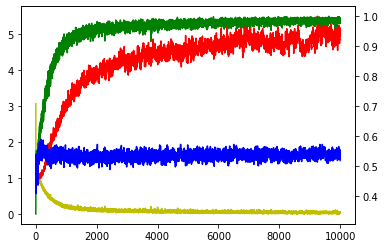

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(500, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dense(6, activation="softmax"))


from tensorflow.keras.losses import categorical_crossentropy
model.compile(loss= categorical_crossentropy,
             optimizer="nadam",metrics=["accuracy"])


train_y.toarray()
train_x.to_numpy()
train_y.toarray()

history = model.fit(train_x.to_numpy(), train_y.toarray(),
                   validation_split=0.5, batch_size= 100, epochs =10000, verbose=1)

import numpy as np
np.argmax(model.predict(redwine_x[:10]), axis = 1)+3

redwine_y[:10]

plt.plot(history.history['loss'], 'y', label = "train_loss")
plt.plot(history.history['val_loss'], 'r', label = "val_loss")
ax = plt.twinx()
ax.plot(history.history["acc"],'g',label="train_acc")
ax.plot(history.history['val_acc'], 'b', label = "val_loss")
plt.show()